# Capstone EDA
## Predicting the Type of Crime in Chicago

Here I will examine how several spatial and temporal variables relate to certain types of crimes in an effort to figure out what variables would be useful in predicting the type of crime.  The following data has been used: 
+ Crime reports from 2001 into 2018 provided by the City of Chicago (https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2)
+ Train ('L') Stops provided by the City of Chicago (https://data.cityofchicago.org/Transportation/CTA-System-Information-List-of-L-Stops/8pix-ypme)
+ Bus Stops provided by the City of Chicago (https://data.cityofchicago.org/Transportation/CTA-Bus-Stops-kml/84eu-buny)
+ Business licenses provided by the City of Chicago (https://data.cityofchicago.org/Community-Economic-Development/Business-Licenses/r5kz-chrr)
+ Police departments provided by the City of Chicago (https://data.cityofchicago.org/Public-Safety/Chicago-Police-Department-Illinois-Uniform-Crime-R/c7ck-438e)
+ U.S. federal holidays provided by Kaggle (https://www.kaggle.com/gsnehaa21/federal-holidays-usa-19662020)

The following scripts were used to clean and extract pertinent data: 
+ https://github.com/AnitaNal/Springboard/blob/Capstone/ChicagoCrime_CleanData.ipynb
+ https://github.com/AnitaNal/Springboard/blob/Capstone/Bus_Train_Stops.ipynb
+ https://github.com/AnitaNal/Springboard/blob/Capstone/Liquor_Stores.ipynb
+ https://github.com/AnitaNal/Springboard/blob/Capstone/CityCenter_Police.ipynb
+ https://github.com/AnitaNal/Springboard/blob/Capstone/Holidays.ipynb


## Reading in Data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
pd.options.display.max_columns = 1000

In [2]:
# Reading in the crime data csv file and converting to a dataframe.   
crime_df = pd.read_csv('Crimes_2001_into_2018_Cleaned.csv')

In [3]:
crime_df.head()

ID                 Date  Year                   Block   Primary Type  \
0  10000092  2015-03-18 19:44:00  2015         047XX W OHIO ST        BATTERY   
1  10000094  2015-03-18 23:00:00  2015  066XX S MARSHFIELD AVE  OTHER OFFENSE   
2  10000095  2015-03-18 22:45:00  2015   044XX S LAKE PARK AVE        BATTERY   
3  10000096  2015-03-18 22:30:00  2015    051XX S MICHIGAN AVE        BATTERY   
4  10000097  2015-03-18 21:00:00  2015        047XX W ADAMS ST        ROBBERY   

  Location Description  Domestic  Beat  District  Ward  Community  \
0               STREET     False  1111      11.0  28.0       25.0   
1               STREET     False   725       7.0  15.0       67.0   
2            APARTMENT      True   222       2.0   4.0       39.0   
3            APARTMENT     False   225       2.0   3.0       40.0   
4             SIDEWALK     False  1113      11.0  28.0       25.0   

   X Coordinate  Y Coordinate   Latitude  Longitude  Month  Season  \
0     1144606.0     1903566.0  41.891399 -87.744385      3  SPRING   
1     1166468.0     1860715.0  41.773372 -87.665319      3  SPRING   
2     1185075.0     1875622.0  41.813861 -87.596643      3  SPRING   
3     1178033.0     1870804.0  41.800802 -87.622619      3  SPRING   
4     1144920.0     1898709.0  41.878065 -87.743354      3  SPRING   

  Quarter of Year Day of the Week Day Type Time of Day  Day  Hour  \
0              Q1       WEDNESDAY  WEEKDAY     EVENING   18    19   
1              Q1       WEDNESDAY  WEEKDAY     EVENING   18    23   
2              Q1       WEDNESDAY  WEEKDAY     EVENING   18    22   
3              Q1       WEDNESDAY  WEEKDAY     EVENING   18    22   
4              Q1       WEDNESDAY  WEEKDAY     EVENING   18    21   

  Third of Month            Street     Holiday  Is Holiday Closest Train Stop  \
0             T2         W OHIO ST  No Holiday       False             Cicero   
1             T2  S MARSHFIELD AVE  No Holiday       False       Ashland/63rd   
2             T2   S LAKE PARK AVE  No Holiday       False               43rd   
3             T2    S MICHIGAN AVE  No Holiday       False               51st   
4             T2        W ADAMS ST  No Holiday       False             Cicero   

  Closest Train Line  Distance from Closest Train Stop (km)  \
0         Green Line                                   0.54   
1         Green Line                                   0.62   
2         Green Line                                   1.88   
3         Green Line                                   0.37   
4          Blue Line                                   0.74   

          Closest Bus Stop  Distance from Closest Bus Stop (km)  \
0            Cicero & Ohio                                 0.10   
1    Ashland & 66th Street                                 0.12   
2  Oakenwald & 43rd Street                                 0.35   
3   51st Street & Michigan                                 0.13   
4     Jackson & Kilpatrick                                 0.13   

                 Closest Liquor Store  \
0              MAZE FOOD & LIQUOR INC   
1       BIG SAM'S FOOD & LIQUOR, INC.   
2  ONE STOP FOOD & LIQUOR STORE, INC.   
3      51ST EXPRESS FOOD & LIQUOR INC   
4           NIJAR FOOD & LIQUOR, INC.   

   Distance from Closest Liquor Store (km)  Distance from Chicago (km)  \
0                                     0.10                       10.09   
1                                     0.53                       12.56   
2                                     0.37                        7.87   
3                                     0.15                        9.01   
4                                     0.70                        9.96   

   Closest Police Station (District)  \
0                               15.0   
1                                7.0   
2                                2.0   
3                                2.0   
4                               15.0   

   Distance from Closest Police Station (km)  
0                     

In [4]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6726512 entries, 0 to 6726511
Data columns (total 37 columns):
ID                                           int64
Date                                         object
Year                                         int64
Block                                        object
Primary Type                                 object
Location Description                         object
Domestic                                     bool
Beat                                         int64
District                                     float64
Ward                                         float64
Community                                    float64
X Coordinate                                 float64
Y Coordinate                                 float64
Latitude                                     float64
Longitude                                    float64
Month                                        int64
Season                                       object
Qu

## Primary Type of Crime 

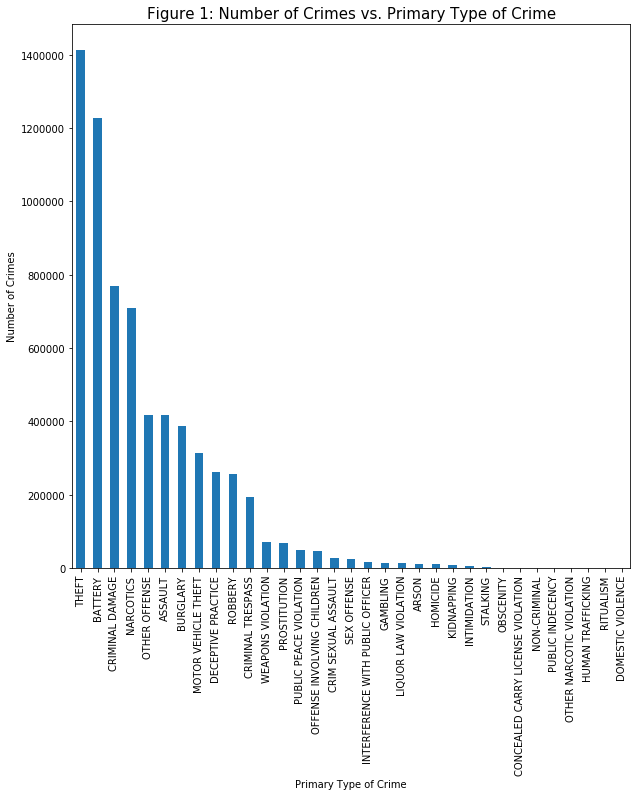

In [5]:
# Getting counts of each primary type of crime
counts = crime_df['Primary Type'].value_counts()

# Creating a dataframe of counts 
df_type = counts.rename_axis('Primary Type').reset_index(name='counts')

# Plotting the number of crimes by primary type
_ = df_type.plot.bar(x = 'Primary Type', legend = None, figsize = (10,10))
_ = plt.xlabel('Primary Type of Crime')
_ = plt.ylabel('Number of Crimes')
_ = plt.title('Figure 1: Number of Crimes vs. Primary Type of Crime', size=15)

With over 1.2 million crimes each, theft and battery are the most frequent crimes.  Looking at Figure 1, it would make sense to focus my study on primary types of crime ranging from theft to criminal trespassing as there are many samples for them. 

In [6]:
# Getting data for the top 11 primary types of crimes
crime_df = crime_df[[each in ['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'OTHER OFFENSE', 'ASSAULT', 'BURGLARY', 'MOTOR VEHICLE THEFT', 'DECEPTIVE PRACTICE', 'ROBBERY', 'CRIMINAL TRESPASS'] for each in crime_df['Primary Type']]]
crime_df = crime_df.reset_index(drop = True)  # Resetting the index for crime_df before moving on

## Ward

In Figure 2a, a few crime types with a lot of variation across the wards include battery, narcotics, and theft.  Figure 2b shows the percentage of these 3 primary types of crime for each ward.   Ward 42 has the highest proportion of crimes related to theft while ward 28 as the smallest proportion.  Ward 17 has the highest proportion of crimes involving battery while ward 42 has the smallest proportion.  Ward 28 has the highest proportion of crimes involving narcotics while wards 32, 42, and 43 have the smallest proportions. 

There appears to be some relationship between ward and the primary type of crime.  So ward, along with other variables, may be useful in predicting the type of crime. 

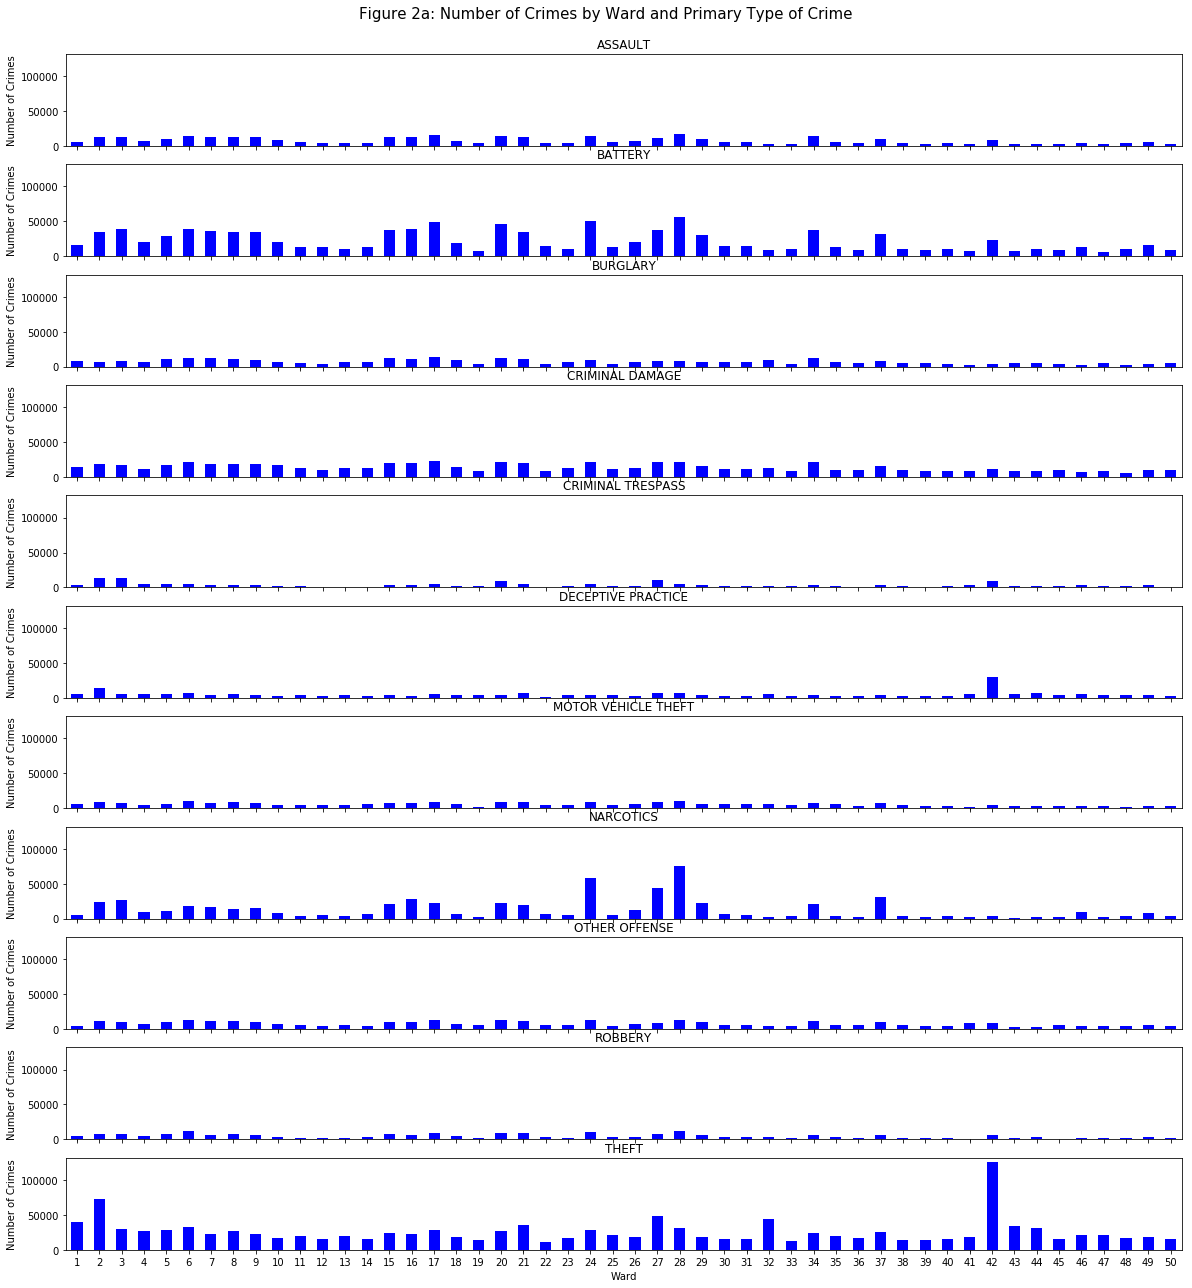

In [99]:
# Getting number of crimes per ward and converting to a dataframe
crime_df_ward = crime_df.pivot_table(index = 'Ward', columns = 'Primary Type', values = 'Date', aggfunc = len)
crime_df_ward.index = crime_df_ward.index.astype('int')

# Making a bar plot of the number of crimes per ward.  
ax = crime_df_ward.plot.bar(figsize = (20,22), subplots = True, legend = False, color = 'blue', sharey=True, rot=0)
plt.suptitle('Figure 2a: Number of Crimes by Ward and Primary Type of Crime', y = 0.91, size = 15)
for x in range(11):
    ax[x].set_ylabel('Number of Crimes')

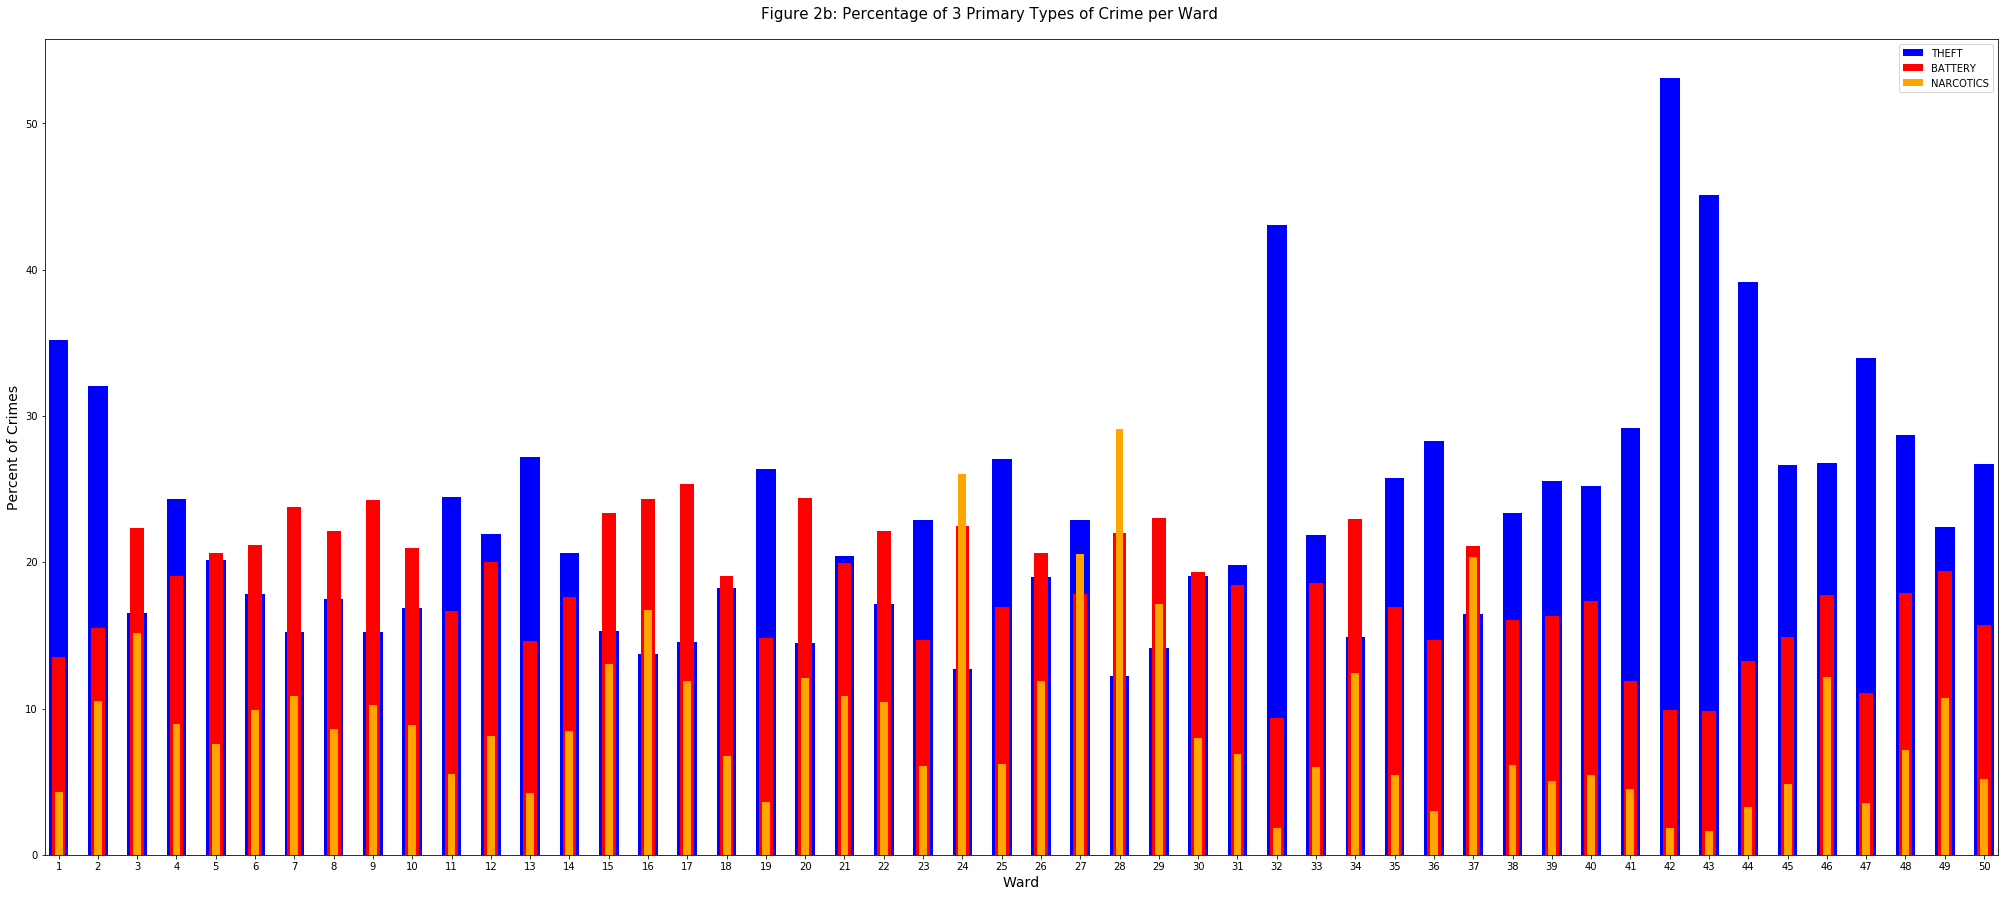

In [100]:
# Calculating the percentage of crimes within each ward
crime_df_ward['Totals'] = crime_df_ward.sum(axis=1)
crime_df_ward_prop = pd.DataFrame()
for r in crime_df_ward.index: 
    for c in crime_df_ward.columns:
        if c != 'Totals':
            crime_df_ward_prop.loc[r, c] = crime_df_ward.loc[r, c] * 100 / crime_df_ward.loc[r, 'Totals']

# Making a bar plot of the proportion of crimes per ward
ax1 = crime_df_ward_prop['THEFT'].plot.bar(figsize = (35,15), subplots = False, legend = True, color = 'blue', width=0.5, rot=0)
ax1 = crime_df_ward_prop['BATTERY'].plot.bar(figsize = (35,15), subplots = False, legend = True, color = 'red', width=0.35, rot=0)
ax1 = crime_df_ward_prop['NARCOTICS'].plot.bar(figsize = (35,15), subplots = False, legend = True, color = 'orange', width=0.2, rot=0)
_ = plt.suptitle('Figure 2b: Percentage of 3 Primary Types of Crime per Ward', y = 0.91, size = 15)
_ = plt.ylabel('Percent of Crimes', size=14)
_ = plt.xlabel('Ward', size=14)

del crime_df_ward['Totals']

## Police District

In Figure 3a, a few crime types with a lot of variation across the police districts include battery, narcotics, and theft. Figure 3b shows the percentage of these 3 primary types of crime for each police district.  District 1 has the highest proportion of crimes involving theft while district 15 has the smallest proportion.  District 7 has the highest proportion of crimes involving battery while district 1 has the smallest proportion.  District 11 has the highest proportion of crimes involving narcotics while districts 1 and 18 have the smallest proportions.  

There appears to be some relationship between police district and the primary type of crime. So police district along with other variables, may be useful in predicting the type

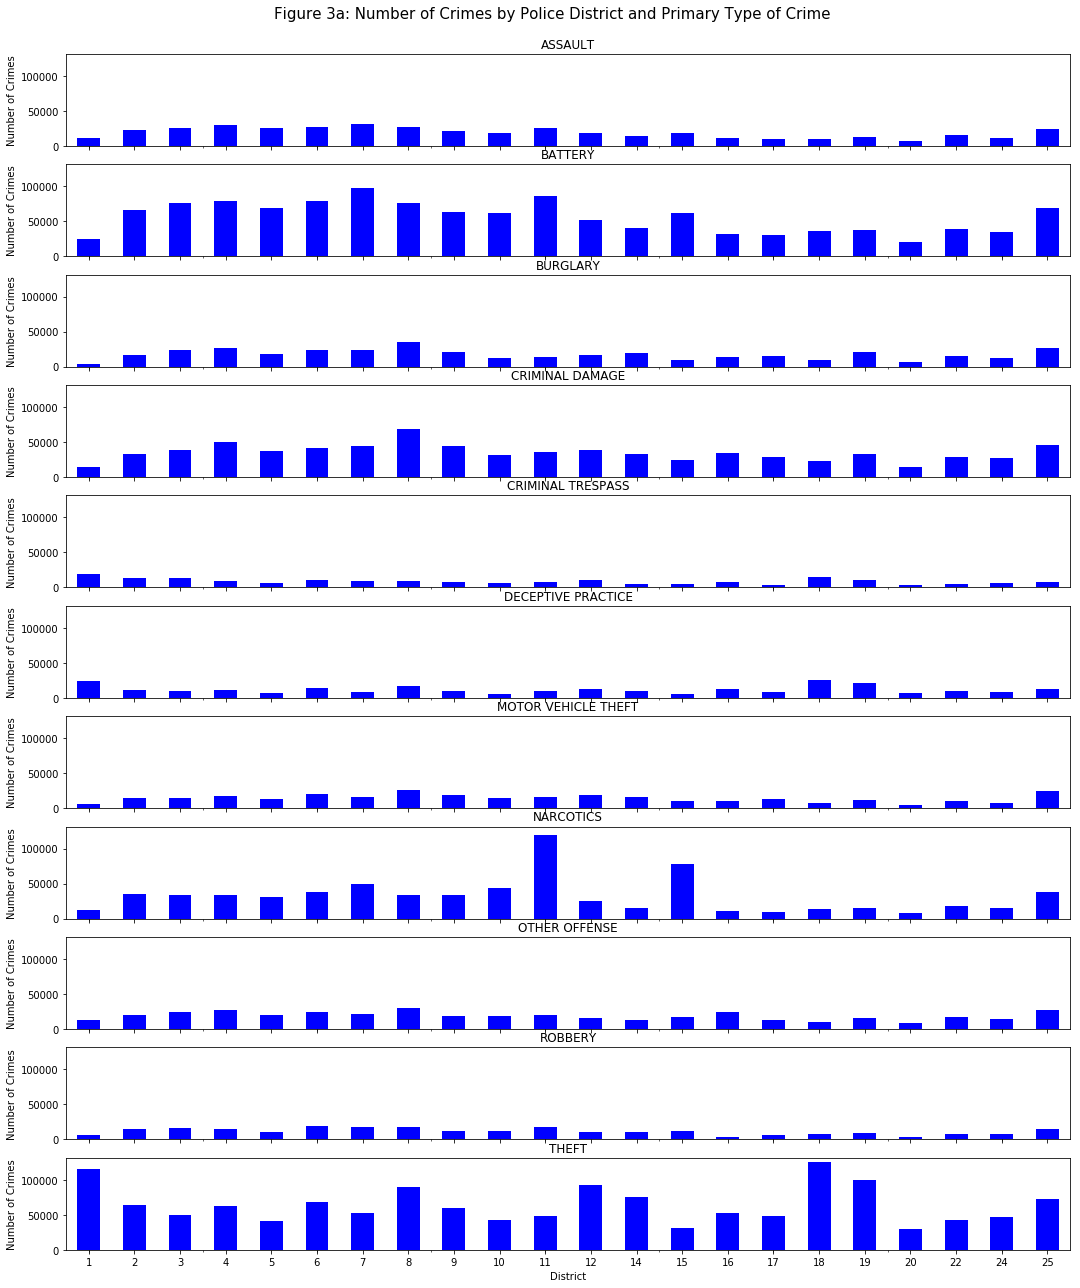

In [101]:
# Getting number of crimes per police beat and converting to a dataframe
crime_df_district = crime_df.pivot_table(index = 'District', columns = 'Primary Type', values = 'Date', aggfunc = len)
crime_df_district.index = crime_df_district.index.astype('int')

# Making a bar plot of the number of crimes per police district
ax = crime_df_district.plot.bar(figsize = (18,22), subplots = True, legend = False, color = 'blue', stacked=False, sharey=True, rot=0)
_ = plt.suptitle('Figure 3a: Number of Crimes by Police District and Primary Type of Crime', y = 0.91, size = 15)
_ = plt.ylabel('Number of Crimes')
for x in range(11):
    ax[x].set_ylabel('Number of Crimes')

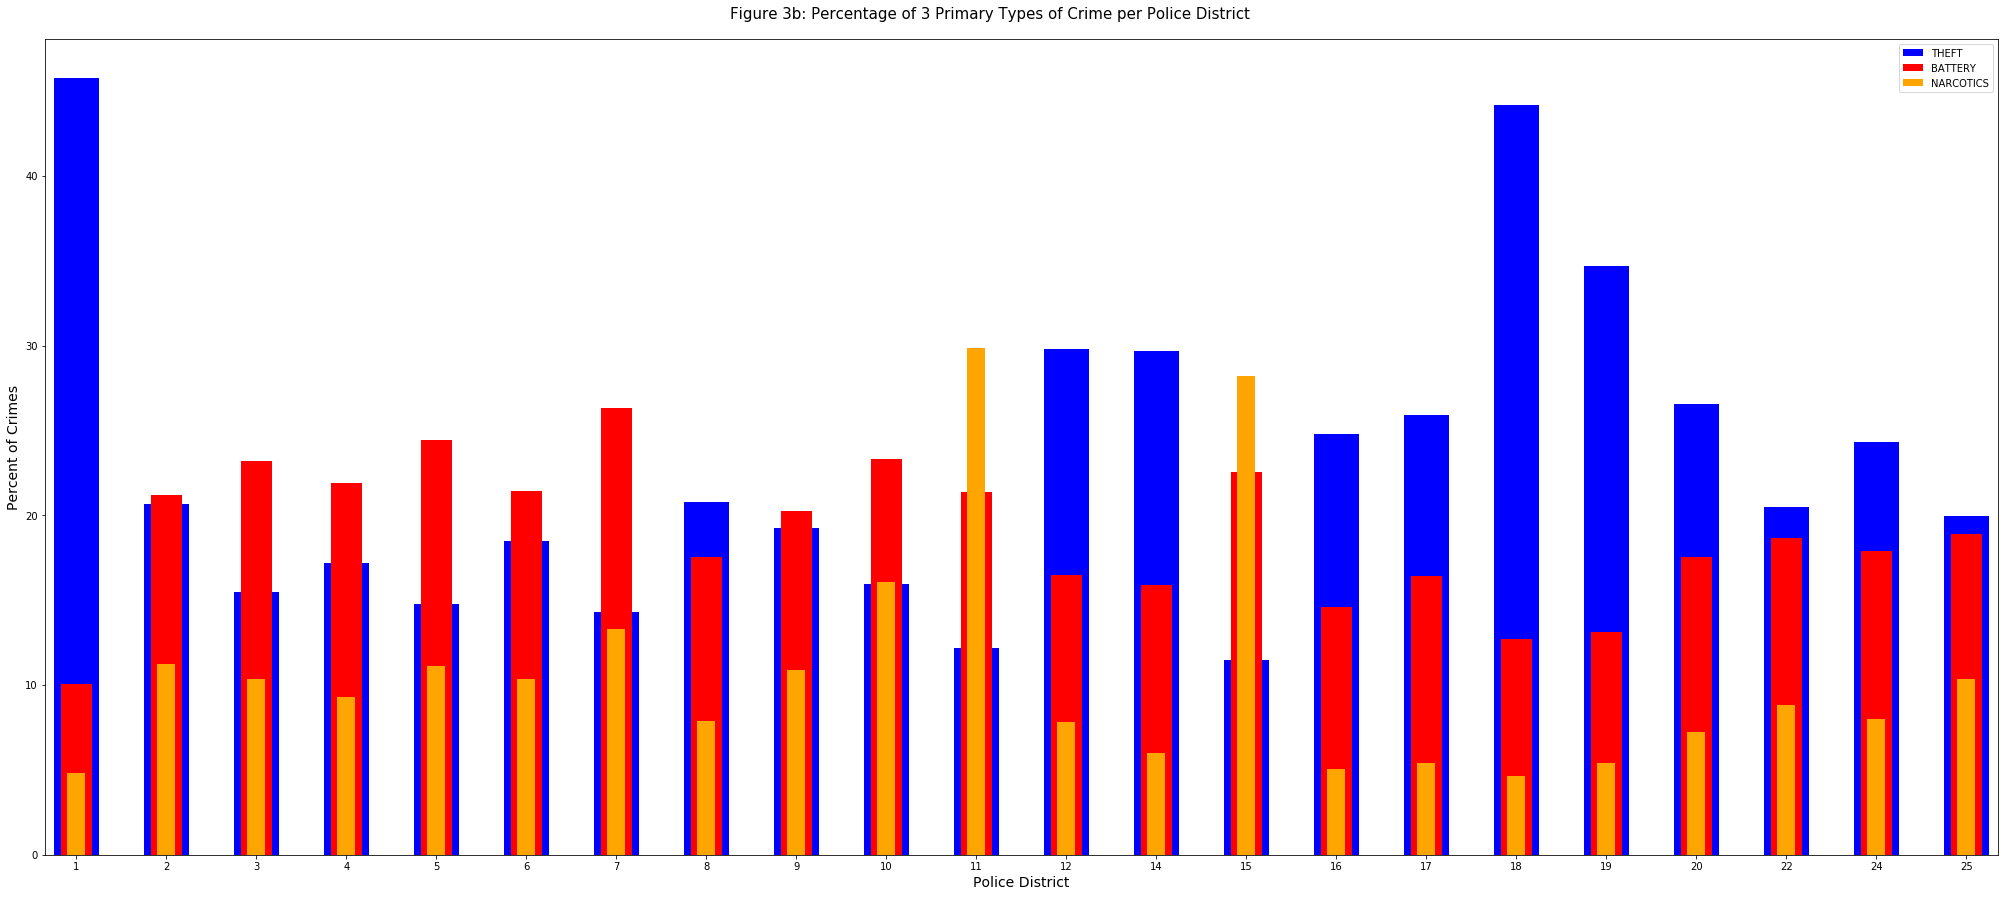

In [102]:
# Calculating the percentage of crimes within each district
crime_df_district['Totals'] = crime_df_district.sum(axis=1)
crime_df_district_prop = pd.DataFrame()
for r in crime_df_district.index: 
    for c in crime_df_district.columns:
        if c != 'Totals':
            crime_df_district_prop.loc[r, c] = crime_df_district.loc[r, c] * 100 / crime_df_district.loc[r, 'Totals']

# Making a bar plot of the number of crimes per police district
#ax1 = crime_df_district_prop['BATTERY'].plot.bar(figsize = (35,15), subplots = False, legend = True, colormap = 'tab20', stacked=True)
ax1 = crime_df_district_prop['THEFT'].plot.bar(figsize = (35,15), subplots = False, legend = True, color = 'blue', width=0.5, rot=0)
ax1 = crime_df_district_prop['BATTERY'].plot.bar(figsize = (35,15), subplots = False, legend = True, color = 'red', width=0.35, rot=0)
ax1 = crime_df_district_prop['NARCOTICS'].plot.bar(figsize = (35,15), subplots = False, legend = True, color = 'orange', width=0.2, rot=0)
_ = plt.suptitle('Figure 3b: Percentage of 3 Primary Types of Crime per Police District', y = 0.91, size = 15)
_ = plt.ylabel('Percent of Crimes', size=14)
_ = plt.xlabel('Police District', size=14)

del crime_df_district['Totals']

## Beat

In Figure 4a, a few crime types with a lot of variation across the police beats include battery, criminal damage, and theft.  Figure 4b shows the percentage of these 3 primary types of crime for a sample of beats.  Beats 122 and 112 have the highest proportion of crimes involving theft while beat 310 has the highest proportion of crimes involving battery.  Beats 432 and 433 have the highest proportions of crimes involving criminal damage.  

There appears to be some relationship between police beat and the primary type of crime.  So beat, along with other variables, may be useful in predicting the type of crime. 

Number of Police Beats:  304


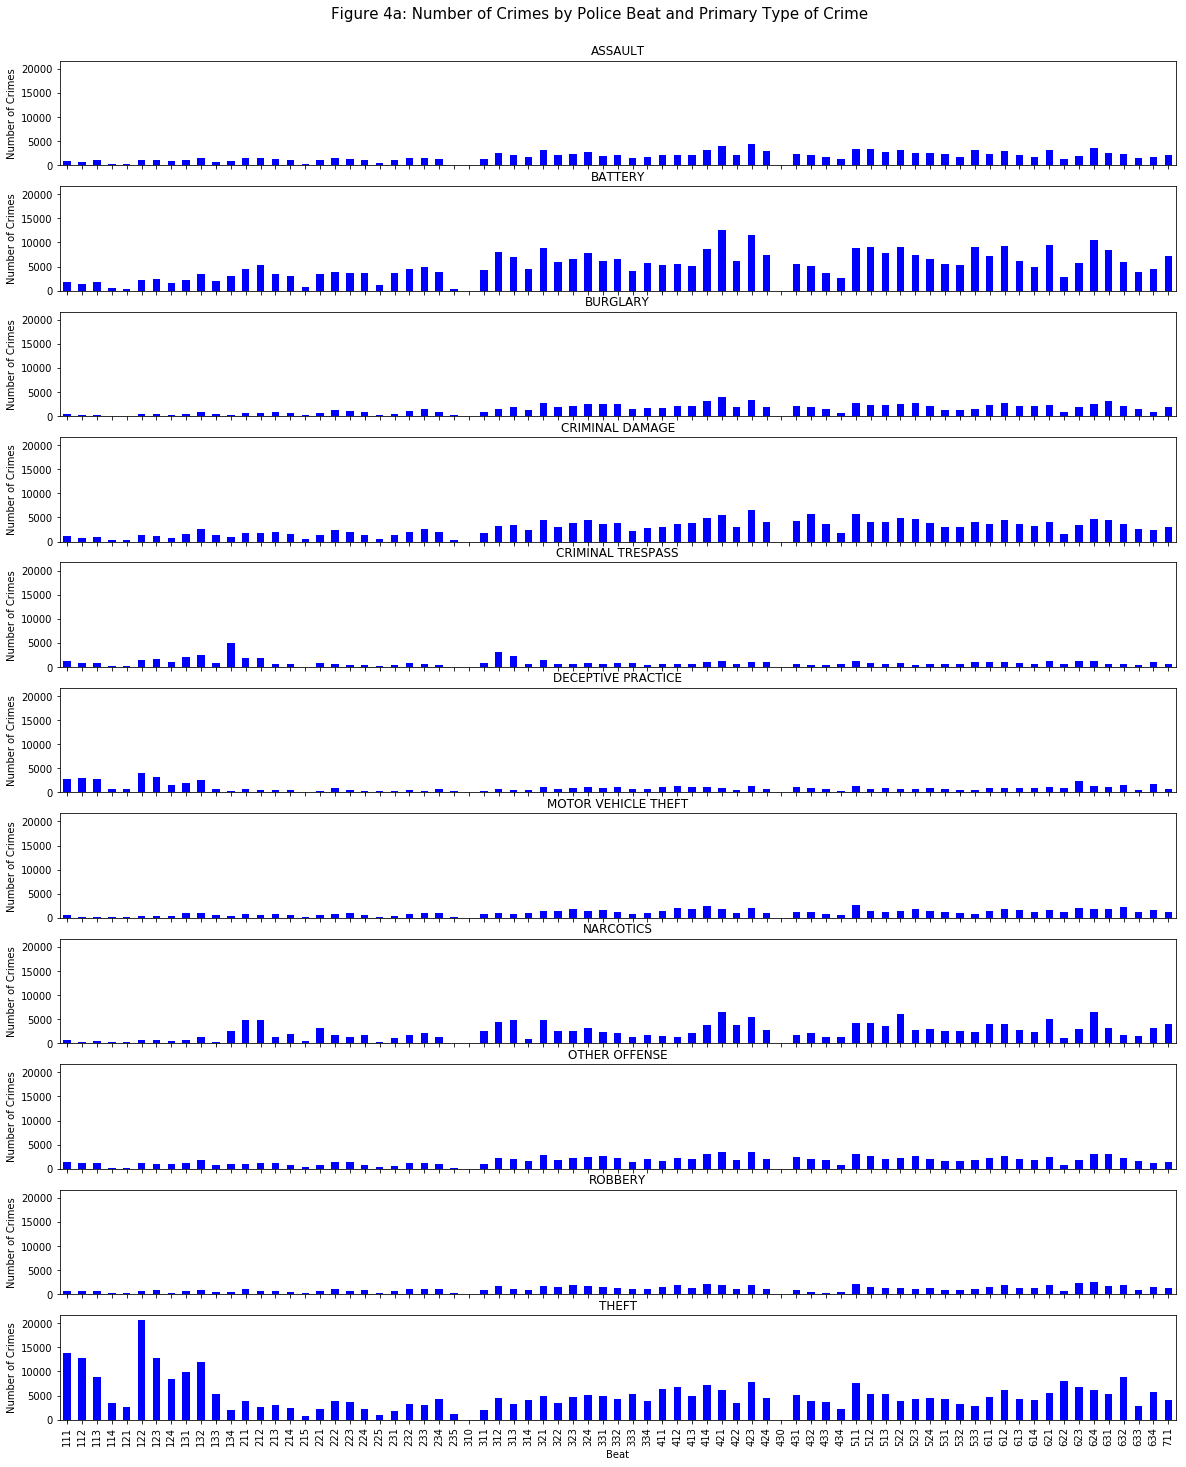

In [103]:
# Getting number of crimes per police beat and converting to a dataframe
crime_df_beat = crime_df.pivot_table(index = 'Beat', columns = 'Primary Type', values = 'Date', aggfunc = len)

num_beats = len(set(crime_df['Beat']))
print('Number of Police Beats: ', num_beats)

# Making a bar plot of the number of crimes per police beat.  Only plotting the first 75 beats. 
ax = crime_df_beat[:75].plot.bar(figsize = (20,25), subplots = True, legend = False, color = 'blue', sharey=True)
plt.suptitle('Figure 4a: Number of Crimes by Police Beat and Primary Type of Crime', y = 0.91, size = 15)
for x in range(11):
    ax[x].set_ylabel('Number of Crimes')

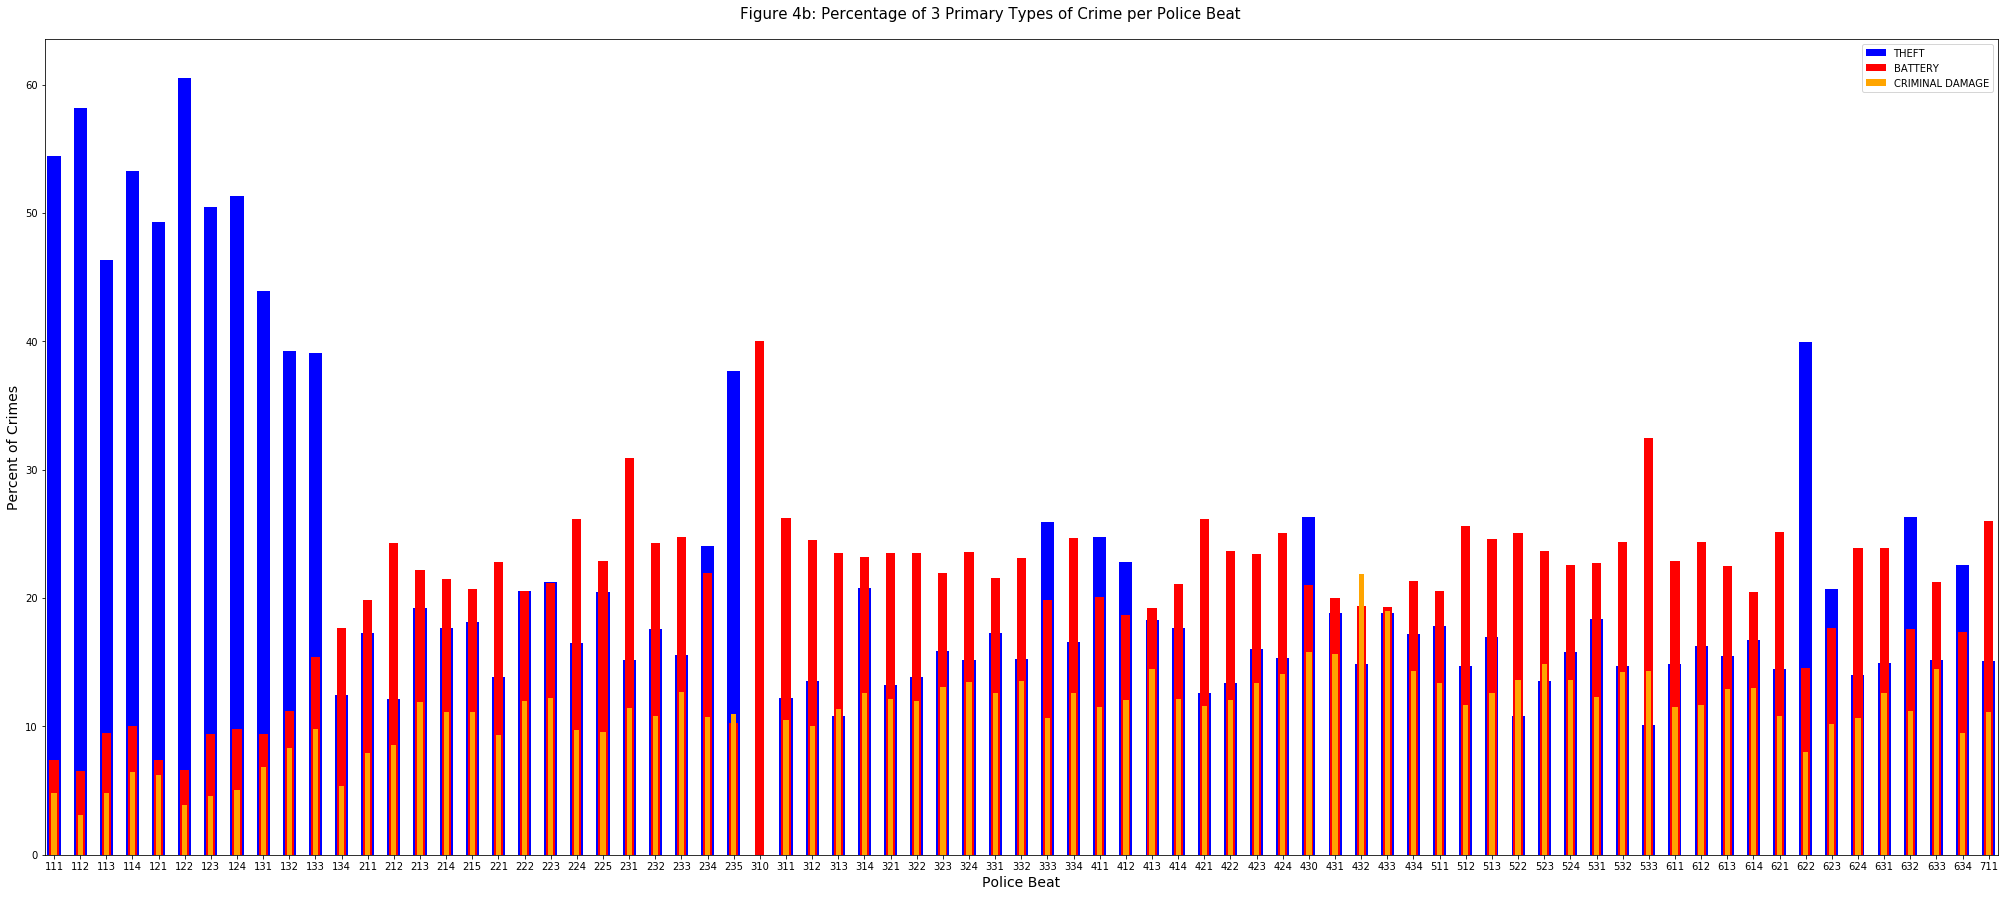

In [104]:
# Calculating the percentage of crimes within each beat
crime_df_beat['Totals'] = crime_df_beat.sum(axis=1)
crime_df_beat_prop = pd.DataFrame()
for r in crime_df_beat.index: 
    for c in crime_df_beat.columns:
        if c != 'Totals':
            crime_df_beat_prop.loc[r, c] = crime_df_beat.loc[r, c] * 100 / crime_df_beat.loc[r, 'Totals']

# Making a bar plot of the proportion of crimes per beat
ax1 = crime_df_beat_prop[:75]['THEFT'].plot.bar(figsize = (35,15), subplots = False, legend = True, color = 'blue', width=0.5, rot=0)
ax1 = crime_df_beat_prop[:75]['BATTERY'].plot.bar(figsize = (35,15), subplots = False, legend = True, color = 'red', width=0.35, rot=0)
ax1 = crime_df_beat_prop[:75]['CRIMINAL DAMAGE'].plot.bar(figsize = (35,15), subplots = False, legend = True, color = 'orange', width=0.2, rot=0)
_ = plt.suptitle('Figure 4b: Percentage of 3 Primary Types of Crime per Police Beat', y = 0.91, size = 15)
_ = plt.ylabel('Percent of Crimes', size=14)
_ = plt.xlabel('Police Beat', size=14)

del crime_df_beat['Totals']

## Community

Figure 5a shows that the distribution of the occurence of crimes across each community is not the same for each primary type of crime. A few crime types with a lot of variation across communites include battery, narcotics, and theft.  Figure 5b shows the percentage of these 3 primary types of crime for each community.  Community 32 has the highest proportion of crimes involving theft while community 54 has the smallest proportion.  Community 54 has the highest proportion of crimes involving battery while community 32 has the smallest proportion.  Community 26 has the highest proportion of crimes involving narcotics while community 9 has the smallest proportion. 

There appears to be some relationship between community and the primary type of crime. So community along with other variables, may be useful in predicting the type of crime.

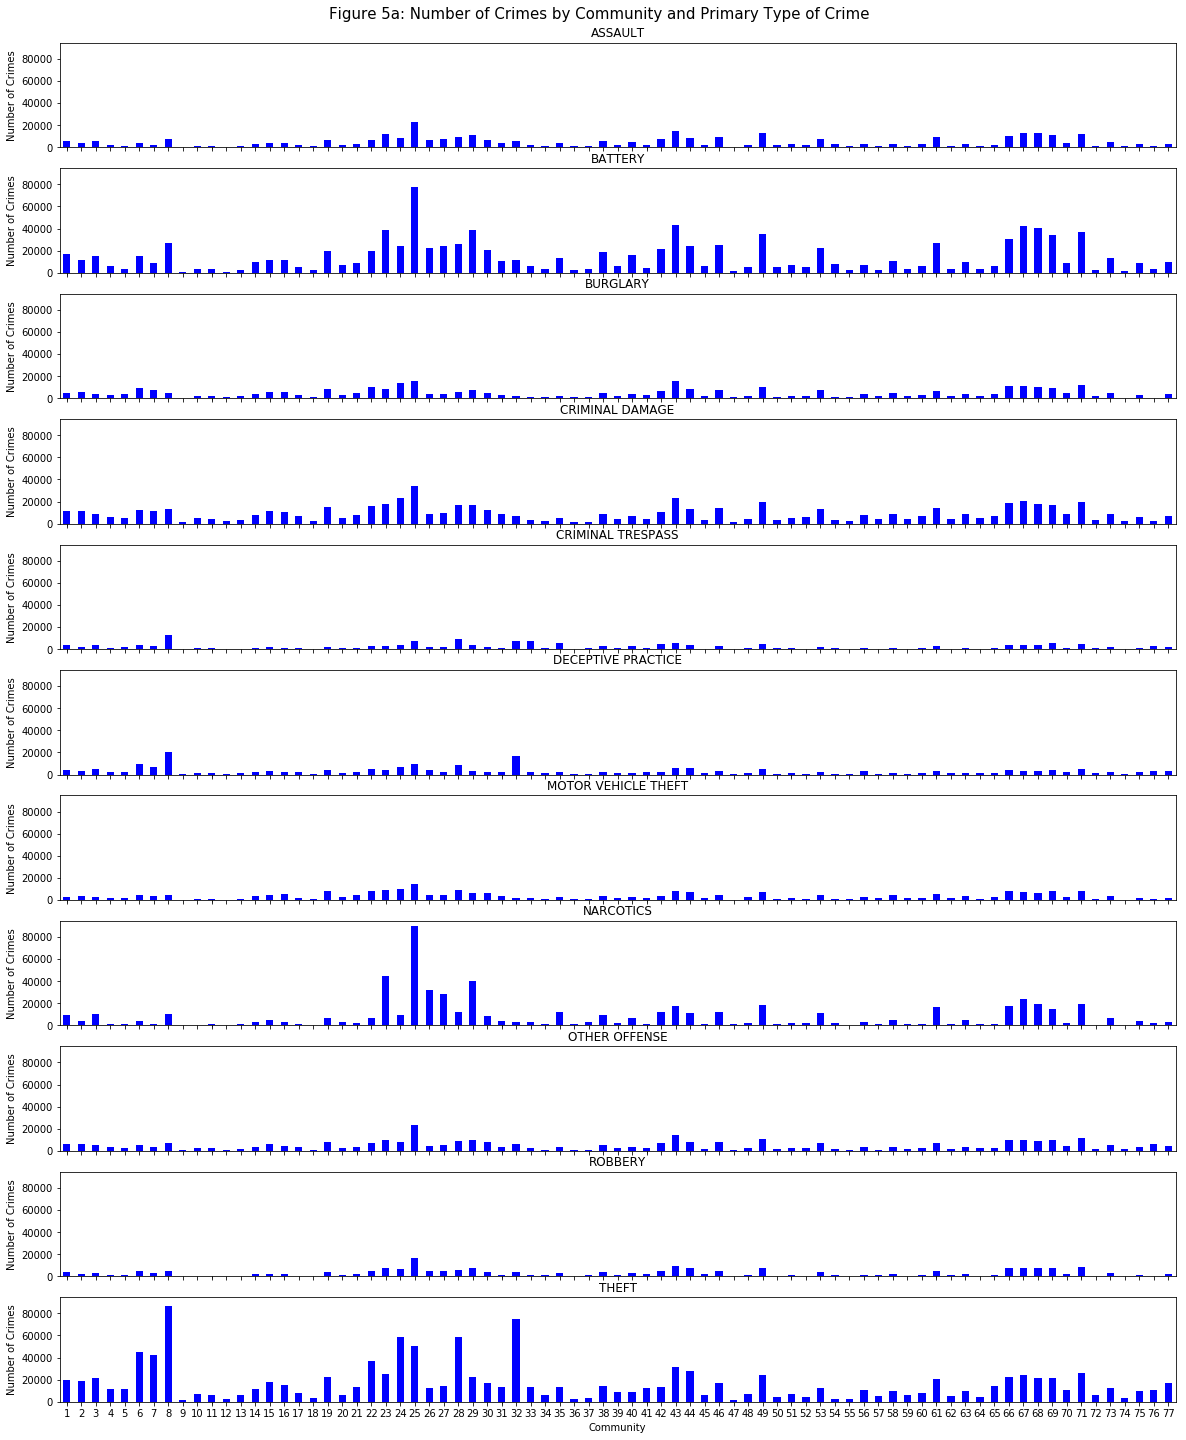

In [105]:
# Getting the number of each type of crime per community
crime_df_community = crime_df.pivot_table(index = 'Community', columns = 'Primary Type', values = 'Date', aggfunc = len)

# Plotting crimes by community and primary type 
axes = crime_df_community.plot.bar(by = 'Primary Type', figsize = (20,25), subplots = True, stacked=False, legend = False, color='blue', sharey=True, rot=0)
plt.suptitle('Figure 5a: Number of Crimes by Community and Primary Type of Crime', y = 0.9, size = 15)
plt.xticks(np.arange(0,77), crime_df_community.index.astype('int'))
plt.xlabel('Community')
for each in axes:
    each.set_ylabel('Number of Crimes')

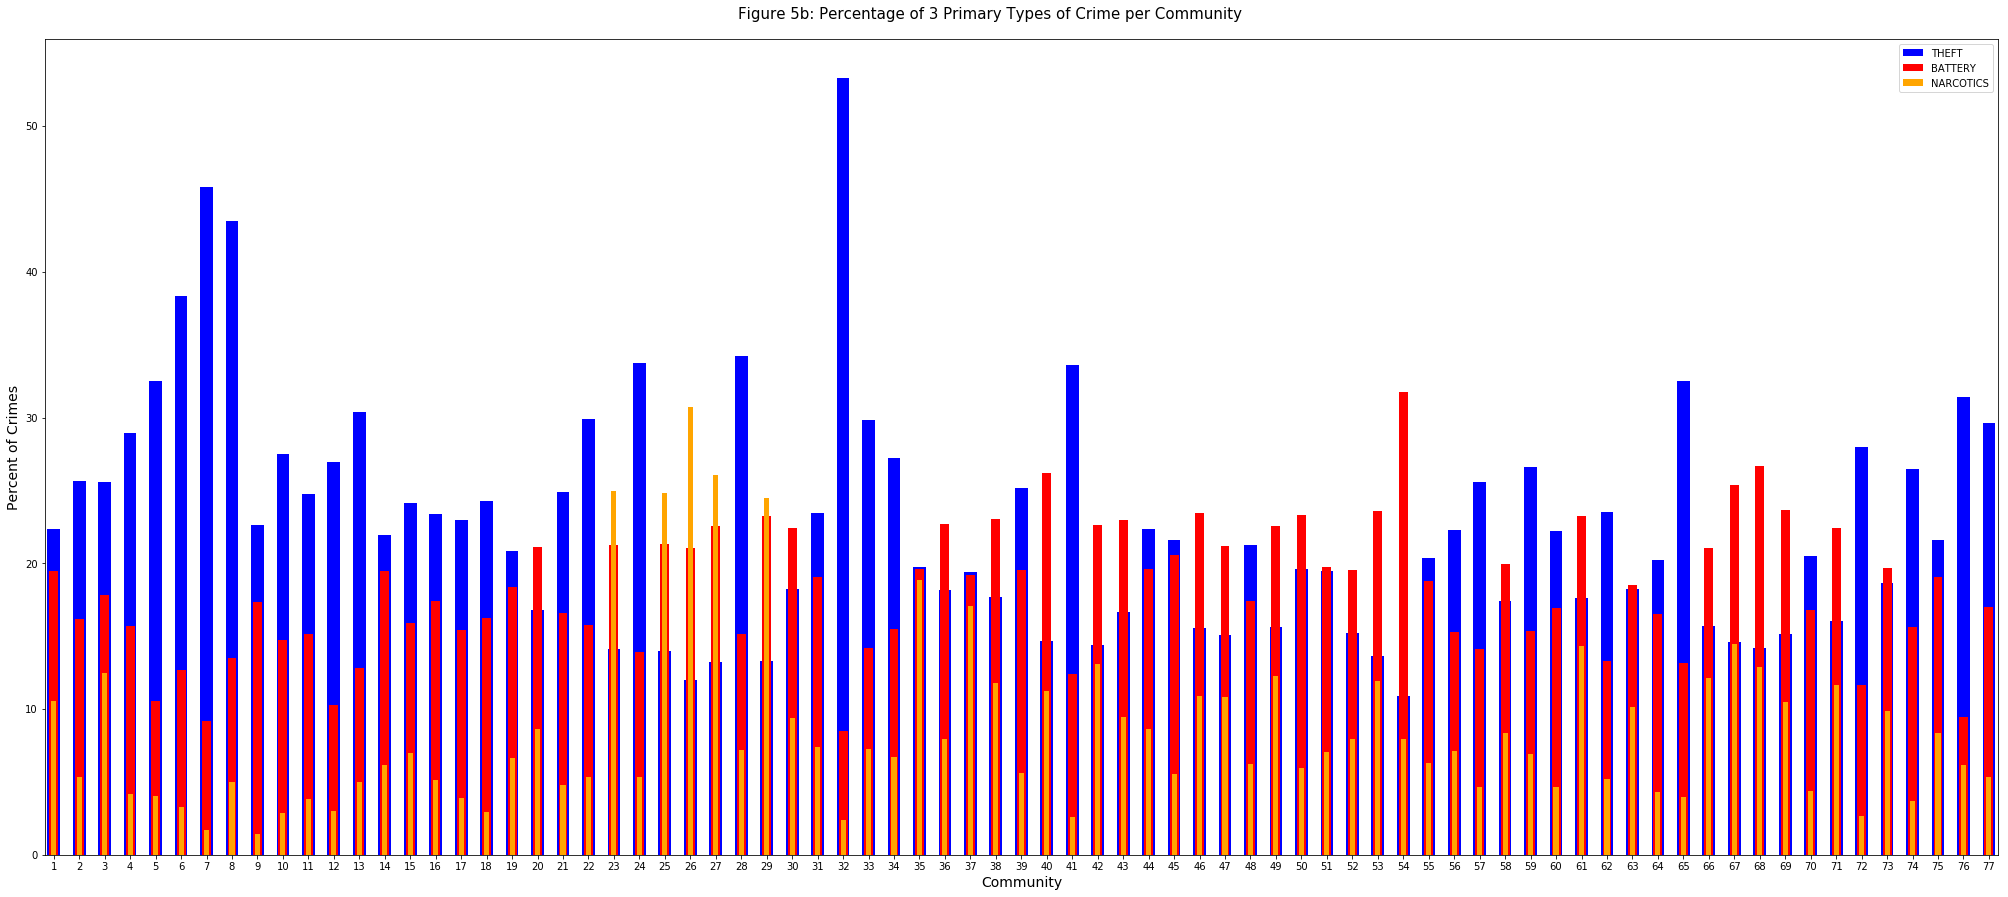

In [106]:
# Calculating the percentage of crimes within each community
crime_df_community['Totals'] = crime_df_community.sum(axis=1)
crime_df_community_prop = pd.DataFrame()
for r in crime_df_community.index: 
    for c in crime_df_community.columns:
        if c != 'Totals':
            crime_df_community_prop.loc[r, c] = crime_df_community.loc[r, c] * 100 / crime_df_community.loc[r, 'Totals']

# Making a bar plot of the number of crimes per community
ax1 = crime_df_community_prop['THEFT'].plot.bar(figsize = (35,15), subplots = False, legend = True, color = 'blue', width=0.5, rot=0)
ax1 = crime_df_community_prop['BATTERY'].plot.bar(figsize = (35,15), subplots = False, legend = True, color = 'red', width=0.35, rot=0)
ax1 = crime_df_community_prop['NARCOTICS'].plot.bar(figsize = (35,15), subplots = False, legend = True, color = 'orange', width=0.2, rot=0)

_ = plt.suptitle('Figure 5b: Percentage of 3 Primary Types of Crime per Community', y = 0.91, size = 15)
_ = plt.ylabel('Percent of Crimes', size=14)
_ = plt.xticks(np.arange(0,77), crime_df_community.index.astype('int'))
_ = plt.xlabel('Community', size=14)

del crime_df_community['Totals']

## Location Description

According to Figure 6a, the 4 locations with the most crime are street, residence, apartment, and sidewalk. These locations are seen to be most prominent in Figure 6b.  In order to get a better look at how the proportion of crimes differ with location, the top 4 locations are plotted in Figure 6c.  Apartments have a high proportion of battery and very low proportions of motor vehicle theft and robbery.  Residences have a high proportion of battery and very low proportions of motor vehicle theft and robbery.  Sidewalks have a high proportion of narcotics and very low proportions of burglary, criminal trespassing, and motor vehicle theft.  Streets have a high proportion of theft and very low proportions of burglary and criminal trespassing.  

There appears to be a relationship between the location and the primary type of crime.  So location, along with other variables, may be useful in predicting the type of crime.  It may be necessary to see if it would be advantageous to remove some of the less frequent location descriptions.  

Number of Unique Location Descriptions:  109


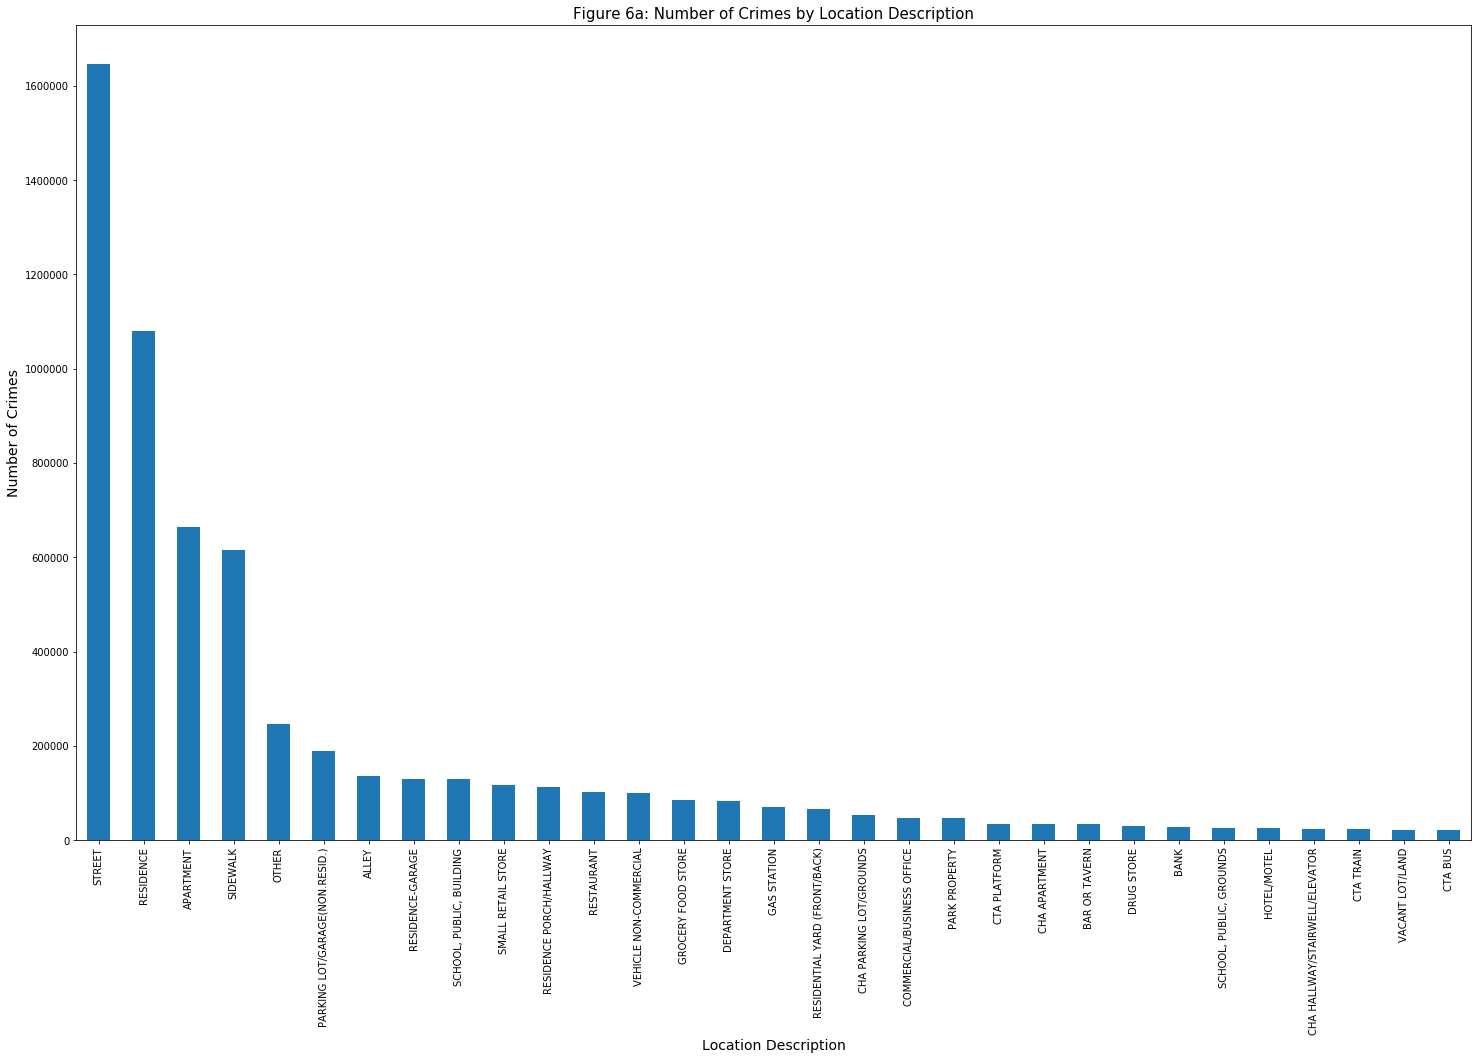

In [74]:
# getting number of crimes per location and converting to a dataframe
counts = crime_df['Location Description'].value_counts()  
df_location = counts.rename_axis('Location Description').reset_index(name = 'counts') 

num_locations = len(set(crime_df['Location Description']))
print('Number of Unique Location Descriptions: ', num_locations)

# Making a bar plot of number of crimes per location.  Since there are a lot of locations, I am excluding locations that have counts less than 20000. 
_ = df_location[df_location['counts'] > 20000].plot.bar(x = 'Location Description', legend = None, figsize = (25,15))
_ = plt.xlabel('Location Description', size=14)
_ = plt.ylabel('Number of Crimes', size=14)
_ = plt.title('Figure 6a: Number of Crimes by Location Description', size=15)

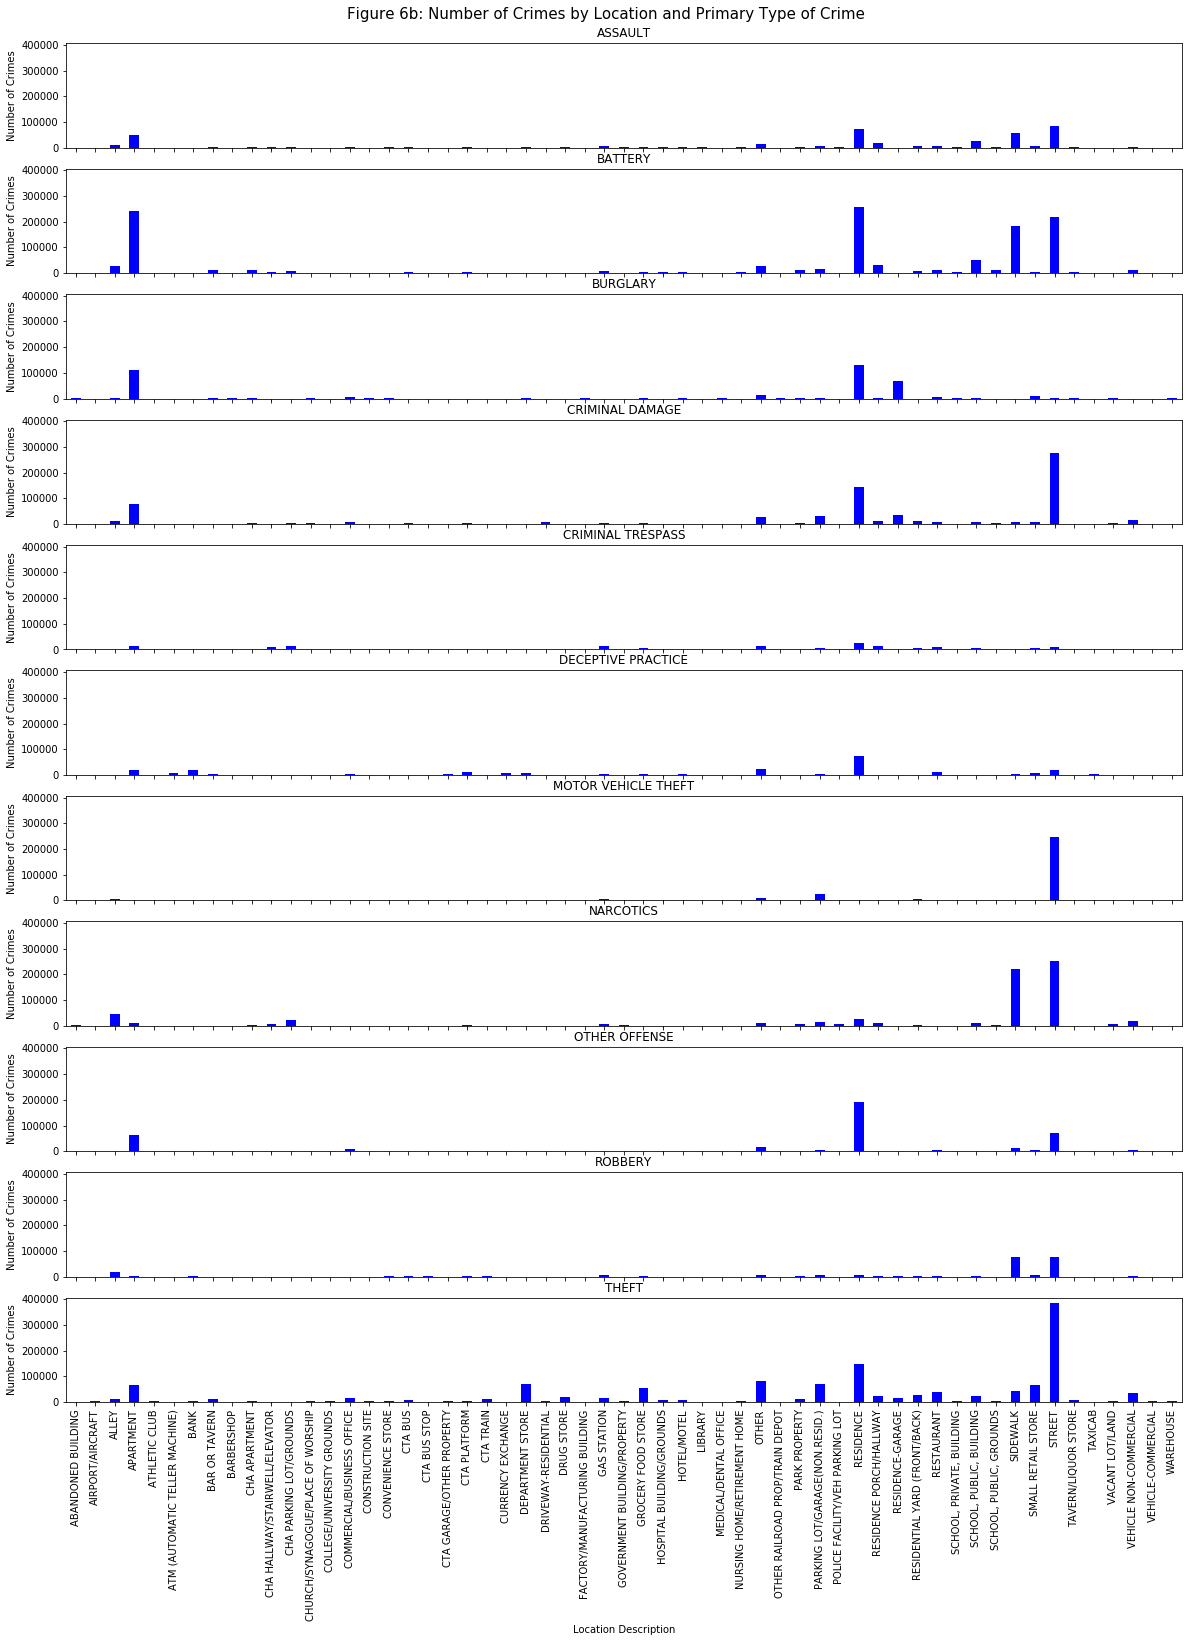

In [75]:
# Getting the number of each type of crime per location
crime_df_location = crime_df.pivot_table(index = 'Location Description', columns = 'Primary Type', values = 'Date', aggfunc = len)

# Making a bar plot of number of crimes per location.  Since there are a lot of locations, I am excluding locations that have counts less than 5000. 
ax = crime_df_location[crime_df_location.sum(axis = 1) >= 5000].plot.bar(figsize = (20,25), subplots = True, legend = False, color = 'blue', sharey=True)
plt.suptitle('Figure 6b: Number of Crimes by Location and Primary Type of Crime', y = 0.9, size = 15)
for x in range(11):
    ax[x].set_ylabel('Number of Crimes')

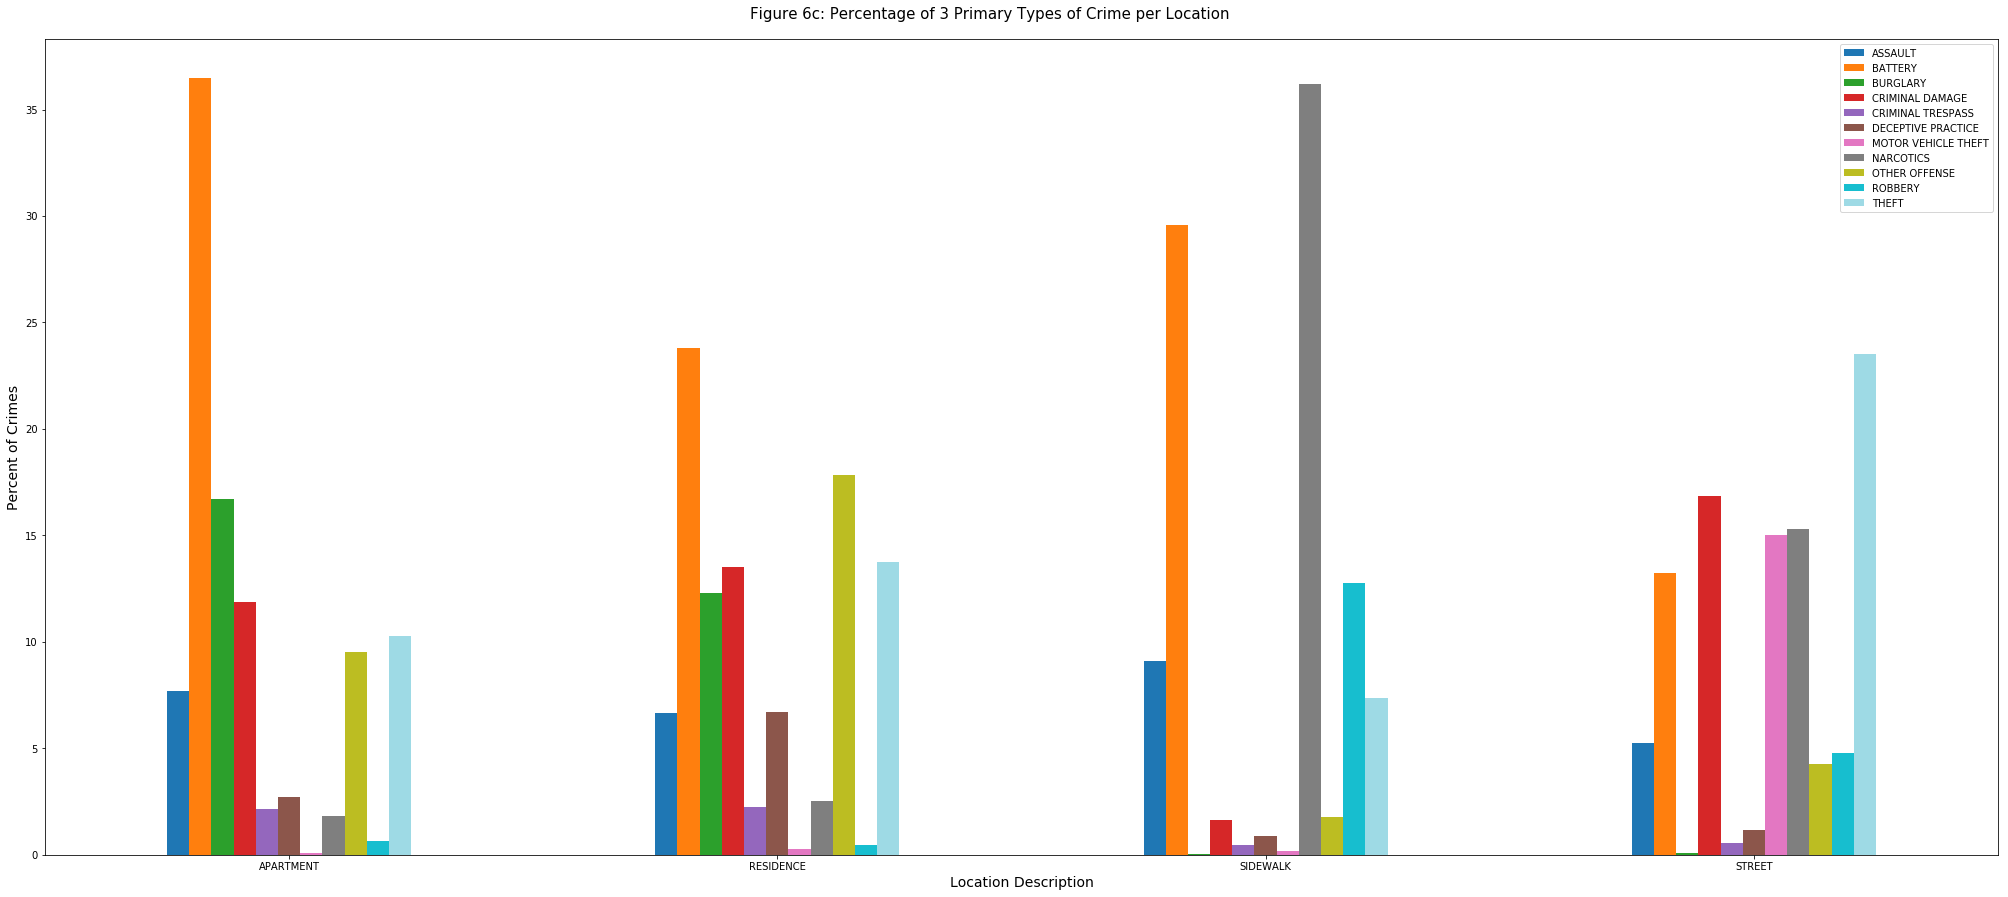

In [81]:
# Calculating the percentage of crimes for each location
crime_df_location['Totals'] = crime_df_location.sum(axis=1)
crime_df_location_prop = pd.DataFrame()
for r in crime_df_location.index: 
    for c in crime_df_location.columns:
        if c != 'Totals':
            crime_df_location_prop.loc[r, c] = crime_df_location.loc[r, c] * 100 / crime_df_location.loc[r, 'Totals']

# Making a bar plot of the proportion of crimes per location
ax1 = crime_df_location_prop[(crime_df_location_prop.index == 'STREET') | (crime_df_location_prop.index == 'RESIDENCE') | (crime_df_location_prop.index == 'APARTMENT') | (crime_df_location_prop.index == 'SIDEWALK')].plot.bar(
    figsize = (35,15), subplots = False, legend = True, colormap = 'tab20', rot=0)

_ = plt.suptitle('Figure 6c: Percentage of 3 Primary Types of Crime per Location', y = 0.91, size = 15)
_ = plt.ylabel('Percent of Crimes', size=14)
_ = plt.xlabel('Location Description', size=14)

del crime_df_location['Totals']

## Street

Per Figure 7, it is possible that there is some relationship between the street and primary type of crime (mainly theft).  However, it would not be feasible to use the street as a predictor as there are 3,814 unique streets. 

Number of Unique Streets:  3814


Text(0.5,0,'Street')

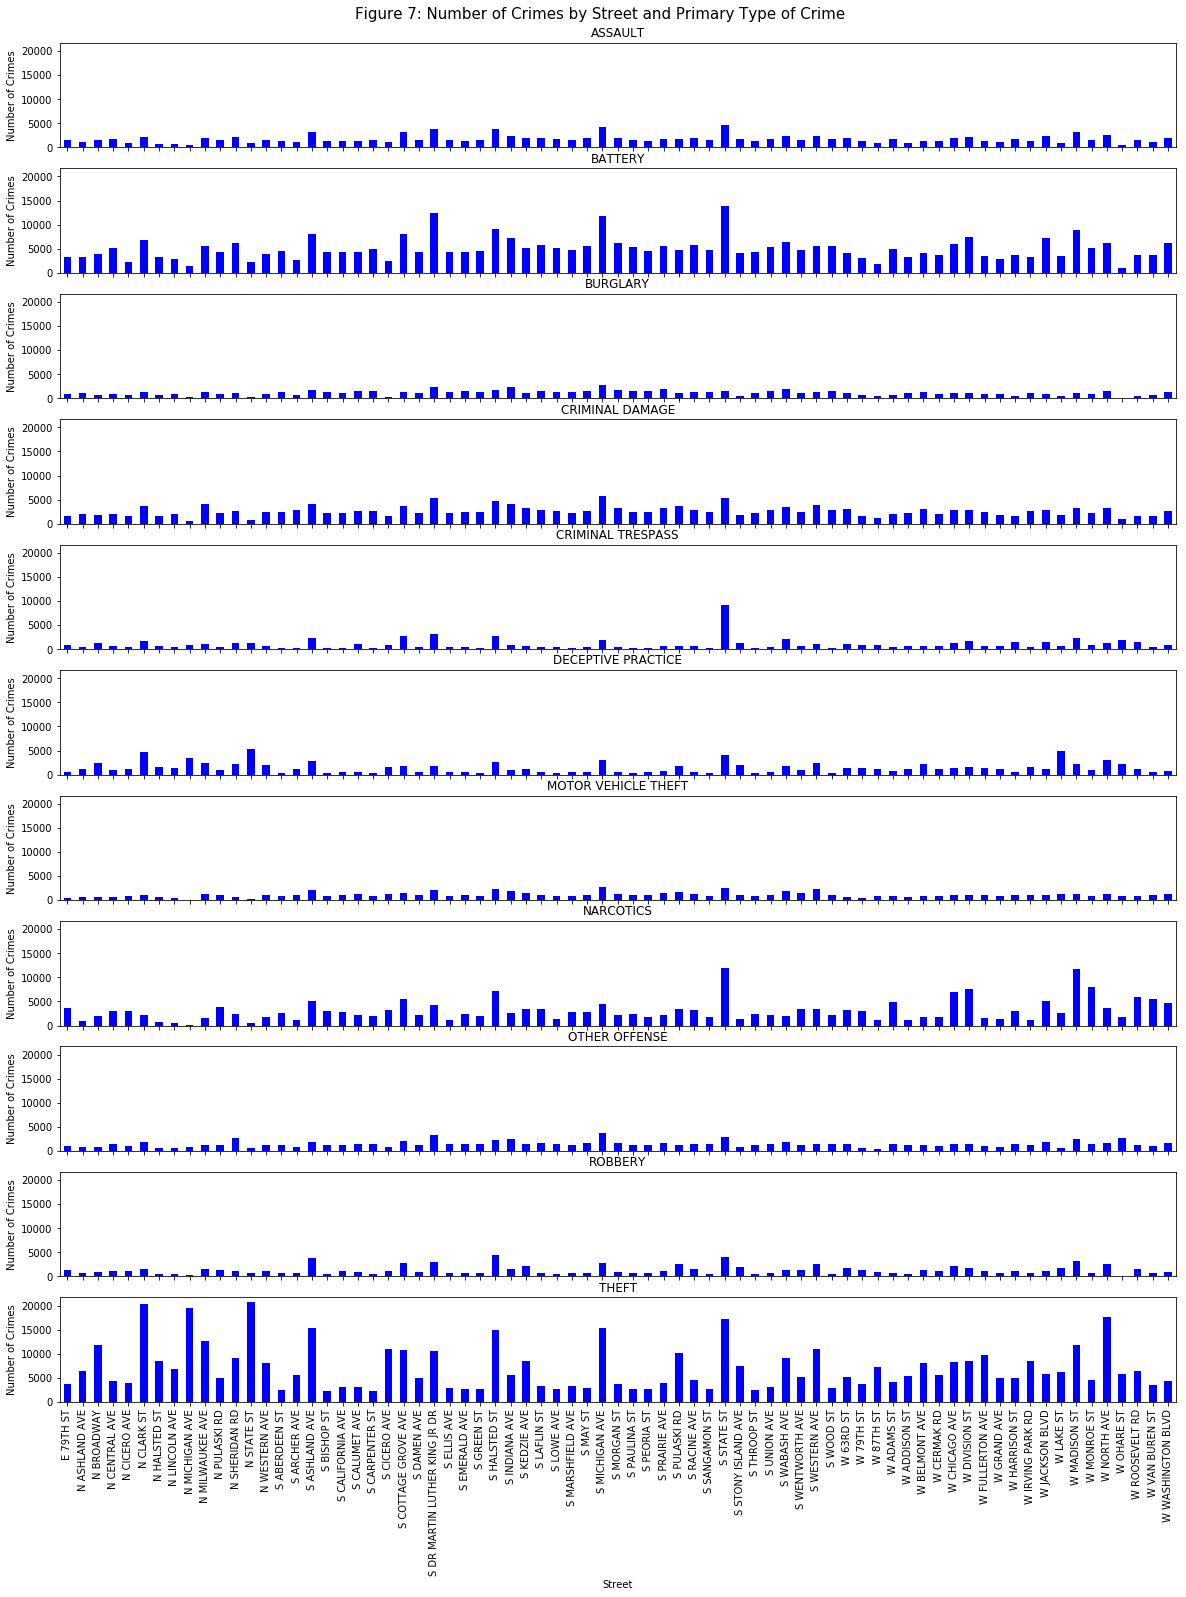

In [84]:
# Getting number of crimes per street and converting to a dataframe
crime_df_street = crime_df.pivot_table(index = 'Street', columns = 'Primary Type', values = 'Date', aggfunc = len)

num_streets = len(set(crime_df['Street']))
print('Number of Unique Streets: ', num_streets)

#Plotting a sample of streets where the count is at least 2500
ax = crime_df_street[crime_df_street.sum(axis = 1) >= 17000].plot.bar(figsize = (20,25), subplots = True, legend = False, color = 'blue', sharey=True)
plt.suptitle('Figure 7: Number of Crimes by Street and Primary Type of Crime', y = 0.9, size = 15)
for x in range(11):
    ax[x].set_ylabel('Number of Crimes')
plt.xlabel('Street')


## Block

Per Figure 8, it is possible that there is some relationship between the block and primary type of crime (especially theft). However, it would not be feasible to use the block as a predictor as there are 57,758 unique blocks.

Number of Unique Blocks:  57758


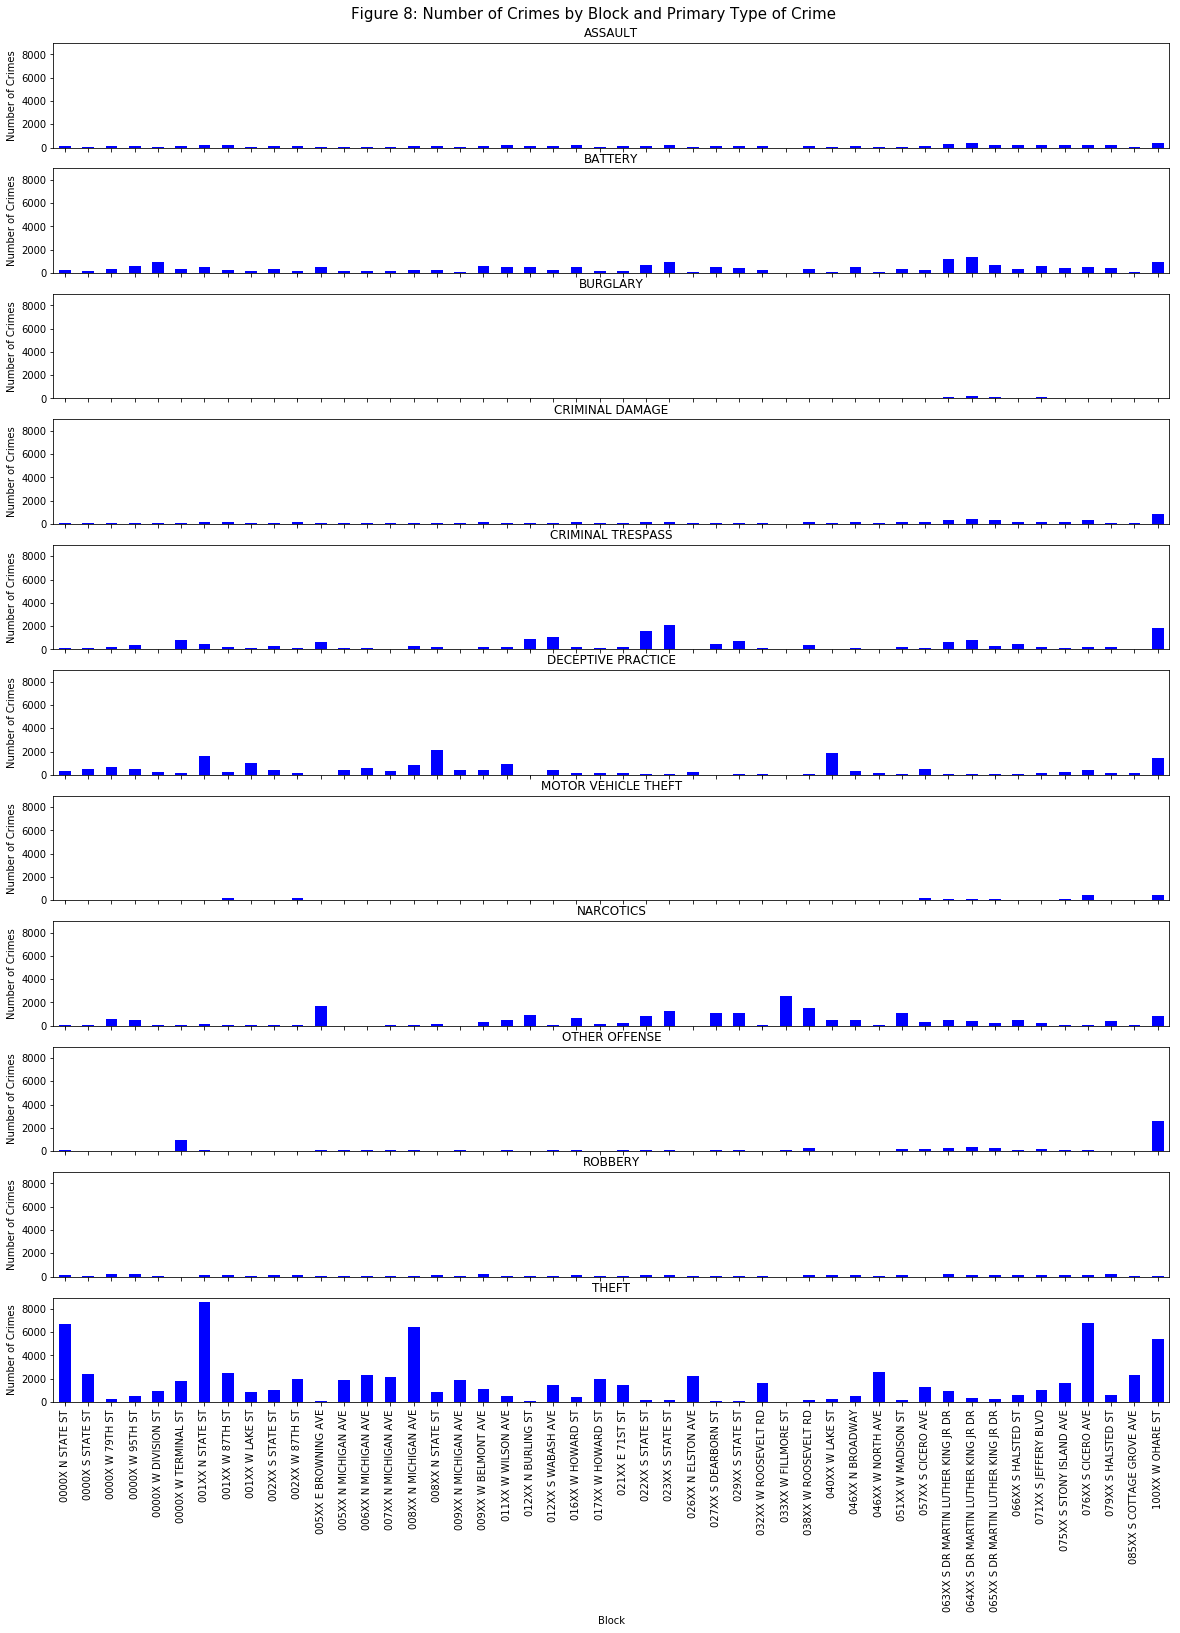

In [85]:
# Getting number of crimes per block and converting to a dataframe
crime_df_block = crime_df.pivot_table(index = 'Block', columns = 'Primary Type', values = 'Date', aggfunc = len)

num_blocks = len(set(crime_df['Block']))
print('Number of Unique Blocks: ', num_blocks)

#Plotting a sample of blocks where the count is at least 2500
ax = crime_df_block[crime_df_block.sum(axis = 1) >= 2500].plot.bar(figsize = (20,25), subplots = True, legend = False, color = 'blue', sharey=True)
plt.suptitle('Figure 8: Number of Crimes by Block and Primary Type of Crime', y = 0.9, size = 15)
for x in range(11):
    ax[x].set_ylabel('Number of Crimes')

## Latitude/Longitude

Figure 9a shows that while each primary type of crime generally has a bimodal distribution of latitudes, there are still differences between them.  Crimes involving narcotics, theft, deceptive practice, and criminal trespassing have higher numbers of crimes towards the northern part of the city. For narcotics, theft, and deceptive practice especially, there is a pronounced increase in the number of crimes near the latitude of the city center of Chicago.

Figure 9b shows that crimes involving theft, deceptive practice, and criminal trespassing have a pronounced increase in the number of crimes near the longitude of the city center of Chicago. A slight increase in the number of crimes can be seen near longitude -87.9 for crimes involving other offenses, theft, deceptive practice, and criminal trespassing. For crimes involving narcotics, there is a pronounced increase in the number of crimes near longitude -87.7.

Figure 9c generally shows different distributions of crimes for each primary type of crime. All crime types show a higher concentration of crimes along lake Michigan (the eastern edge of the map), with crimes involving narcotics showing a few gaps. Crimes involving robbery, narcotics, motor vehicle theft, and criminal trespassing have the fewest occurrences of crime in the northwest area of Chicago (between -87.7 and -87.8).

Figure 9d combines the occurrence of the two least frequent crimes, robbery and criminal trespassing. It is not apparent if there are any discernable patterns between these two crime types as combined, they heavily cover most of Chicago. 

Overall, latitude and longitude would be useful in predicting the primary type of crime.  

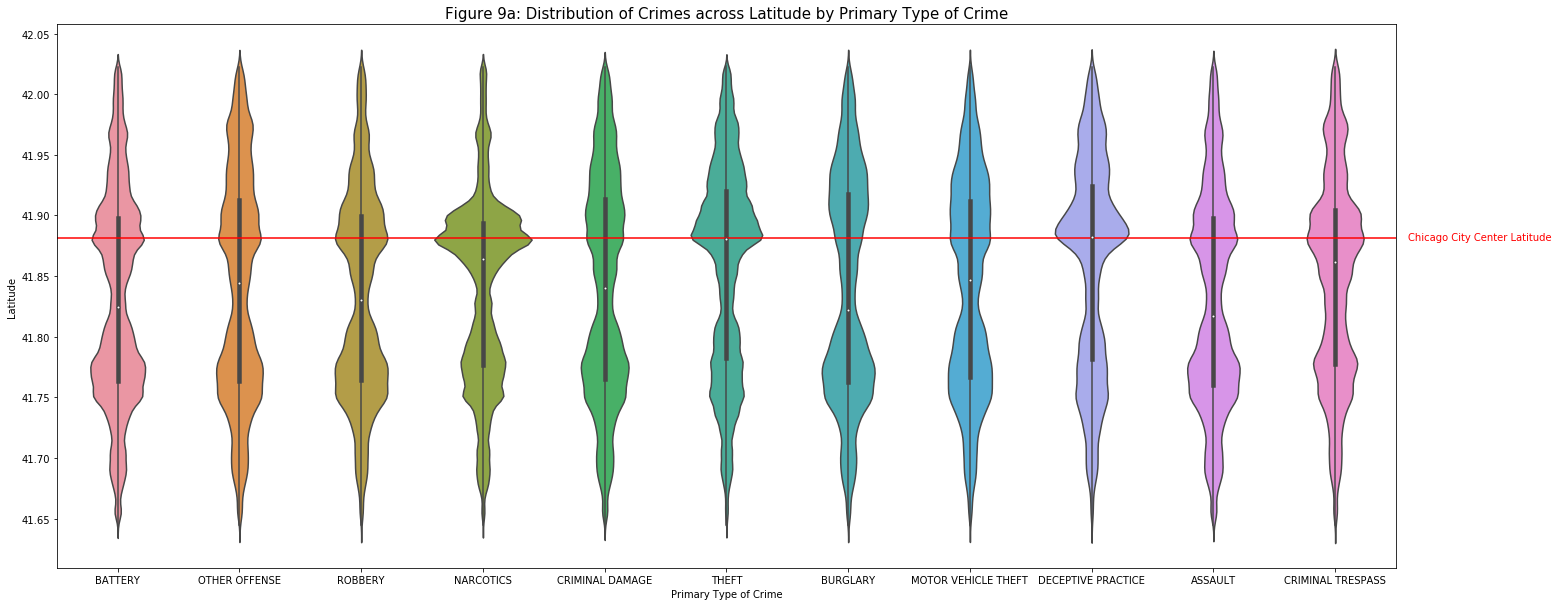

In [87]:
chicago_lat = 41.881832

fig, ax = plt.subplots()
fig.set_size_inches(24, 10)
_ = sns.violinplot(x='Primary Type', y = 'Latitude', data=crime_df, ax=ax)
_ = plt.xlabel('Primary Type of Crime')
_ = plt.axhline(y=chicago_lat, color='r', linestyle='-')
_ = plt.text(10.6, 41.88, 'Chicago City Center Latitude', color='red')
_ = plt.title('Figure 9a: Distribution of Crimes across Latitude by Primary Type of Crime', size=15)

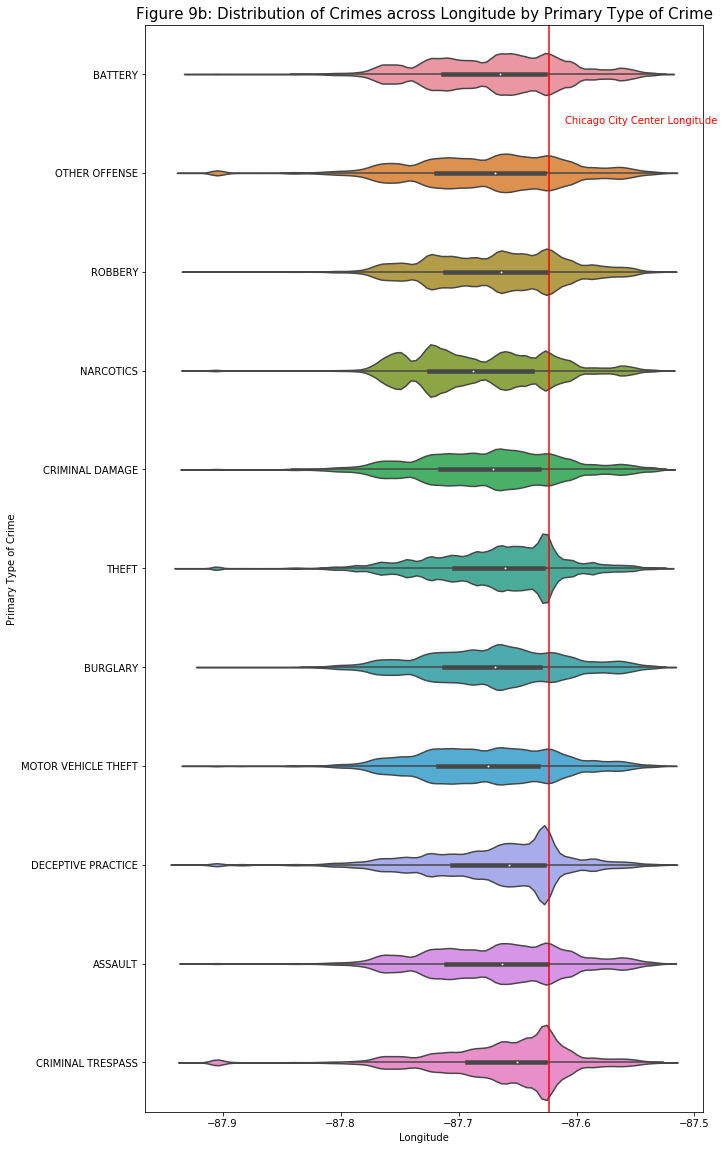

In [88]:
chicago_lon = -87.623177

fig, ax = plt.subplots()
fig.set_size_inches(10, 20)
_ = sns.violinplot(x='Longitude', y = 'Primary Type', data=crime_df, ax=ax)
_ = plt.xlabel('Longitude')
_ = plt.ylabel('Primary Type of Crime')
_ = plt.axvline(x=chicago_lon, color='r', linestyle='-')
_ = plt.text(-87.61, 0.5, 'Chicago City Center Longitude', color='red')
_ = plt.title('Figure 9b: Distribution of Crimes across Longitude by Primary Type of Crime', size=15)

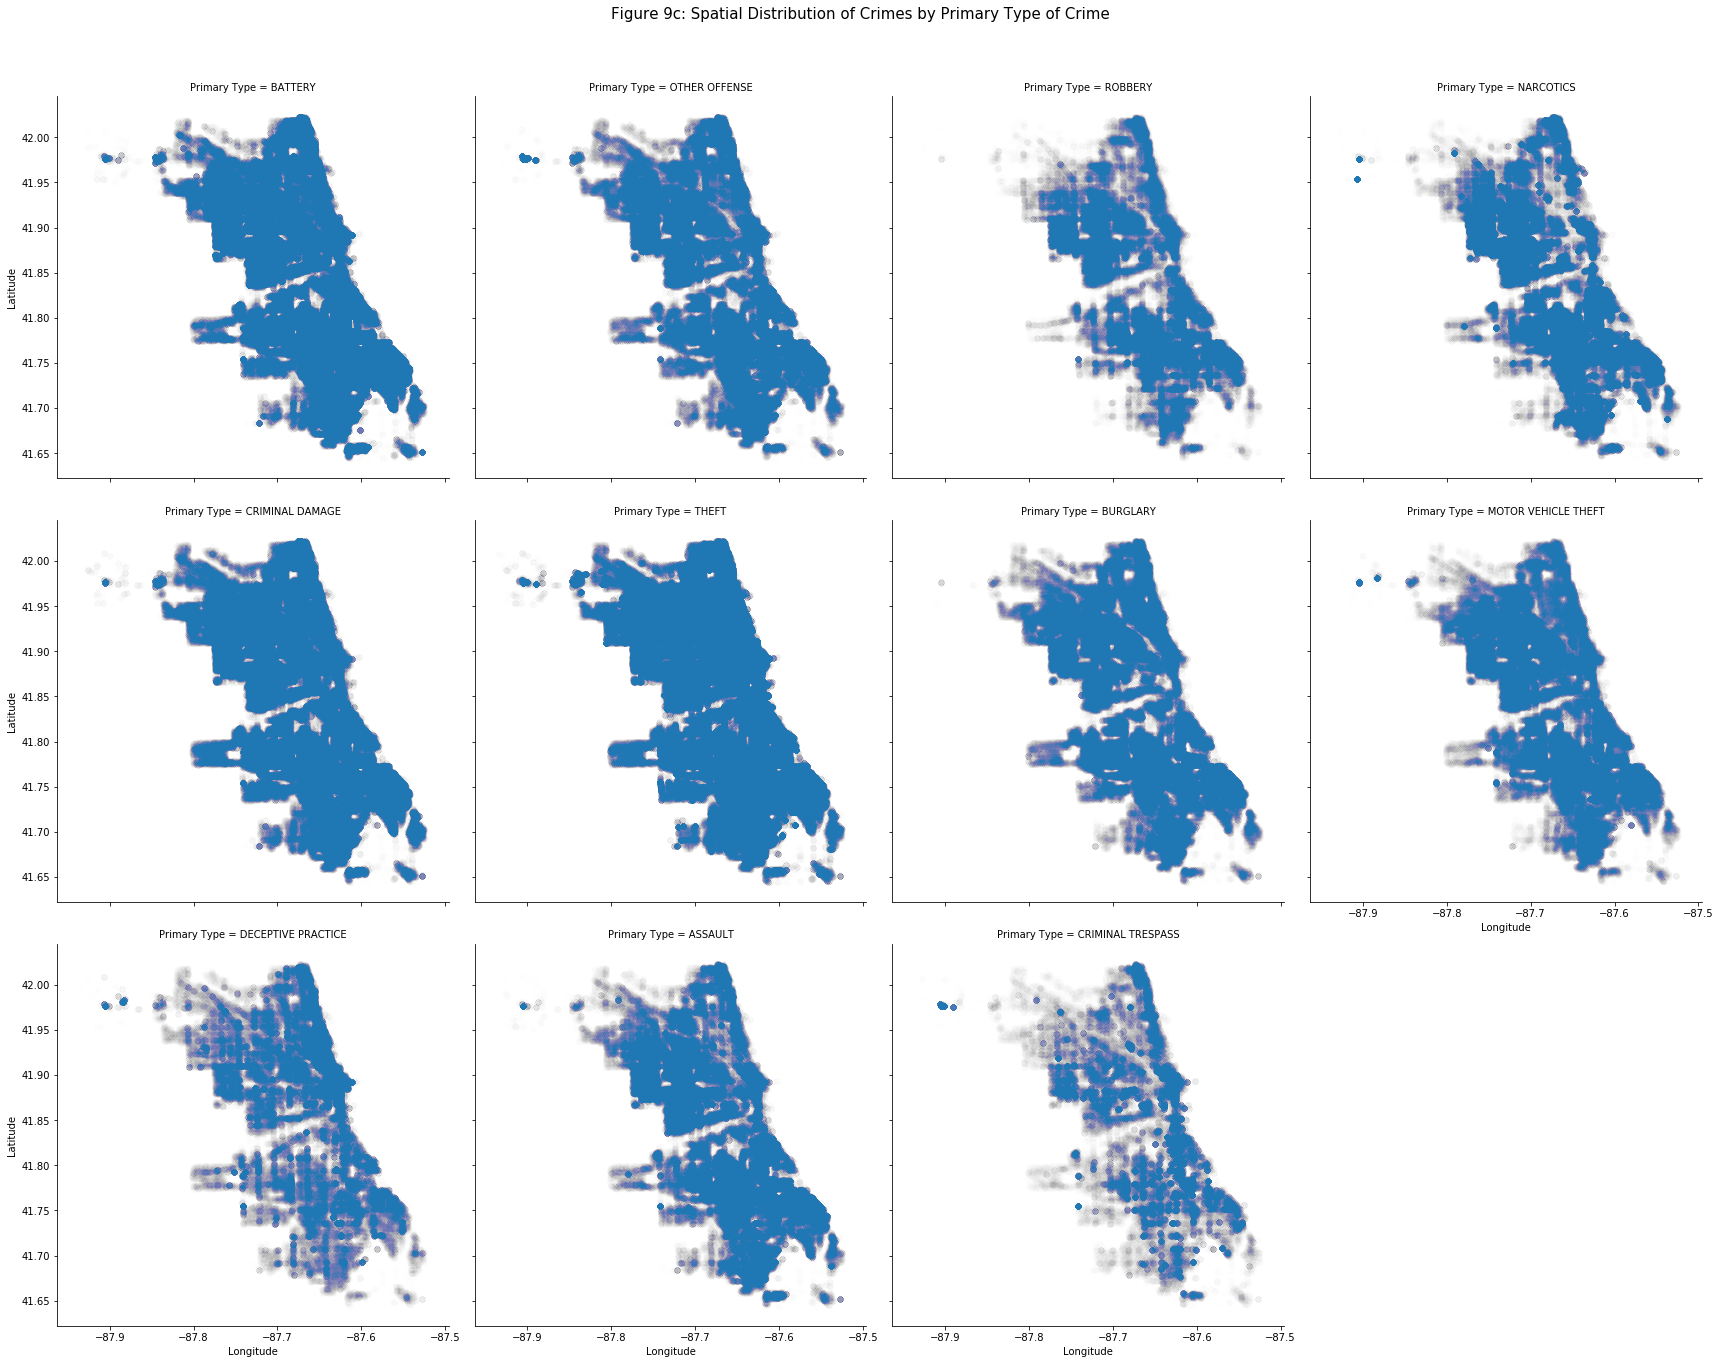

In [89]:
_ = sns.lmplot(x = 'Longitude', y = 'Latitude', data = crime_df, col = 'Primary Type', col_wrap = 4, height = 6, aspect = 1, legend=False, fit_reg = False, scatter_kws={'alpha':0.002})
_ = plt.suptitle('Figure 9c: Spatial Distribution of Crimes by Primary Type of Crime', y = 1.05, size = 15)

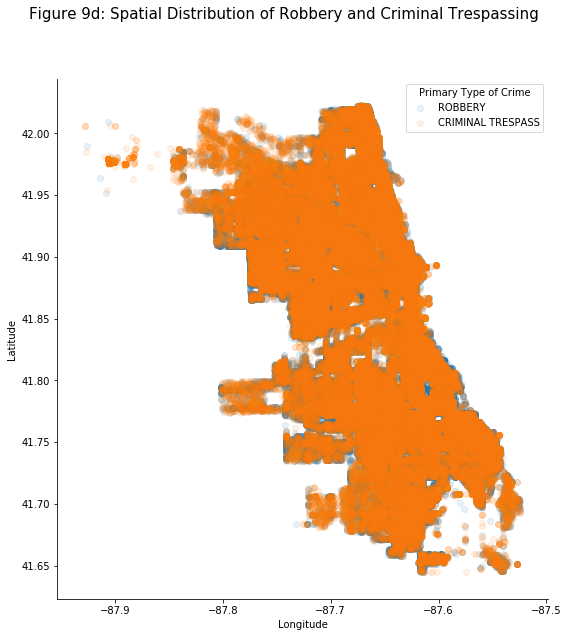

In [90]:
# Creating a combination plot of the 2 less frequent crime types
crime_2 = crime_df[[each in ['ROBBERY', 'CRIMINAL TRESPASS'] for each in crime_df['Primary Type']]]

_ = sns.lmplot(x = 'Longitude', y = 'Latitude', data = crime_2, hue = 'Primary Type', legend = False, height = 8, aspect = 1, fit_reg = False, scatter_kws={'alpha':0.1})
_ = plt.legend(title='Primary Type of Crime')
_ = plt.suptitle('Figure 9d: Spatial Distribution of Robbery and Criminal Trespassing', y = 1.1, size = 15)

## Distance from Chicago City Center

Figure 10 shows that the distribution of distance from Chicago varies for each primary type of crime.  For crimes involving theft, deceptive practice, and criminal trespassing, there is an relatively higher concentration of crimes closer to the city center of Chicago.  For theft and deceptive practice, the number of crimes decrease at about 3km away from the city center and then increase, plateuing from 5 to 15km away from the city center before decreasing.  For criminal trespassing, the number of crimes are generally steady until approximately 15km away from the city center.  Crimes involving narcotics has a multimodal distribution, with increasing and decreasing concentrations of crimes at multiple points. 

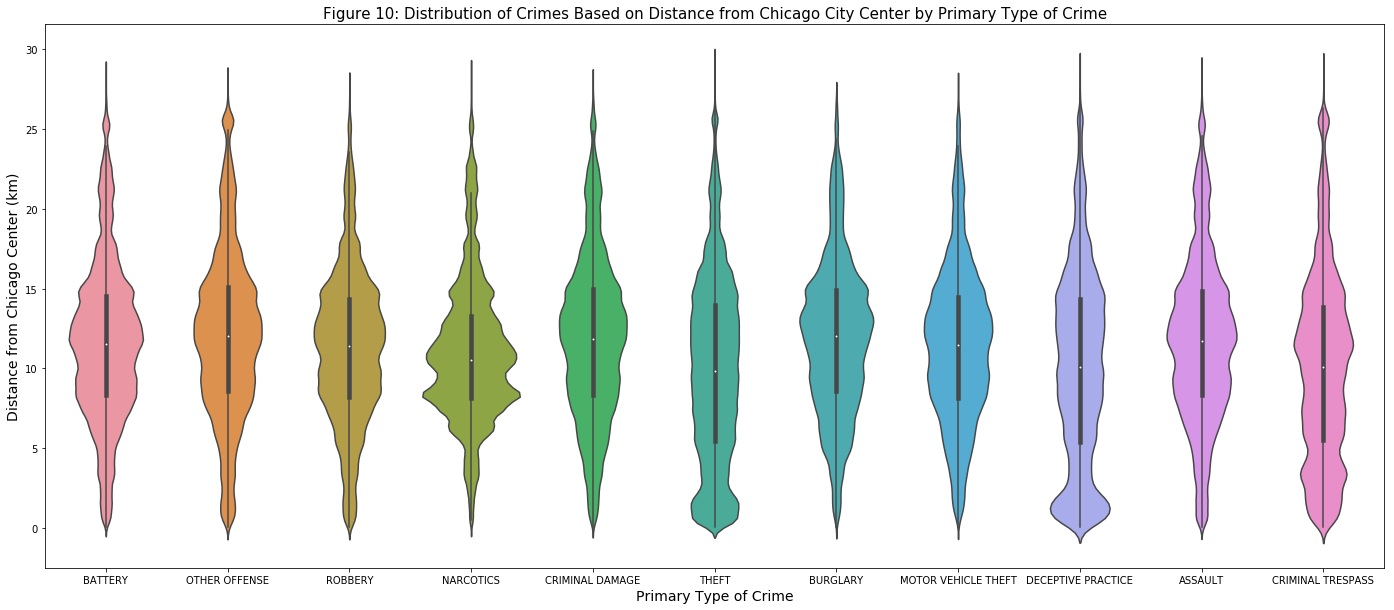

In [97]:
fig, ax = plt.subplots()
fig.set_size_inches(24, 10)
_ = sns.violinplot(x='Primary Type', y='Distance from Chicago (km)', data=crime_df, ax=ax)
_ = plt.xlabel('Primary Type of Crime', size=14)
_ = plt.ylabel('Distance from Chicago Center (km)', size=14)
_ = plt.title('Figure 10: Distribution of Crimes Based on Distance from Chicago City Center by Primary Type of Crime', size=15)

## Distance from Closest Police Station

In Figure 11a, there isn't a significant amount of difference between the distribution of crimes and the distance from the closest police station for each type of crime.  The average distance from the closest police station for each crime is approximately 2km. All of the distributions are fat tailed with the bulk of crimes occuring at around 0-4km away from a police station.  A quick examination of the average distance from police stations by community shows that crimes with the highest distances may have mainly occurred in community 76, which is a bit more removed to the northwest from the remainder of Chicago. 

In order to reduce the tails of the distributions, the square root of the distance from the closest police station was taken and then plotted in Figure 11b.  There are just slight variations in the distributions.  This feature may have a slight relationship with the primary type of crime, so it will be used in training a model.  

Figure 11c shows that there is no significant improvement after removing crimes within community 76, just a reduction in some tails. It is possible that more communities would have to be removed in order for there to be a considerable improvement in the distributions.  

Figure 11d is not exactly the same as Figure 3a, which shows the number of crimes by police district, but they show some similar patterns.  For example, districts 11 and 15 still have the highest number of crimes involving narcotics and district 18 still has the highest number of crimes involving theft.  The closest police station district therefore may not add additional value to predicting the type of crime. 

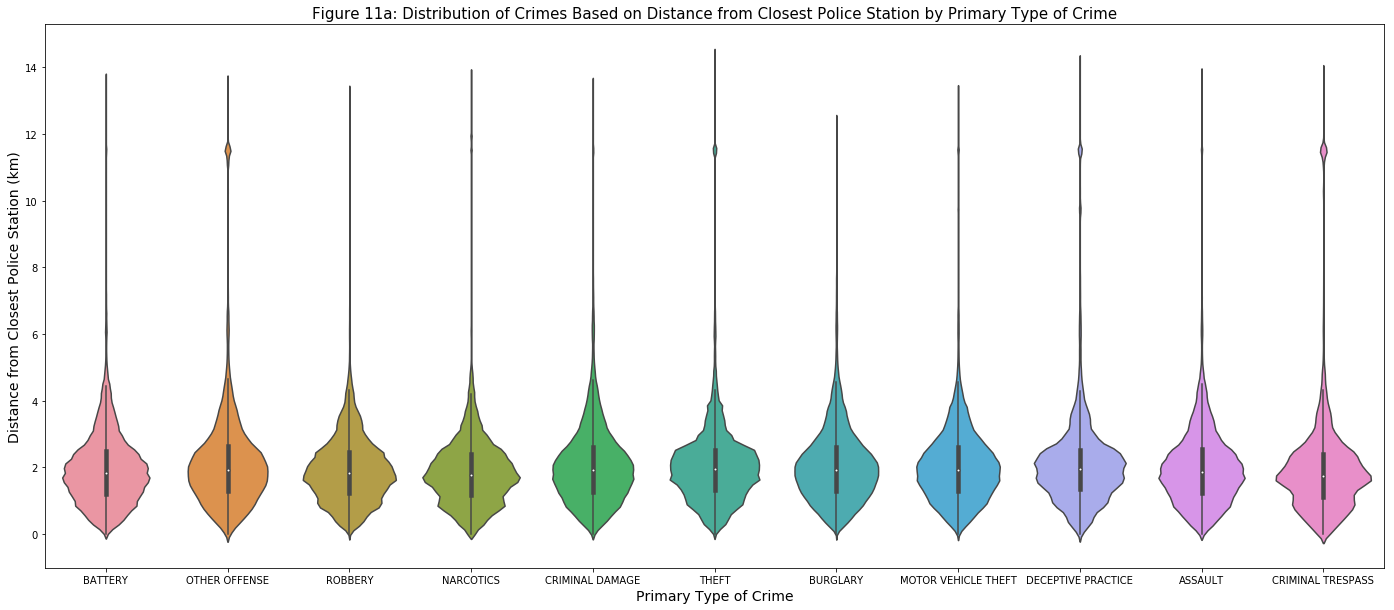

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(24, 10)
_ = sns.violinplot(x='Primary Type', y = 'Distance from Closest Police Station (km)', data=crime_df, ax=ax)
_ = plt.xlabel('Primary Type of Crime', size=14)
_ = plt.ylabel('Distance from Closest Police Station (km)', size=14)
_ = plt.title('Figure 11a: Distribution of Crimes Based on Distance from Closest Police Station by Primary Type of Crime', size=15)

In [13]:
# Getting average distance from police station for each community and returning the highest 5
crime_dist = crime_df.groupby('Community')['Distance from Closest Police Station (km)'].mean().sort_values(ascending=False)
crime_dist.index = crime_dist.index.astype('int')
crime_dist.head()

Community
76    9.781333
55    6.028563
9     5.298034
56    4.884690
64    4.838586
Name: Distance from Closest Police Station (km), dtype: float64

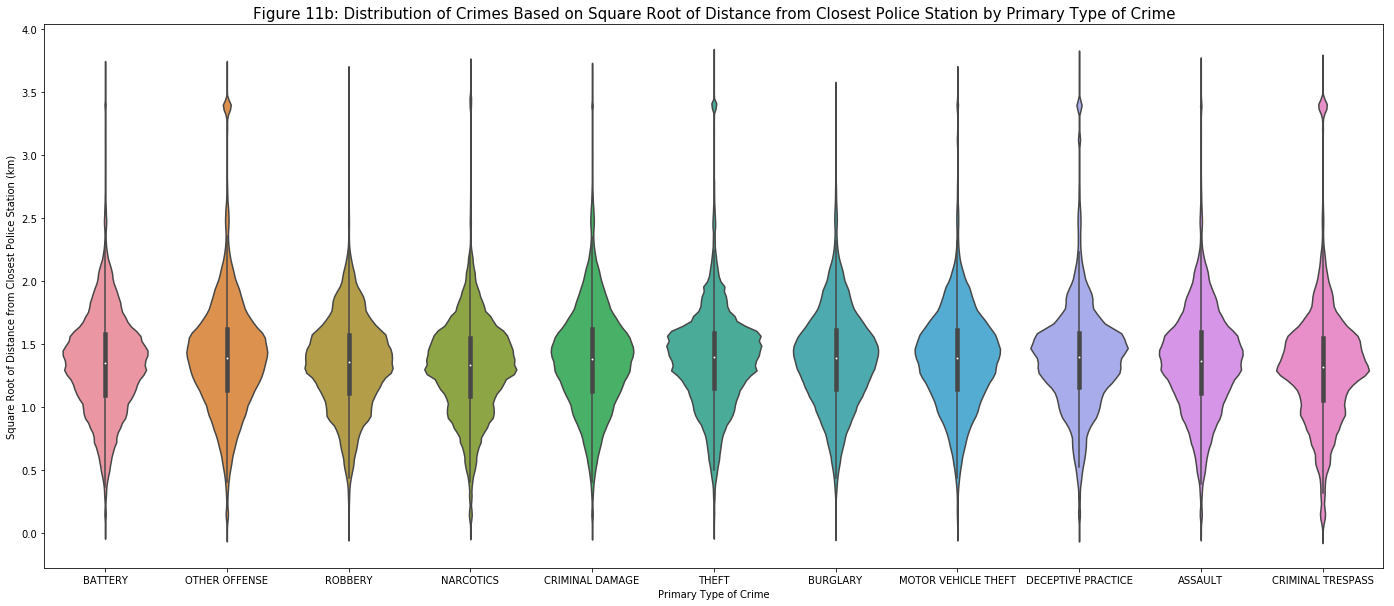

In [130]:
# Creating a new column with the square root of the distance from the closest police station and plotting
crime_df['Square Root of Distance from Closest Police Station (km)'] = np.sqrt(crime_df['Distance from Closest Police Station (km)'])

fig, ax = plt.subplots()
fig.set_size_inches(24, 10)
_ = sns.violinplot(x='Primary Type', y='Square Root of Distance from Closest Police Station (km)', data=crime_df, ax=ax)
_ = plt.xlabel('Primary Type of Crime')
_ = plt.ylabel('Square Root of Distance from Closest Police Station (km)')
_ = plt.title('Figure 11b: Distribution of Crimes Based on Square Root of Distance from Closest Police Station by Primary Type of Crime', size=15)

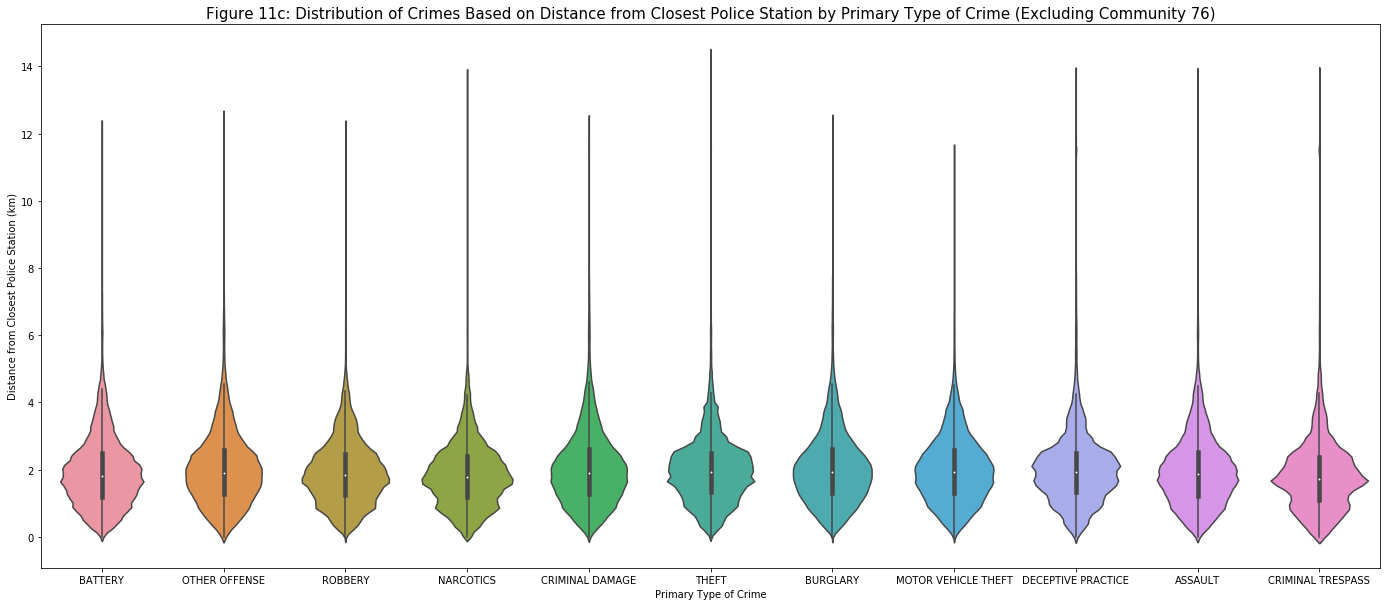

In [131]:
# Ignoring community 76 (O'hare) and plotting again
fig, ax = plt.subplots()
fig.set_size_inches(24, 10)
_ = sns.violinplot(x='Primary Type', y='Distance from Closest Police Station (km)', data=crime_df[crime_df['Community'] != 76], ax=ax)
_ = plt.xlabel('Primary Type of Crime')
_ = plt.ylabel('Distance from Closest Police Station (km)')
_ = plt.title('Figure 11c: Distribution of Crimes Based on Distance from Closest Police Station by Primary Type of Crime (Excluding Community 76)', size=15)

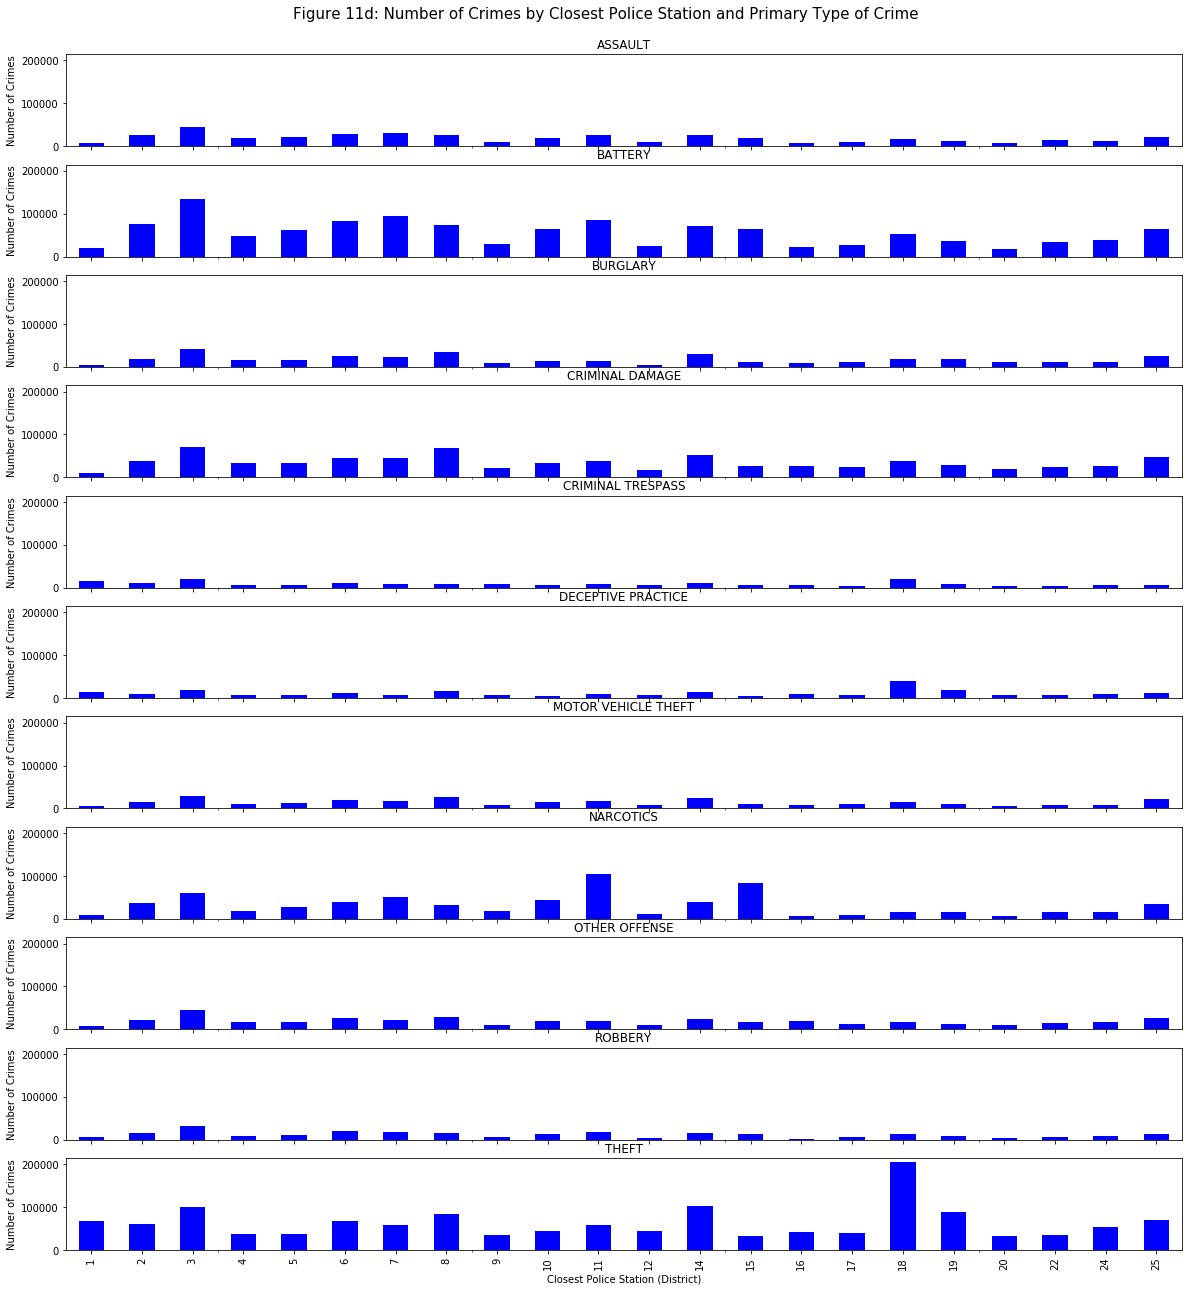

In [7]:
# Getting number of crimes based on the closest police station and converting to a dataframe
crime_df_close = crime_df.pivot_table(index = 'Closest Police Station (District)', columns = 'Primary Type', values = 'Date', aggfunc = len)
crime_df_close.index = crime_df_close.index.astype('int')

# Making a bar plot of the number of crimes per police district
ax = crime_df_close.plot.bar(figsize=(20,22), subplots=True, legend=False, color='blue', stacked=False, sharey=True)
_ = plt.suptitle('Figure 11d: Number of Crimes by Closest Police Station and Primary Type of Crime', y = 0.91, size = 15)
for x in range(11):
    ax[x].set_ylabel('Number of Crimes')

## Distance from Closest Train Stop

Figure 12a shows that all of the distributions of crimes have fat tails and on average, crimes occur approximately 1km away from train stops.  The bulk of crimes appear between 0 and 2km from train stops.  There is a higher concentration of crimes involving theft, deceptive practice, and criminal trespassing closer to train stops. This may be a useful variable to predict the type of crime.  

In order to reduce the tails of the distributions, the square root of the distance from the closest train stop was taken and then plotted in Figure 12b. There are some variations in the distributions, but not as much as in the original plot.  So it would be more advantageous to use the original distances to train my model. 

According to Figure 12c, the most crimes occurred near stops associated with the Blue, Green, Orange, and Red Lines.  Figure 12d breaks down the proportion of each crime type for each of these lines.  Stops associated with the Blue Line have a high proportion of theft and then battery.  Stops associated with the Green Line have a high proportion of battery and then theft/narcotics.  Stops associated with the Orange Line have a  high proportion of theft and then battery.  Stops associated with the Red Line have a high proportion of theft and then battery.  It is possible that there could be some relationship between the train line and and the type of crime.

Per Figure 12d, it is possible that there is some relationship between the train stop and type of crime.  However, there are 100 unique train stops and it would be better to simplify this and just use the closest train line in order to reduce the number of features. 

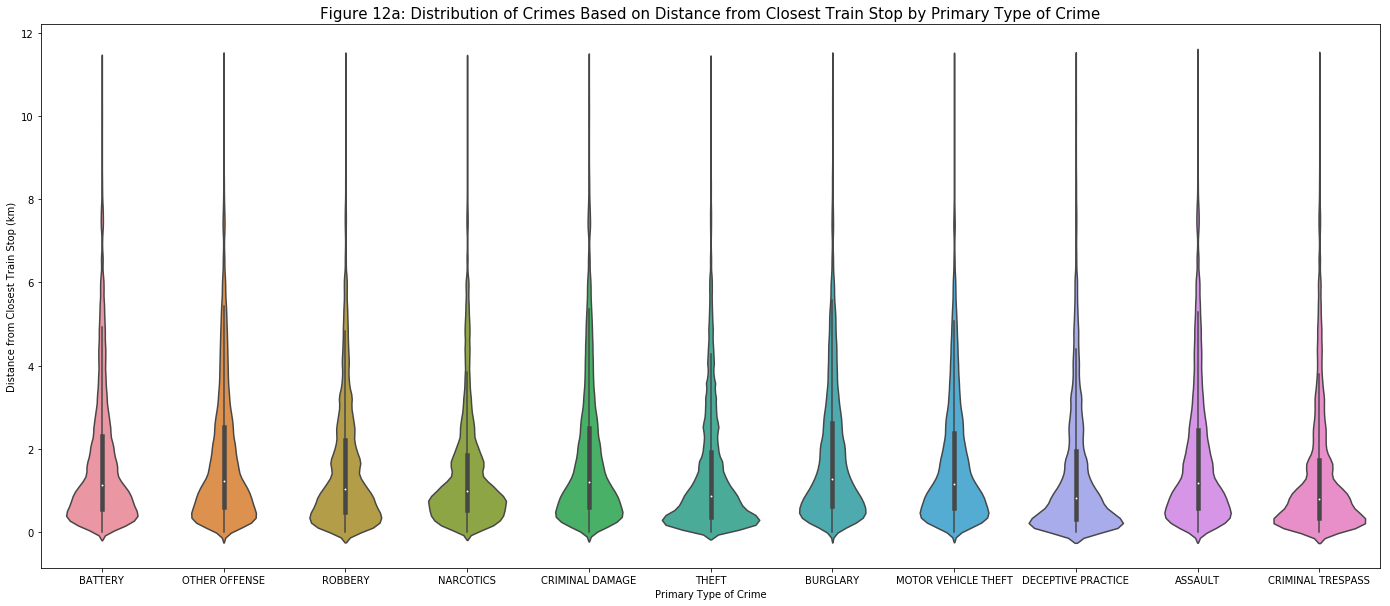

In [39]:
fig, ax = plt.subplots()
fig.set_size_inches(24, 10)
_ = sns.violinplot(x='Primary Type', y = 'Distance from Closest Train Stop (km)', data=crime_df, ax=ax)
_ = plt.xlabel('Primary Type of Crime')
_ = plt.ylabel('Distance from Closest Train Stop (km)')
_ = plt.title('Figure 12a: Distribution of Crimes Based on Distance from Closest Train Stop by Primary Type of Crime', size=15)

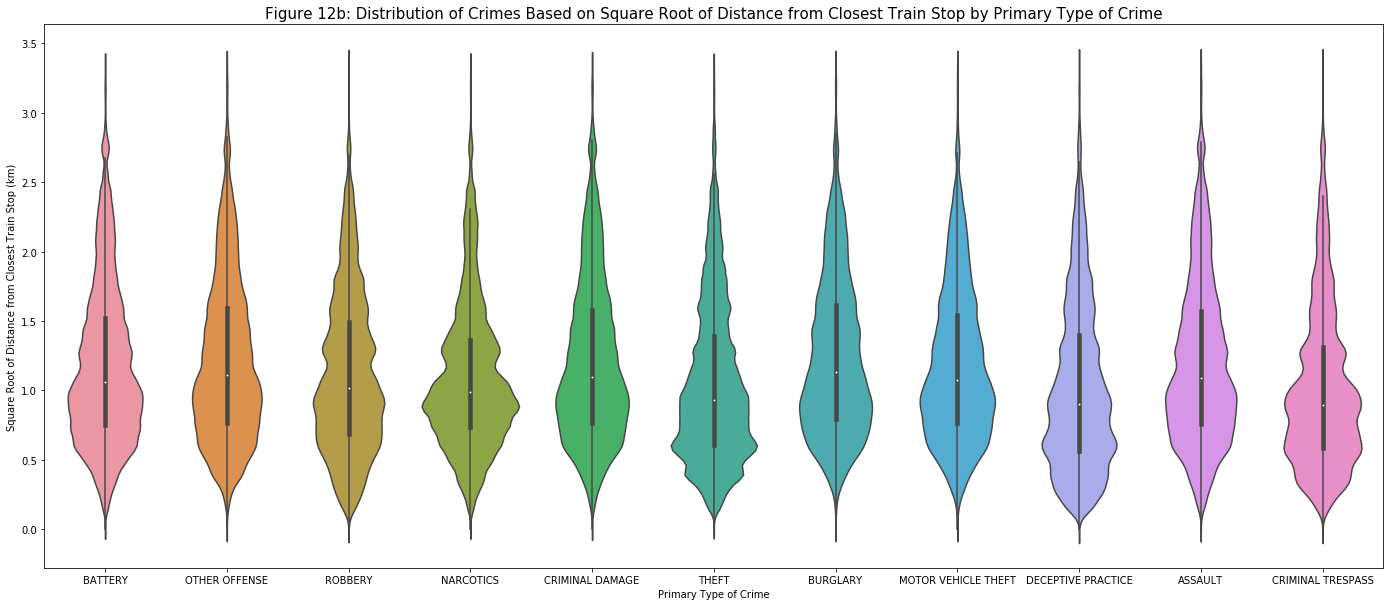

In [40]:
crime_df['Square Root of Distance from Closest Train Stop (km)'] = np.sqrt(crime_df['Distance from Closest Train Stop (km)'])

fig, ax = plt.subplots()
fig.set_size_inches(24, 10)
_ = sns.violinplot(x='Primary Type', y = 'Square Root of Distance from Closest Train Stop (km)', data=crime_df, ax=ax)
_ = plt.xlabel('Primary Type of Crime')
_ = plt.ylabel('Square Root of Distance from Closest Train Stop (km)')
_ = plt.title('Figure 12b: Distribution of Crimes Based on Square Root of Distance from Closest Train Stop by Primary Type of Crime', size=15)

Text(0,0.5,'Number of Crimes')

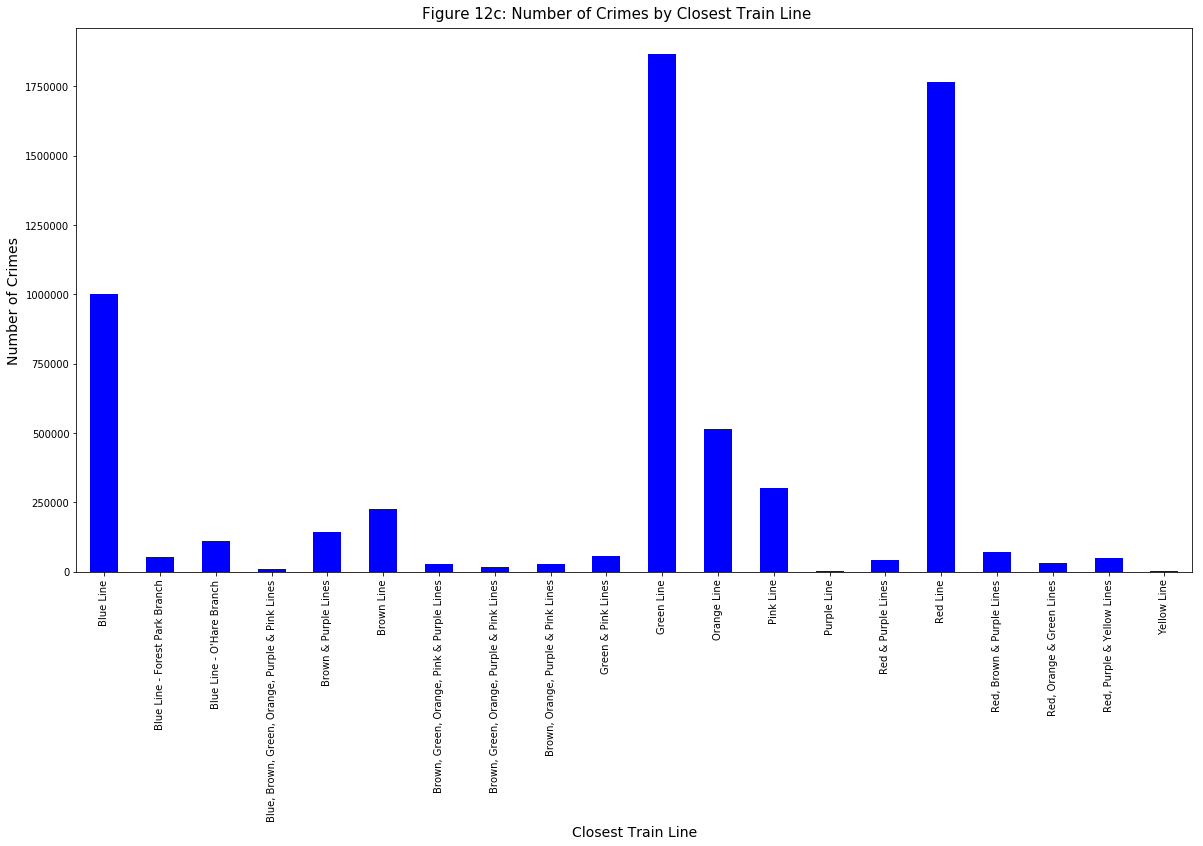

In [37]:
# Getting number of crimes based on the closest train line and converting to a dataframe
crime_df_trainline = crime_df.pivot_table(index = 'Closest Train Line', columns = 'Primary Type', values = 'Date', aggfunc = len)

# Making a bar plot of the number of crimes based on the closest train line 
#ax = crime_df_trainline.plot.bar(figsize = (25,15), subplots = False, legend = True, colormap = 'tab20', stacked=False)
ax = crime_df_trainline.plot.bar(figsize=(20,10), subplots=False, legend=False, color ='blue', stacked=True, sharey=True)
#plt.setp(ax.get_xticklabels(), rotation='vertical', fontsize=14)
plt.suptitle('Figure 12c: Number of Crimes by Closest Train Line', y = 0.91, size = 15)
plt.xlabel('Closest Train Line', size=14)
plt.ylabel('Number of Crimes', size=14)
#for x in range(11):
#    ax[x].set_ylabel('Number of Crimes')

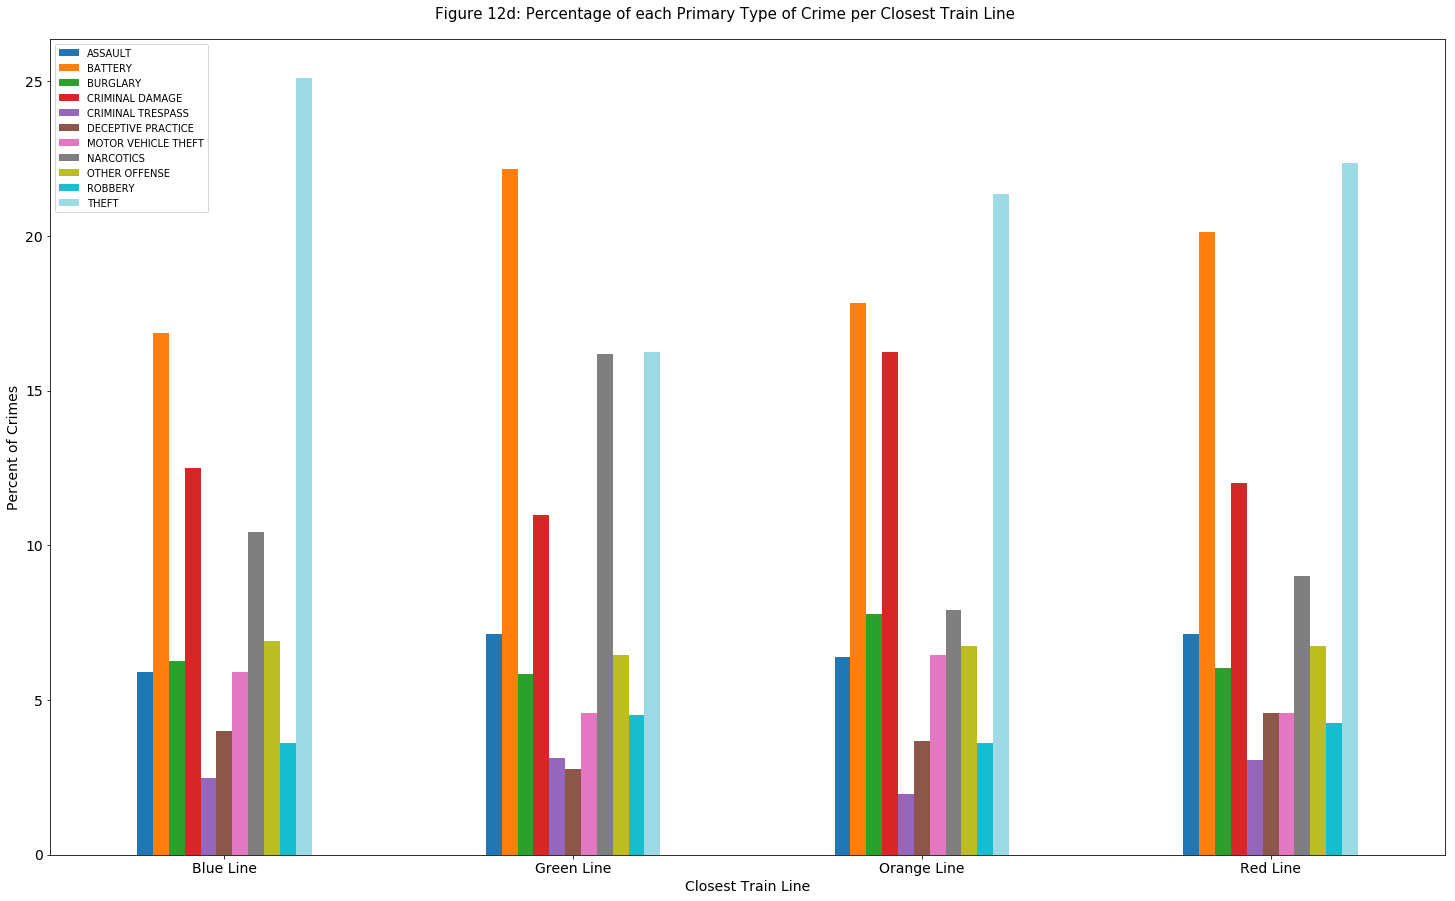

In [36]:
# Calculating the proportion of crimes within each train line
crime_df_trainline['Totals'] = crime_df_trainline.sum(axis=1)
crime_df_trainline_prop = pd.DataFrame()
for r in crime_df_trainline.index: 
    for c in crime_df_trainline.columns:
        if c != 'Totals':
            crime_df_trainline_prop.loc[r, c] = crime_df_trainline.loc[r, c] * 100 / crime_df_trainline.loc[r, 'Totals']
            
# Making a bar plot of the proportion of crimes per closest train line 
ax = crime_df_trainline_prop[(crime_df_trainline_prop.index == 'Blue Line') | (crime_df_trainline_prop.index == 'Green Line') | (crime_df_trainline_prop.index == 'Orange Line') | (crime_df_trainline_prop.index == 'Red Line')].plot.bar(figsize = (25,15), subplots=False, legend=True, colormap='tab20', stacked=False, rot=0)
plt.suptitle('Figure 12d: Percentage of each Primary Type of Crime per Closest Train Line', y = 0.91, size = 15)
plt.ylabel('Percent of Crimes', size=14)
plt.xlabel('Closest Train Line', size=14)
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)

del crime_df_trainline['Totals']

Number of Unique Train Stops:  100


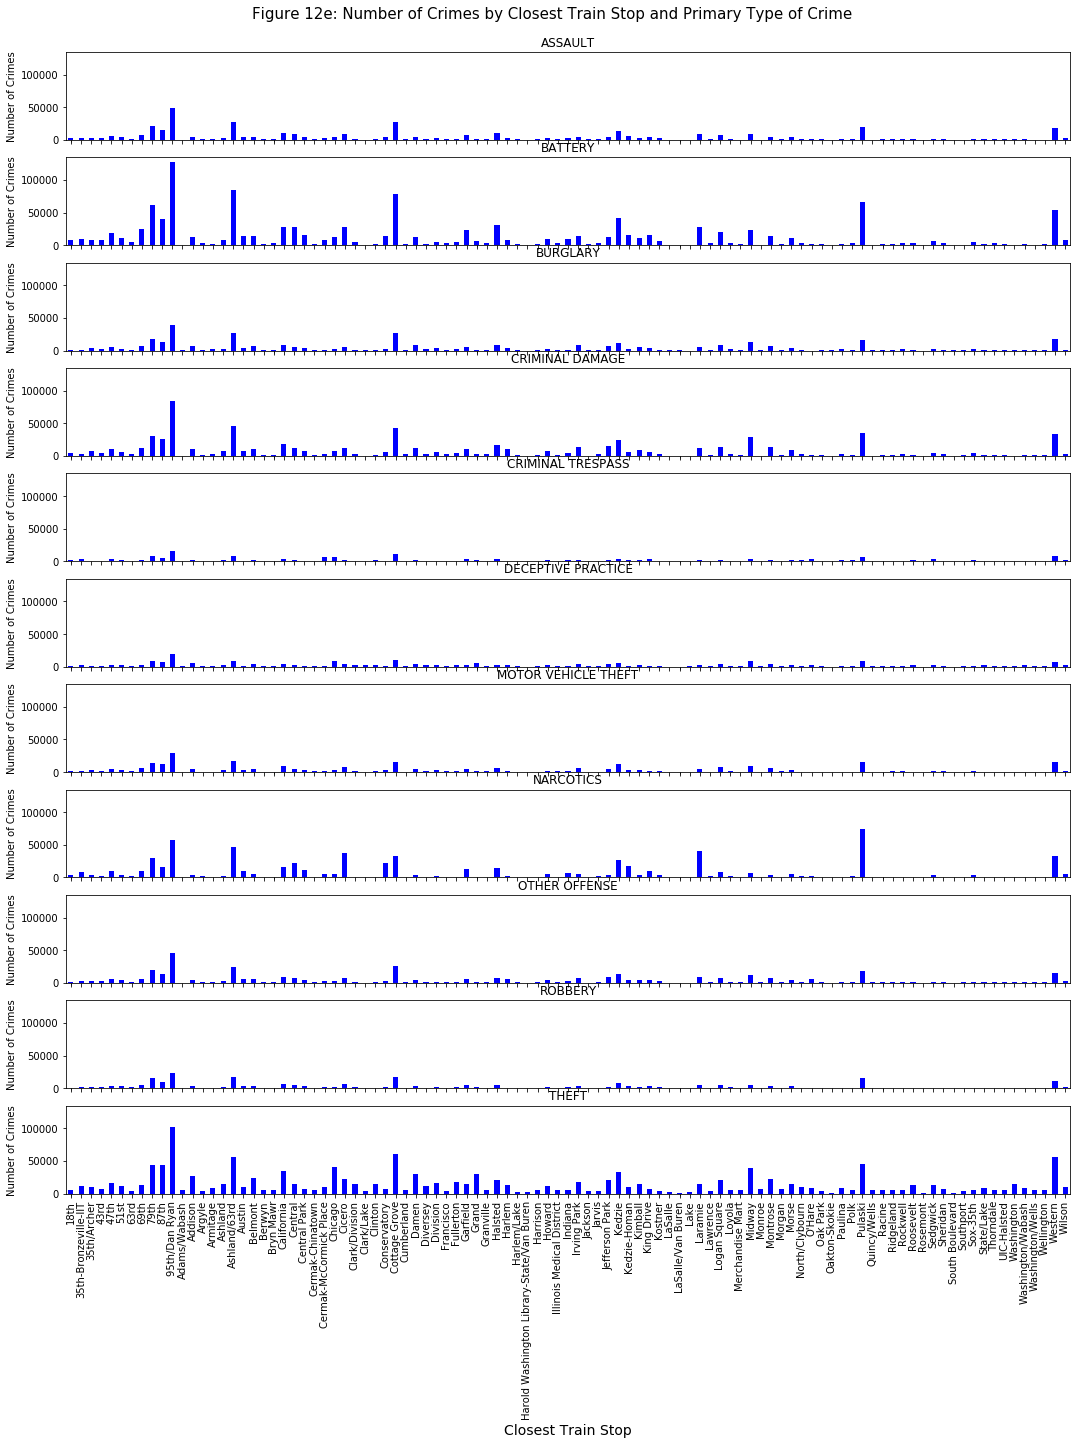

In [41]:
# Getting number of crimes based on the closest train stop and converting to a dataframe
crime_df_trainstop = crime_df.pivot_table(index = 'Closest Train Stop', columns = 'Primary Type', values = 'Date', aggfunc = len)

num_stops = len(set(crime_df['Closest Train Stop']))
print('Number of Unique Train Stops: ', num_stops)

# Making a bar plot of the number of crimes based on the closest train stop 
ax = crime_df_trainstop.plot.bar(figsize = (18,21), subplots = True, legend=False, stacked=False, sharey=True, color='blue')
plt.suptitle('Figure 12e: Number of Crimes by Closest Train Stop and Primary Type of Crime', y = 0.91, size = 15)
plt.xlabel('Closest Train Stop', size=14)
for x in range(11):
    ax[x].set_ylabel('Number of Crimes')

## Distance from Closest Bus Stop

Figure 13a shows that for all crime types, the highest concentration of crimes is found close to bus stops. This is especially true for robbery.  In order to reduce the tails of the distributions, the square root of the distance from the closest bus stop was taken and plotted in Figure 13b. Here we can see that the distributions for all crime types except for deceptive practice and criminal trespassing are multimodal.  Though most of the distributions are multimodal, there are some differences between them.  Therefore, the square root of the distance from the closest bus stop could be useful in predicting the type of crime.  

Looking at Figure 13c, it is possible that the closest bus stop could be somewhat useful to predict the type of crime. For example the stops at State & Madison and State & Washington have relatively high counts for theft but not for any othe crime type. However, as there are 5,832 unique bus stops, this would not be feasible.

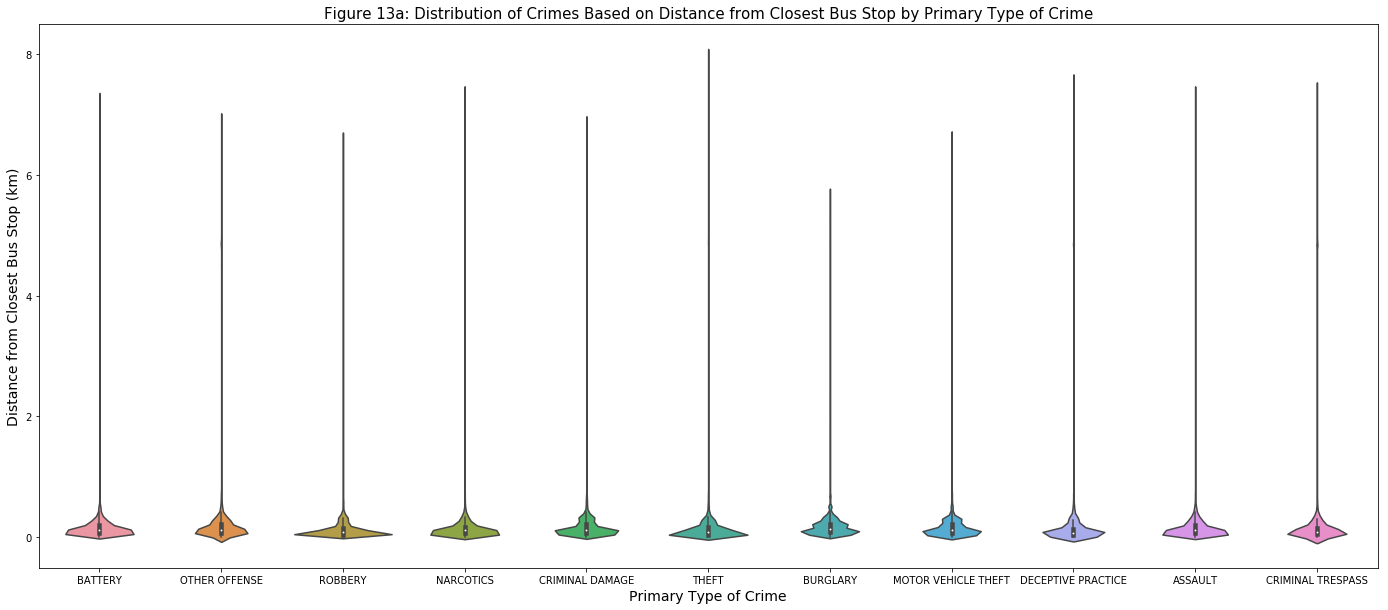

In [107]:
fig, ax = plt.subplots()
fig.set_size_inches(24, 10)
_ = sns.violinplot(x='Primary Type', y = 'Distance from Closest Bus Stop (km)', data=crime_df, ax=ax)
_ = plt.xlabel('Primary Type of Crime', size=14)
_ = plt.ylabel('Distance from Closest Bus Stop (km)', size=14)
_ = plt.title('Figure 13a: Distribution of Crimes Based on Distance from Closest Bus Stop by Primary Type of Crime', size=15)

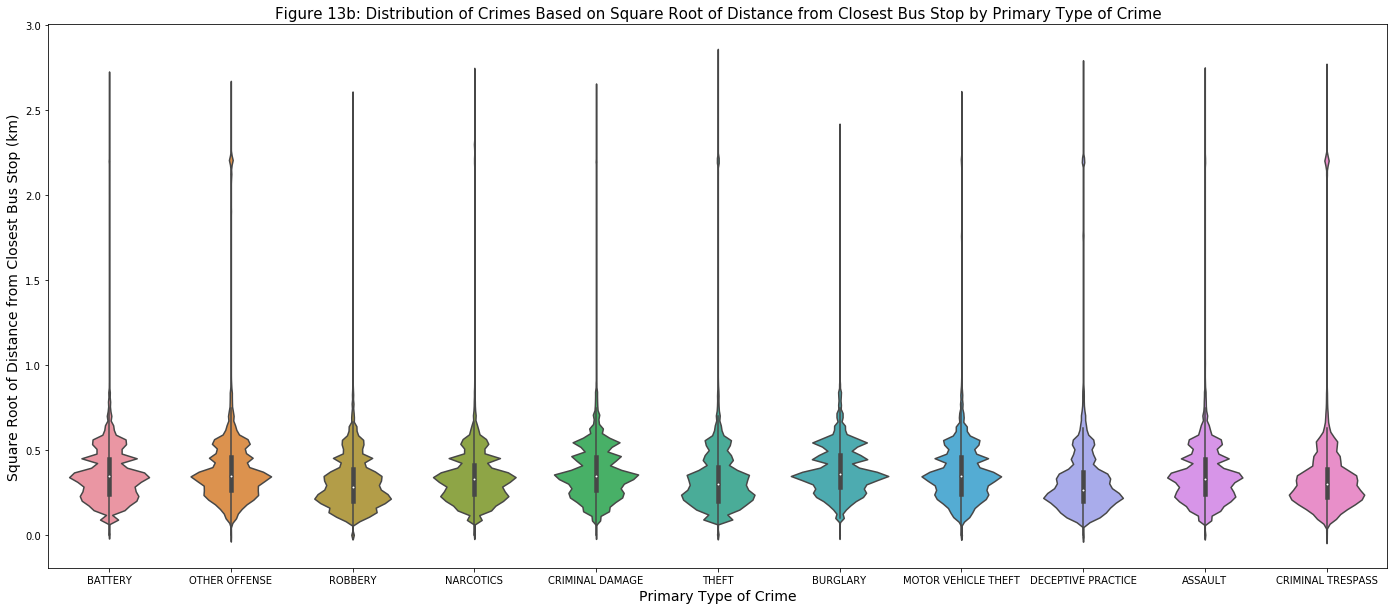

In [108]:
crime_df['Square Root of Distance from Closest Bus Stop (km)'] = np.sqrt(crime_df['Distance from Closest Bus Stop (km)'])

fig, ax = plt.subplots()
fig.set_size_inches(24, 10)
_ = sns.violinplot(x='Primary Type', y = 'Square Root of Distance from Closest Bus Stop (km)', data=crime_df, ax=ax)
_ = plt.xlabel('Primary Type of Crime', size=14)
_ = plt.ylabel('Square Root of Distance from Closest Bus Stop (km)', size=14)
_ = plt.title('Figure 13b: Distribution of Crimes Based on Square Root of Distance from Closest Bus Stop by Primary Type of Crime', size=15)

Number of Unique Bus Stops:  5832


Text(0.5,0,'Closest Bus Stop')

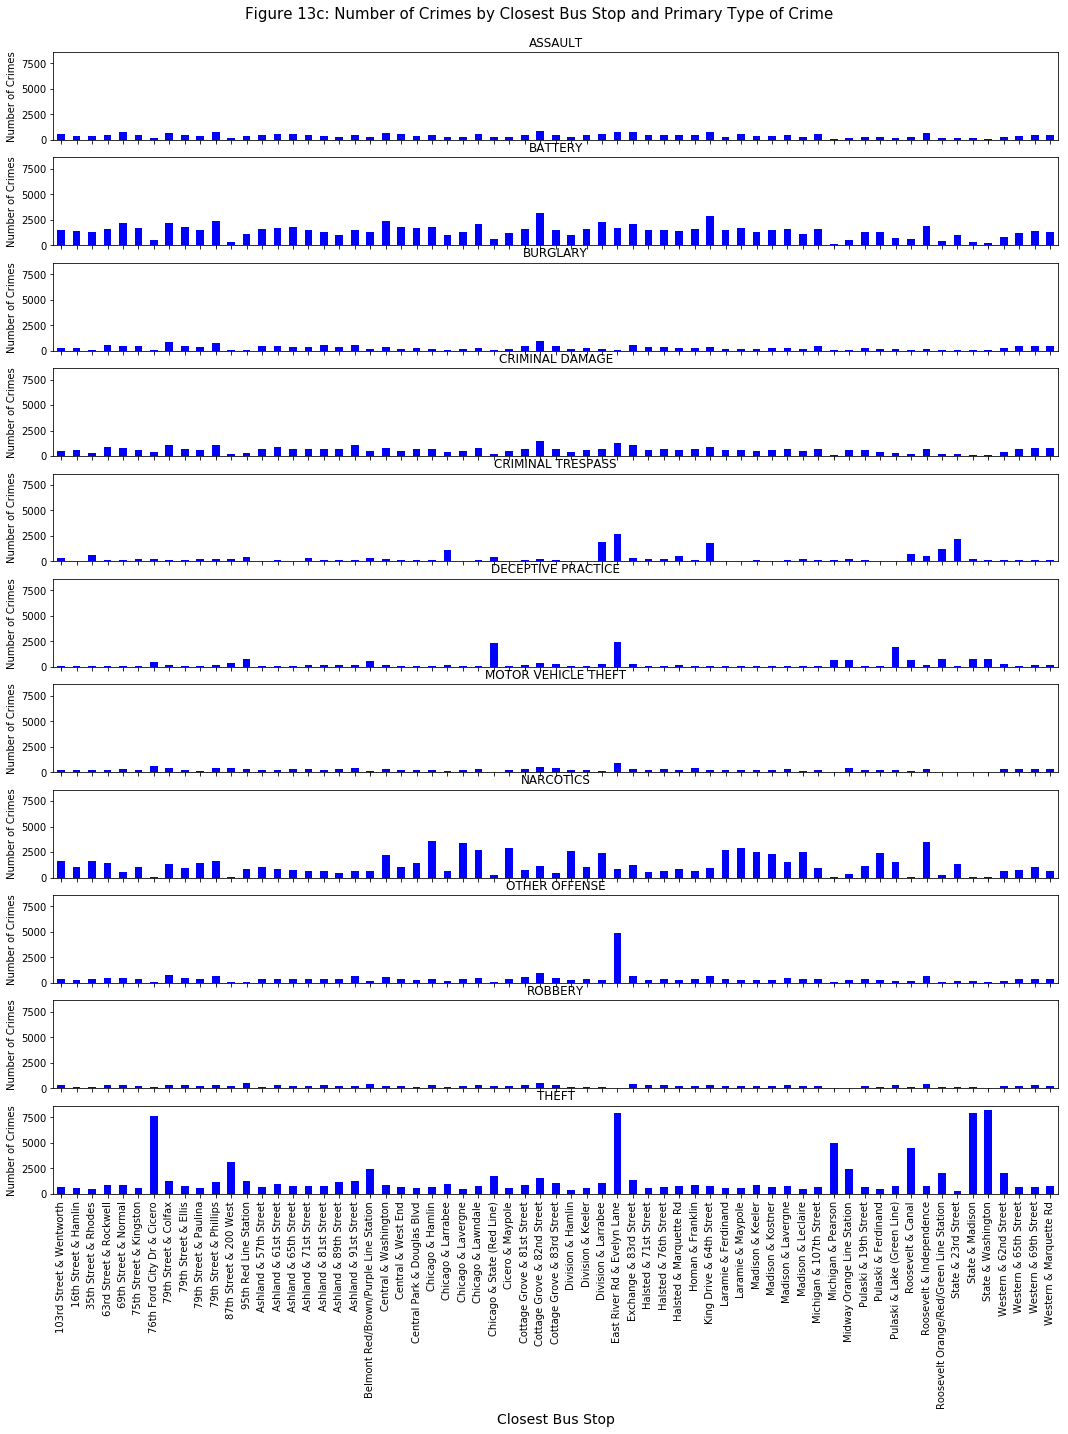

In [109]:
# Getting number of crimes based on the closest bus stop and converting to a dataframe
crime_df_busstop = crime_df.pivot_table(index = 'Closest Bus Stop', columns = 'Primary Type', values = 'Date', aggfunc = len)

num_stops = len(set(crime_df['Closest Bus Stop']))
print('Number of Unique Bus Stops: ', num_stops)

# Making a bar plot of the number of crimes based on the closest bus stop.  As there are many bus stops, looking at ones with over 5000 crimes
ax = crime_df_busstop[crime_df_busstop.sum(axis = 1) >= 5000].plot.bar(figsize = (18,21), subplots = True, color='blue', legend=False, sharey=True)
plt.suptitle('Figure 13c: Number of Crimes by Closest Bus Stop and Primary Type of Crime', y = 0.91, size = 15)
for x in range(11):
    ax[x].set_ylabel('Number of Crimes')
plt.xlabel('Closest Bus Stop', size=14)

## Distance from Closest Liquor Store

Figure 14a shows that all of the distributions for the distance from the closest liquor store have fat tails and that on average, each crime type occurs less than 0.5km from the closest liquor store.  In order to reduce the tails, the square root of the distance from the closest liquor store was taken and plotted in Figure 14b.  Taking the square root does help uncover slight variations in the distributions between the crime types, for example the concentration of crimes being slightly higher for certain crime types for the square root of distance between 0 and 0.25.  This value may therefore be slightly useful in predicting the type of crime. 

Looking at Figure 14c, it is possible that the closest liquor store could be somewhat useful to predict the type of crime. For example the business Bennett & Bennett, Special Wines has high counts for theft but not for any othe crime type. However, as there are 565 unique liquor stores, this would not be feasible.

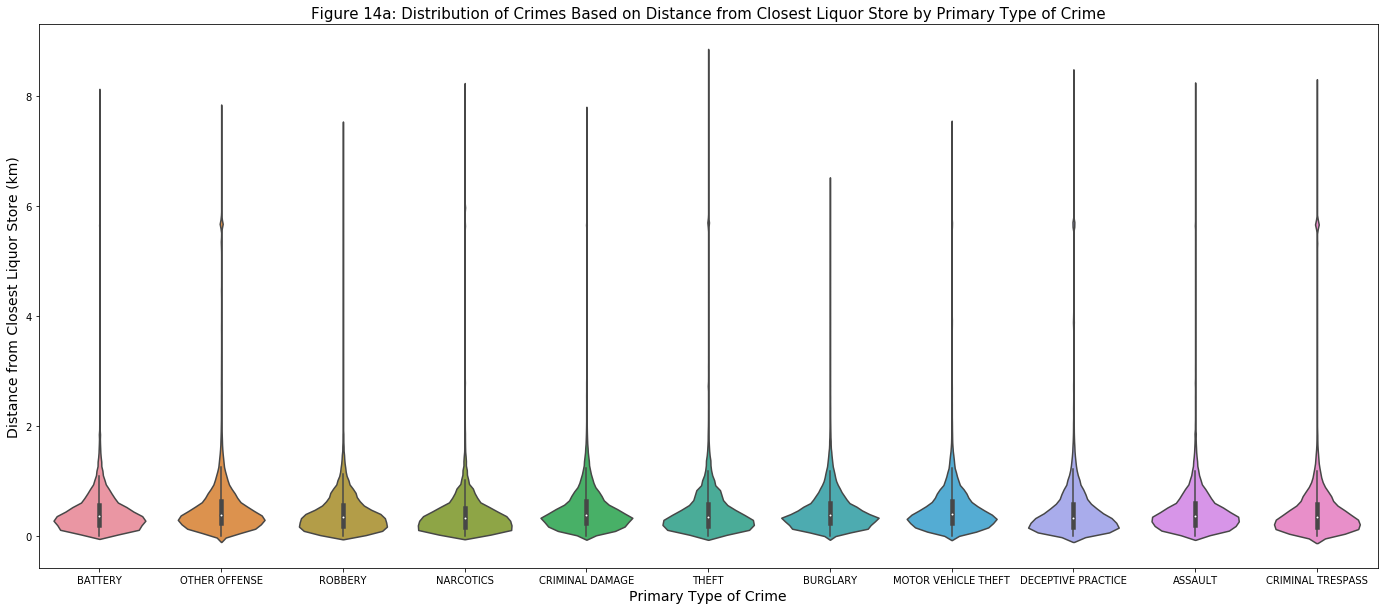

In [110]:
fig, ax = plt.subplots()
fig.set_size_inches(24, 10)
_ = sns.violinplot(x='Primary Type', y = 'Distance from Closest Liquor Store (km)', data=crime_df, ax=ax)
_ = plt.xlabel('Primary Type of Crime', size=14)
_ = plt.ylabel('Distance from Closest Liquor Store (km)', size=14)
_ = plt.title('Figure 14a: Distribution of Crimes Based on Distance from Closest Liquor Store by Primary Type of Crime', size=15)

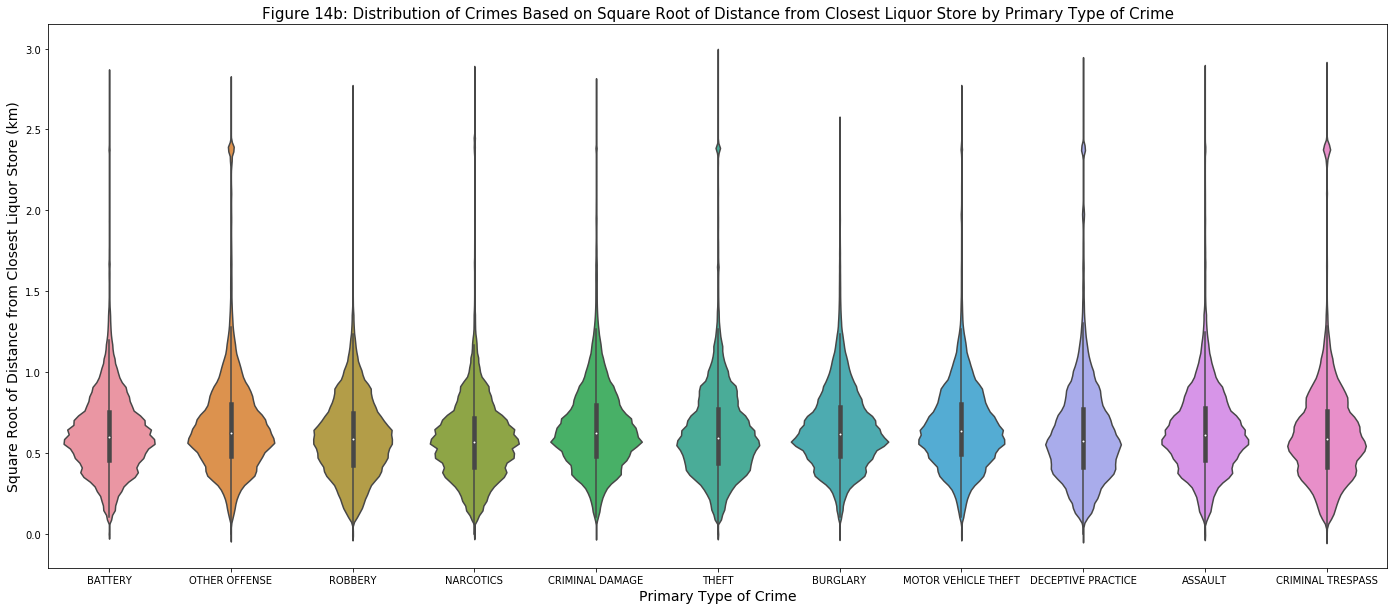

In [111]:
crime_df['Square Root of Distance from Closest Liquor Store (km)'] = np.sqrt(crime_df['Distance from Closest Liquor Store (km)'])

fig, ax = plt.subplots()
fig.set_size_inches(24, 10)
_ = sns.violinplot(x='Primary Type', y = 'Square Root of Distance from Closest Liquor Store (km)', data=crime_df, ax=ax)
_ = plt.xlabel('Primary Type of Crime', size=14)
_ = plt.ylabel('Square Root of Distance from Closest Liquor Store (km)', size=14)
_ = plt.title('Figure 14b: Distribution of Crimes Based on Square Root of Distance from Closest Liquor Store by Primary Type of Crime', size=15)

Number of Unique Liquor Stores:  565


Text(0.5,0,'Closest Liquor Store')

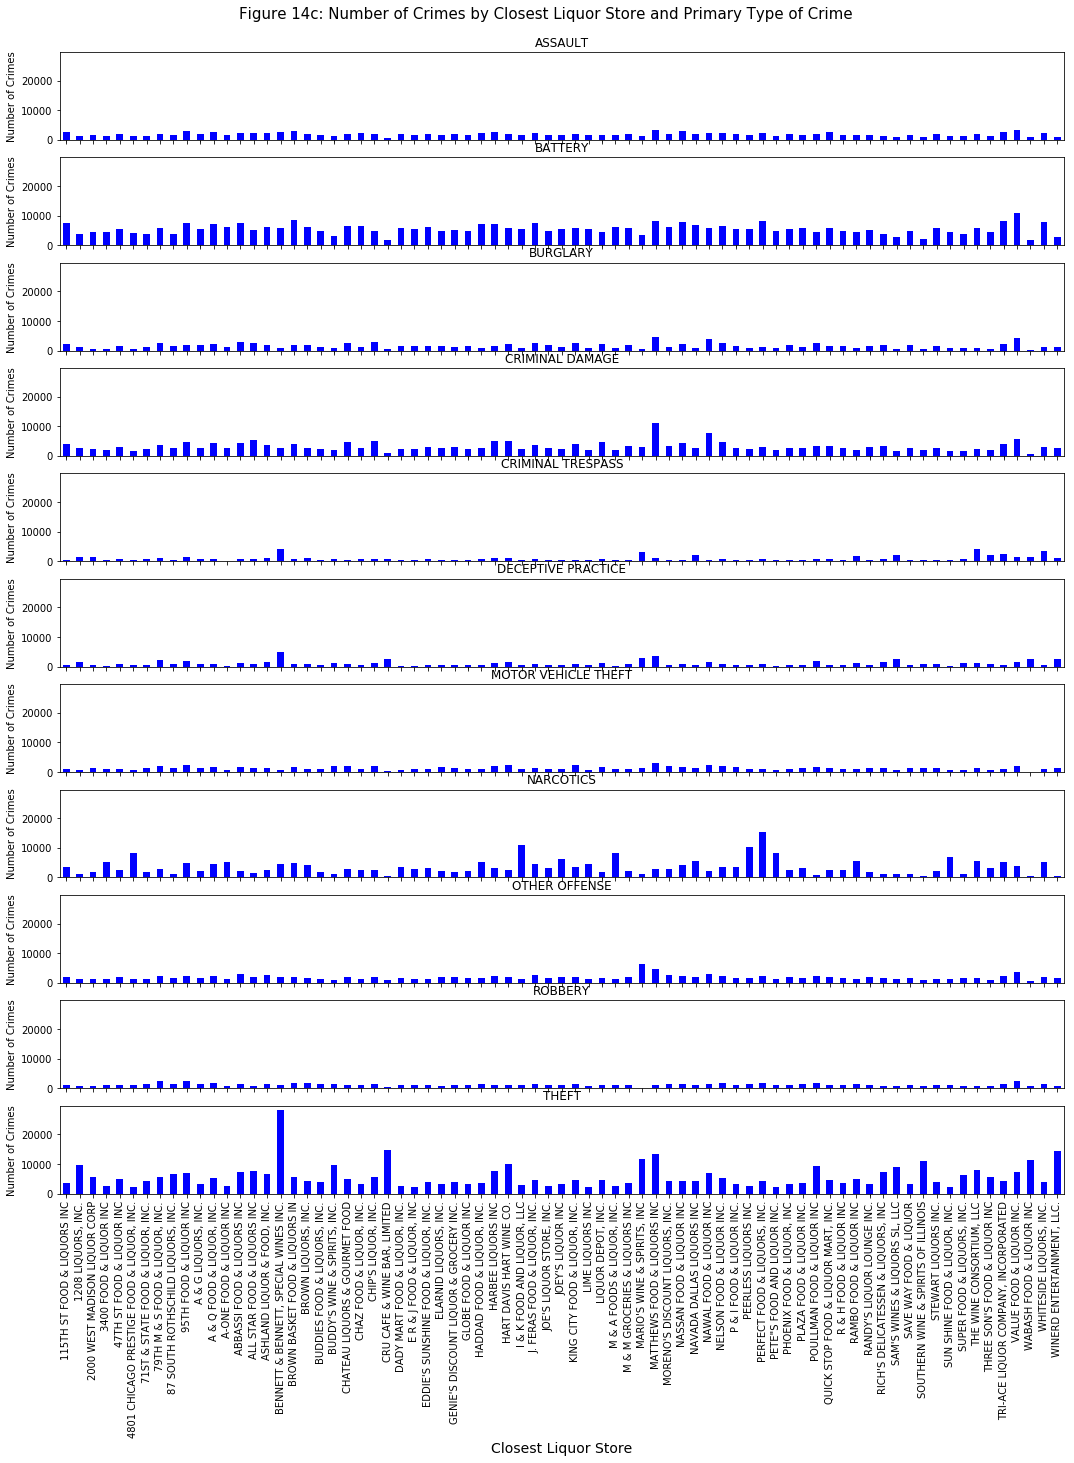

In [112]:
# Getting number of crimes based on the closest liquor store and converting to a dataframe
crime_df_liquor = crime_df.pivot_table(index = 'Closest Liquor Store', columns = 'Primary Type', values = 'Date', aggfunc = len)

num_stores = len(set(crime_df['Closest Liquor Store']))
print('Number of Unique Liquor Stores: ', num_stores)

# Making a bar plot of the number of crimes based on the closest liquor store.  Only plotting a sample of them. 
ax = crime_df_liquor[crime_df_liquor.sum(axis=1) >= 20000].plot.bar(figsize = (18,21), subplots = True, color='blue', legend=False, sharey=True)
plt.suptitle('Figure 14c: Number of Crimes by Closest Liquor Store and Primary Type of Crime', y = 0.91, size = 15)
for x in range(11):
    ax[x].set_ylabel('Number of Crimes')
plt.xlabel('Closest Liquor Store', size=14)

## Quarter of the Year

Figure 15 shows that during the third and fourth quarters of the year, there is a higher proportion of theft.  The proportion of battery reaches a max in the second quarter and then gradually decreases through the fourth quarter.  The proportion of narcotics is at a max during the first quarter, decreases during the second quarter and then remains stable through the end of the year.  

It is possible that the quarter of the year may have a relationship with the type of crime.  

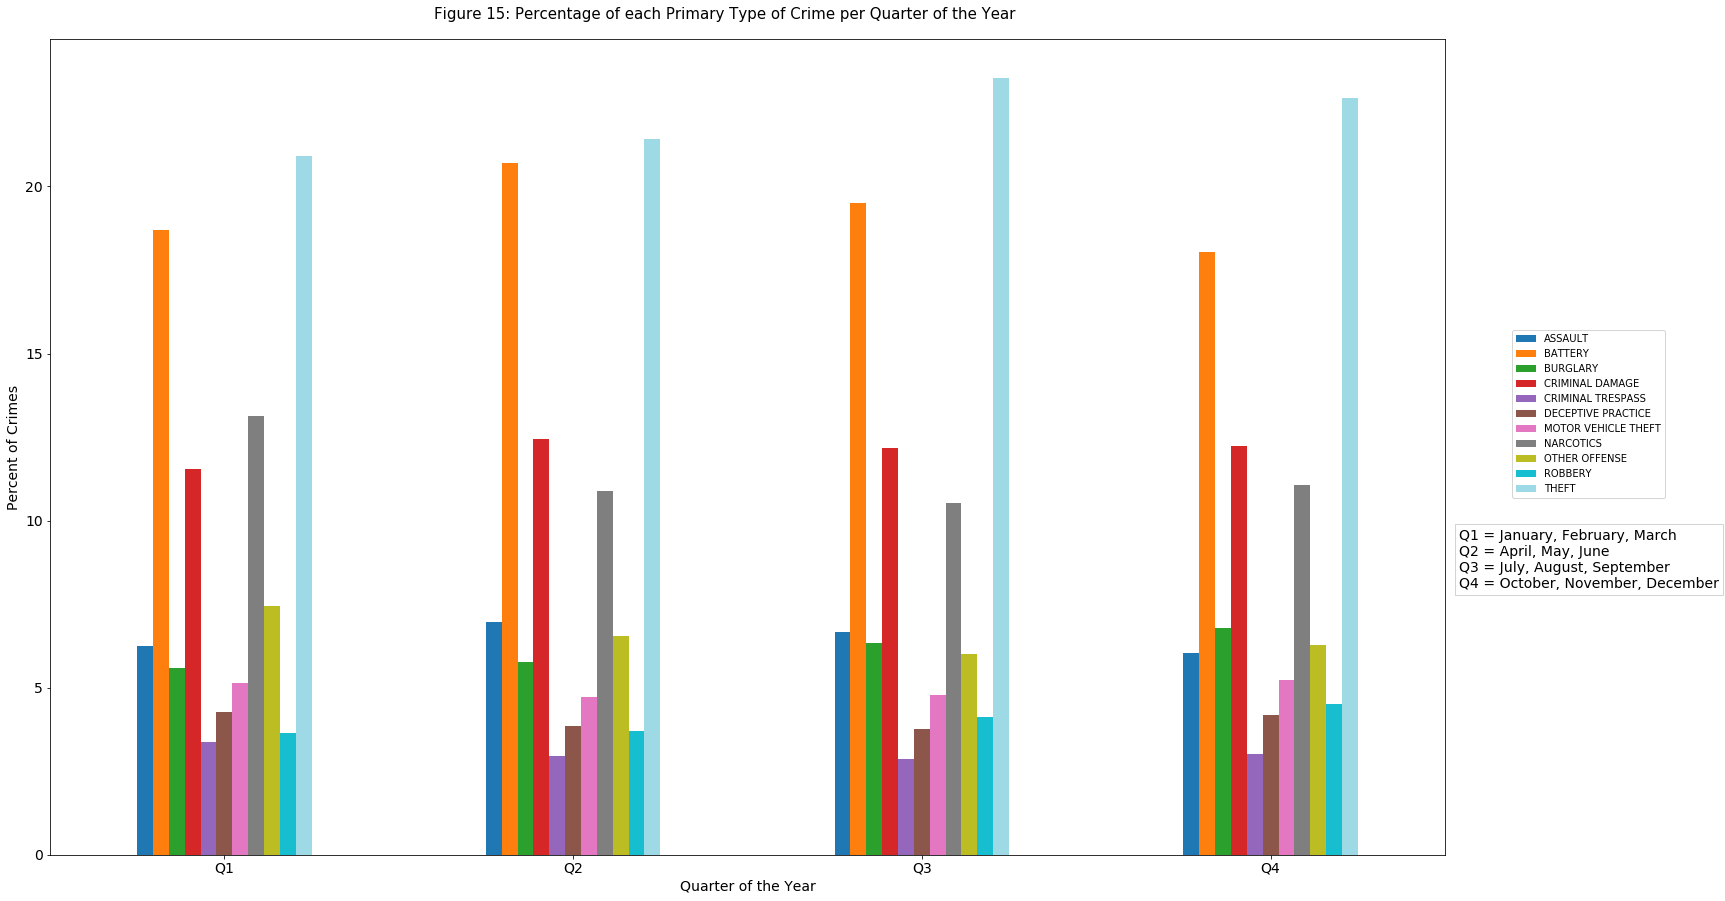

In [48]:
# Getting number of crimes per quarter and converting to a dataframe. Leaving out year 2018 as it is partial.  
crime_df_quarter = crime_df[crime_df['Year'] != 2018].pivot_table(index = 'Quarter of Year', columns = 'Primary Type', values = 'Date', aggfunc = len)

# Calculating the proportion of crimes per quarter of the year
crime_df_quarter['Totals'] = crime_df_quarter.sum(axis=1)
crime_df_quarter_prop = pd.DataFrame()
for r in crime_df_quarter.index: 
    for c in crime_df_quarter.columns:
        if c != 'Totals':
            crime_df_quarter_prop.loc[r, c] = crime_df_quarter.loc[r, c] * 100 / crime_df_quarter.loc[r, 'Totals']
            
# Making a bar plot of the proportion of crimes per quarter of the year
ax = crime_df_quarter_prop.plot.bar(figsize = (25,15), subplots=False, legend=True, colormap='tab20', stacked=False, rot=0)
_ = plt.suptitle('Figure 15: Percentage of each Primary Type of Crime per Quarter of the Year', y = 0.91, size = 15)
_ = plt.ylabel('Percent of Crimes', size=14)
_ = plt.xlabel('Quarter of the Year', size=14)
_ = ax.tick_params(axis='x', labelsize=14)
_ = ax.tick_params(axis='y', labelsize=14)

# Text Box
text = 'Q1 = January, February, March\nQ2 = April, May, June\nQ3 = July, August, September\nQ4 = October, November, December'
props = dict(boxstyle='square', facecolor='white', edgecolor='lightgrey')
ax.text(1.01, 0.4, text, transform=ax.transAxes, fontsize=14, verticalalignment='top', bbox=props)
plt.legend(bbox_to_anchor=(1.161, 0.65))
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
plt.xlabel('Quarter of the Year', size=14)
plt.ylabel('Percent of Crimes', size=14)

del crime_df_quarter['Totals']

## Season

Figure 16 shows a similar pattern as quarter of the year in Figure 15.  So there is not much of a difference between the relationship of the quarter of the year and season with the type of crime.  Therefore either the quarter or the season will be used to train my model.  

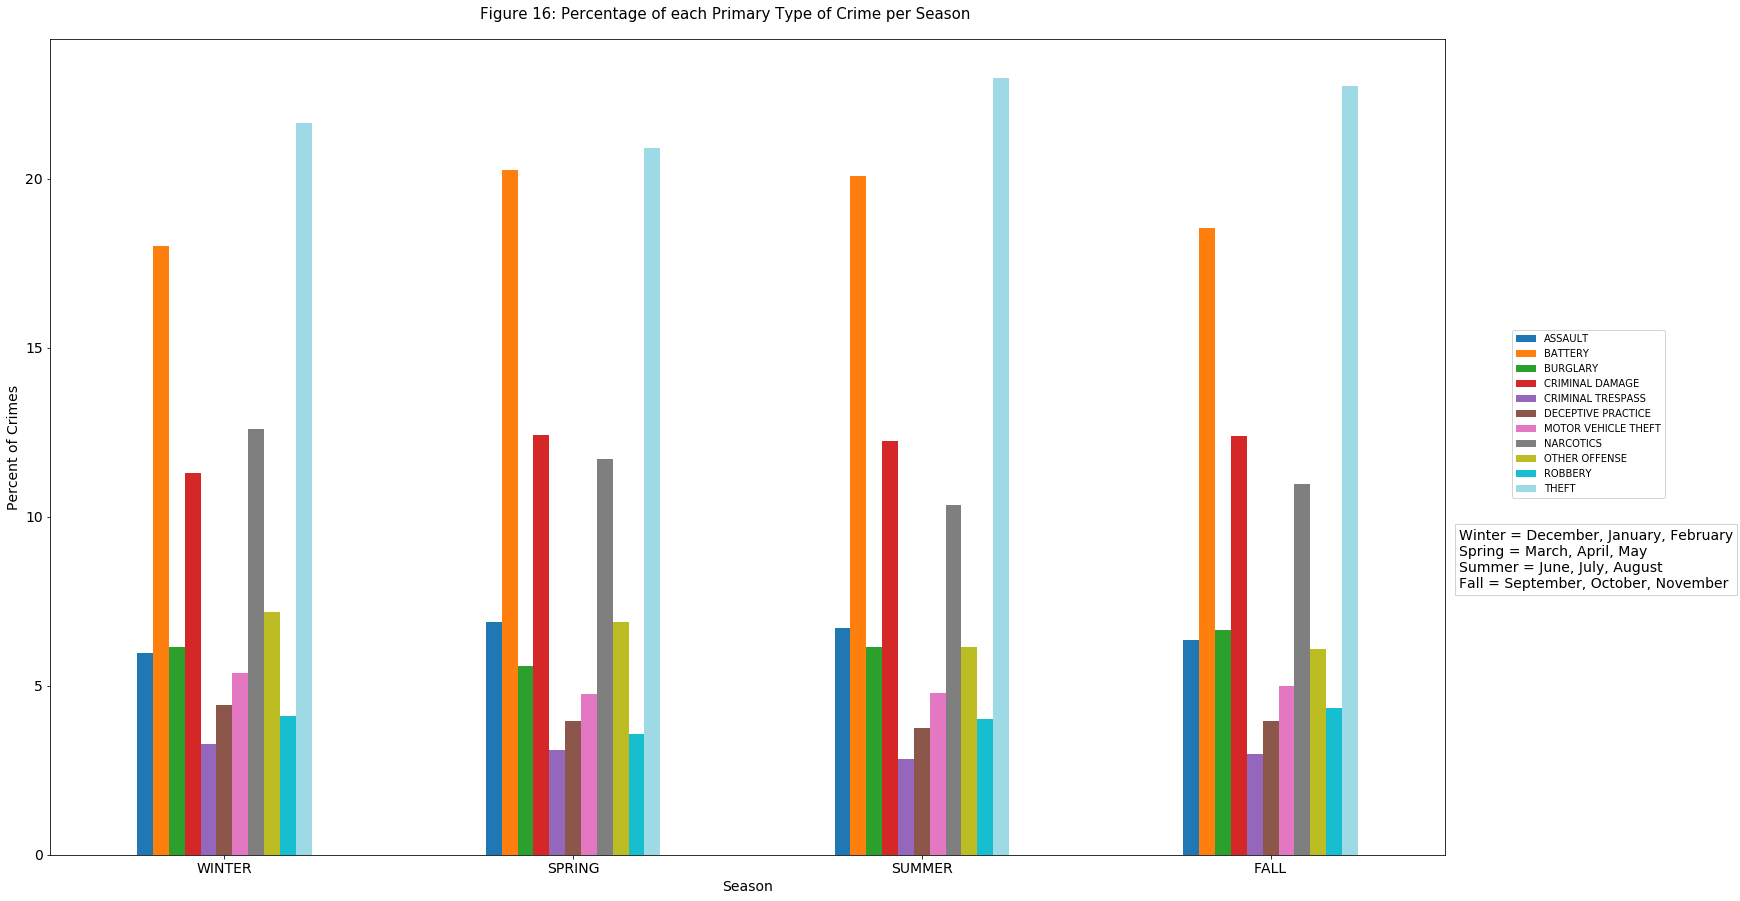

In [49]:
# Getting number of crimes per season and converting to a dataframe. Leaving out year 2018 as it is partial.  
crime_df_season = crime_df[crime_df['Year'] != 2018].pivot_table(index = 'Season', columns = 'Primary Type', values = 'Date', aggfunc = len)
crime_df_season = crime_df_season.reindex(['WINTER', 'SPRING', 'SUMMER', 'FALL'])

# Calculating the proportion of crimes per season
crime_df_season['Totals'] = crime_df_season.sum(axis=1)
crime_df_season_prop = pd.DataFrame()
for r in crime_df_season.index: 
    for c in crime_df_season.columns:
        if c != 'Totals':
            crime_df_season_prop.loc[r, c] = crime_df_season.loc[r, c] * 100 / crime_df_season.loc[r, 'Totals']
            
# Making a bar plot of the proportion of crimes per quarter of the year
ax = crime_df_season_prop.plot.bar(figsize = (25,15), subplots=False, legend=True, colormap='tab20', stacked=False, rot=0)
plt.suptitle('Figure 16: Percentage of each Primary Type of Crime per Season', y = 0.91, size = 15)
plt.ylabel('Percent of Crimes', size=14)
plt.xlabel('Season', size=14)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

# Text Box
text = 'Winter = December, January, February\nSpring = March, April, May\nSummer = June, July, August\nFall = September, October, November'
props = dict(boxstyle='square', facecolor='white', edgecolor='lightgrey')
ax.text(1.01, 0.4, text, transform=ax.transAxes, fontsize=14, verticalalignment='top', bbox=props)
plt.legend(bbox_to_anchor=(1.161, 0.65))
del crime_df_season['Totals']


## Month

Figure 17 shows that the proportion of theft decreases slightly from January to March adn then increases, reaching a max in August before gradually decreasing.  The proportion of battery increases from January, reaching a max in May/June before decreasing.  The proportion of narcotics reaches a max in February and then decreases into July.  

There does seem to be some relationship between month and the type of crime, so the month would be useful. 

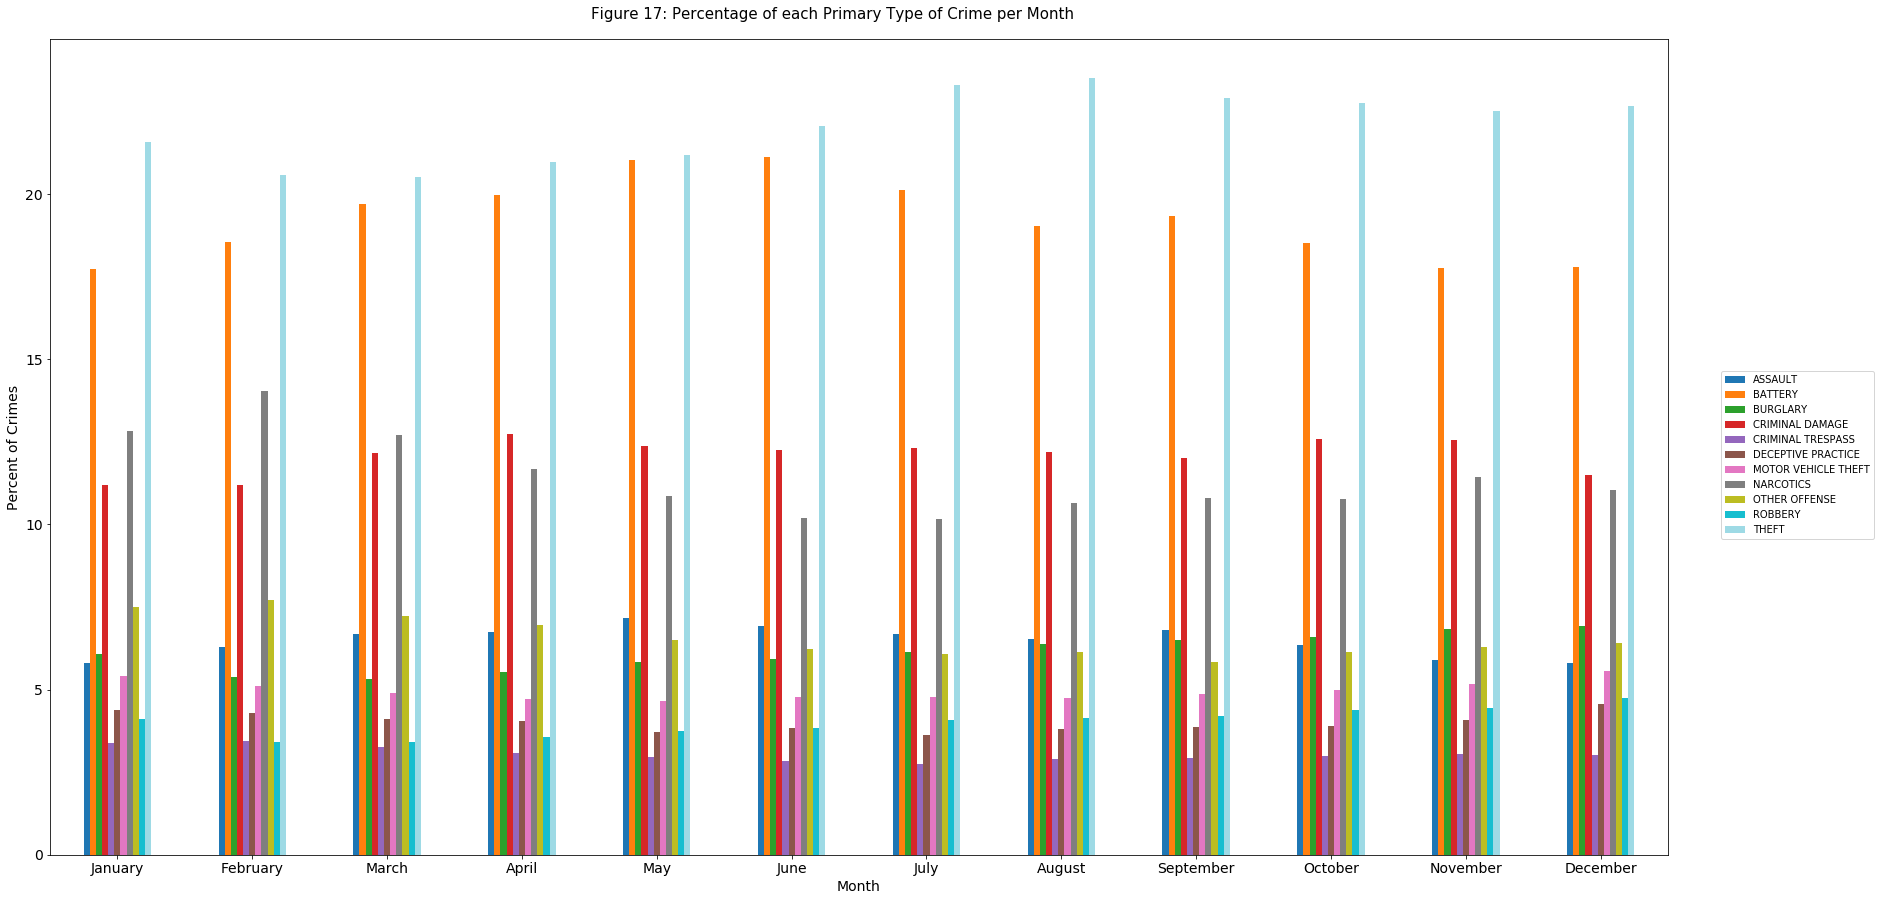

In [50]:
# Getting number of crimes per month and converting to a dataframe. Leaving out year 2018 as it is partial.  
crime_df_month = crime_df[crime_df['Year'] != 2018].pivot_table(index = 'Month', columns = 'Primary Type', values = 'Date', aggfunc = len)

# Calculating the proportion of crimes within each month
crime_df_month['Totals'] = crime_df_month.sum(axis=1)
crime_df_month_prop = pd.DataFrame()
for m in crime_df_month.index: 
    for c in crime_df_month.columns:
        if c != 'Totals':
            crime_df_month_prop.loc[m, c] = crime_df_month.loc[m, c] * 100 / crime_df_month.loc[m, 'Totals']
            
# Making a bar plot of the percent of crimes per month
ax = crime_df_month_prop.plot.bar(figsize = (29, 15), subplots = False, legend = True, cmap = 'tab20', rot=0)
plt.suptitle('Figure 17: Percentage of each Primary Type of Crime per Month', y = 0.91, size = 15)
plt.xticks(np.arange(0,12), ('January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'))
plt.ylabel('Percent of Crimes', size=14)
plt.xlabel('Month', size=14)
plt.legend(bbox_to_anchor=(1.13, 0.6))
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)

del crime_df_month['Totals']

## Type of Day

Figure 18a shows that there is a higher proportion of crimes involving battery and criminal damage on the weekend.  There is a slightly lower proportion of crimes involving theft and narcotics on the weekend.  Figure 18b shows that there is a higher proportion of crimes involving battery and a lower proportion of crimes involving narcotics on federal holidays

Information regarding whether the day is a weekday, weekend, or federal holiday would therefore be useful in predicting the type of crime.

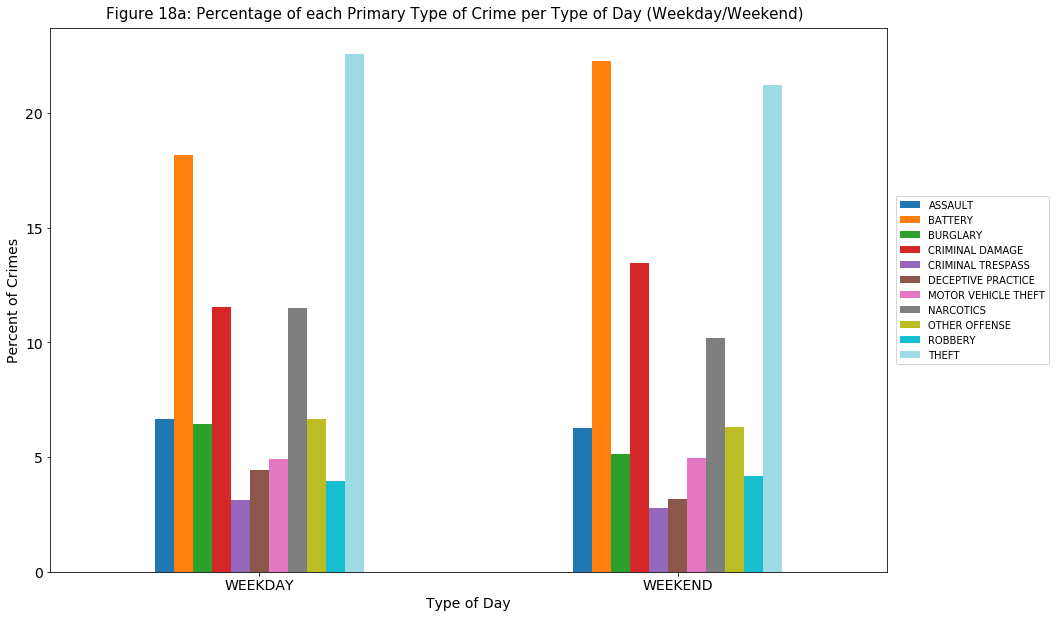

In [113]:
# Getting number of crimes per type of day and converting to a dataframe. 
crime_df_dt = crime_df.pivot_table(index = 'Day Type', columns = 'Primary Type', values = 'Date', aggfunc = len)


# Calculating the proportion of crimes within each type of day
crime_df_dt['Totals'] = crime_df_dt.sum(axis=1)
crime_df_dt_prop = pd.DataFrame()
for m in crime_df_dt.index: 
    for c in crime_df_dt.columns:
        if c != 'Totals':
            crime_df_dt_prop.loc[m, c] = crime_df_dt.loc[m, c] * 100 / crime_df_dt.loc[m, 'Totals']
            
# Making a bar plot of the percent of crimes per month
ax = crime_df_dt_prop.plot.bar(figsize = (15, 10), subplots = False, legend = True, cmap = 'tab20', rot=0)
plt.suptitle('Figure 18a: Percentage of each Primary Type of Crime per Type of Day (Weekday/Weekend)', y = 0.91, size = 15)
#plt.xticks(np.arange(0,2), ('Weekday', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'))
plt.ylabel('Percent of Crimes', size=14)
plt.xlabel('Type of Day', size=14)
plt.legend(bbox_to_anchor=(1.2, 0.7))
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)

del crime_df_dt['Totals']

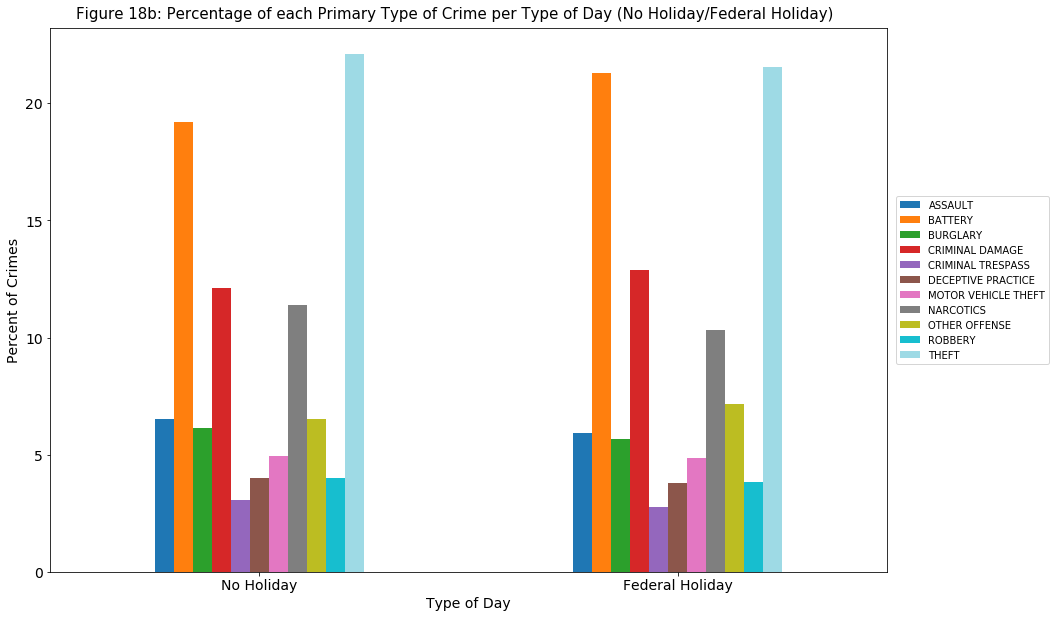

In [52]:
# Getting number of crimes per holiday/non holiday and converting to a dataframe. Leaving out year 2018 as it is partial.  
crime_df_isholiday = crime_df[crime_df['Year'] != 2018].pivot_table(index = 'Is Holiday', columns = 'Primary Type', values = 'Date', aggfunc = len)
crime_df_isholiday.index = ['No Holiday', 'Federal Holiday']

# Calculating the proportion of crimes within each type of day
crime_df_isholiday['Totals'] = crime_df_isholiday.sum(axis=1)
crime_df_isholiday_prop = pd.DataFrame()
for m in crime_df_isholiday.index: 
    for c in crime_df_isholiday.columns:
        if c != 'Totals':
            crime_df_isholiday_prop.loc[m, c] = crime_df_isholiday.loc[m, c] * 100 / crime_df_isholiday.loc[m, 'Totals']
            
# Making a bar plot of the percent of crimes per month
ax = crime_df_isholiday_prop.plot.bar(figsize = (15, 10), subplots = False, legend = True, cmap = 'tab20', rot=0)
plt.suptitle('Figure 18b: Percentage of each Primary Type of Crime per Type of Day (No Holiday/Federal Holiday)', y = 0.91, size = 15)
plt.ylabel('Percent of Crimes', size=14)
plt.xlabel('Type of Day', size=14)
plt.legend(bbox_to_anchor=(1.2, 0.7))
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)

del crime_df_isholiday['Totals']

## Day of the Week

Looking at the proportions of crime for each day in Figure 19, Saturday and Sunday have the highest proportions of crimes involving battery and criminal damage. Sunday has the lowest proportion of crimes involving theft and narcotics.  

It appears that the day of the week has some relationship with the type of crime, so this variable would be useful. 

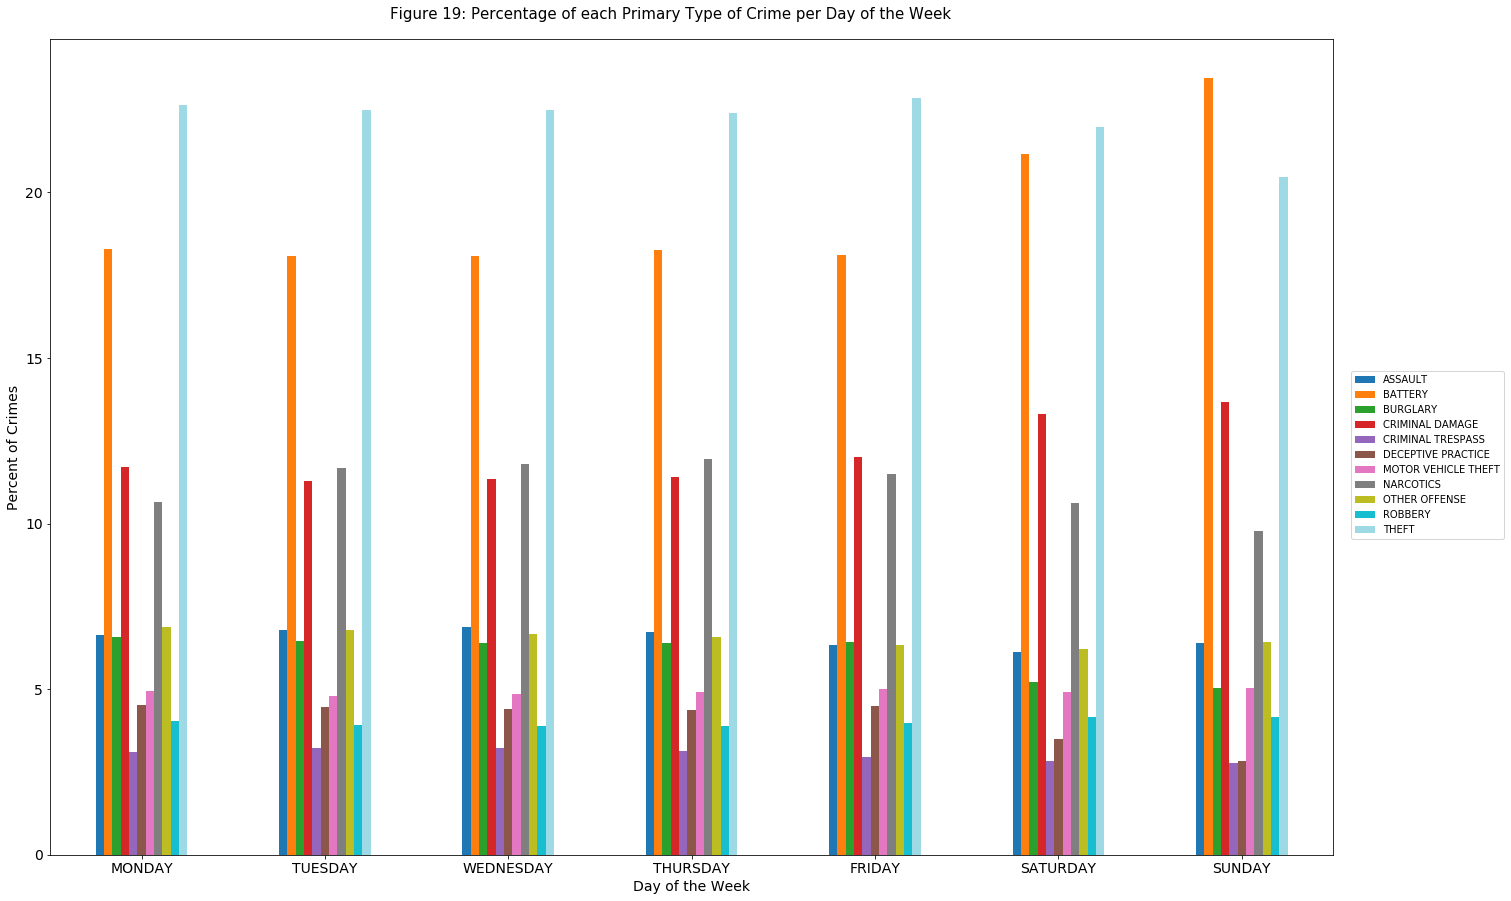

In [53]:
# Getting number of crimes per day of the week and converting to a dataframe. 
crime_df_dow = crime_df.pivot_table(index = 'Day of the Week', columns = 'Primary Type', values = 'Date', aggfunc = len)
crime_df_dow = crime_df_dow.reindex(['MONDAY', 'TUESDAY', 'WEDNESDAY', 'THURSDAY', 'FRIDAY', 'SATURDAY', 'SUNDAY'])

# Calculating the proportion of crimes for each day
crime_df_dow['Totals'] = crime_df_dow.sum(axis=1)
crime_df_dow_prop = pd.DataFrame()
for r in crime_df_dow.index: 
    for c in crime_df_dow.columns:
        if c != 'Totals':
            crime_df_dow_prop.loc[r, c] = crime_df_dow.loc[r, c] * 100 / crime_df_dow.loc[r, 'Totals']
            
# Making a bar plot of the proportion of crimes per each day of the week
ax = crime_df_dow_prop.plot.bar(figsize = (23, 15), subplots = False, legend = True, cmap = 'tab20', rot=0)
plt.suptitle('Figure 19: Percentage of each Primary Type of Crime per Day of the Week', y = 0.91, size = 15)
plt.ylabel('Percent of Crimes', size=14)
plt.xlabel('Day of the Week', size=14)
plt.legend(bbox_to_anchor=(1.01, 0.6))
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)

del crime_df_dow['Totals']

## Federal Holidays

Figure 20 shows that Christmas and Independence Day have the highest proportions of crimes involving battery while Martin Luther King Jr. Day, Veterens Day, and Washington's Birthday have the lowest proportions.  New Year's Day has the highest proportion of crimes involving theft while Christmas has the lowest proportion. Washington's Birthday has the highest proportion of crimes involving narcotics while New Year's Day and Thanksgiving have the lowest proportions.  There seems to be some relationship between the type of holiday and the type of crime so this variable would be useful. 

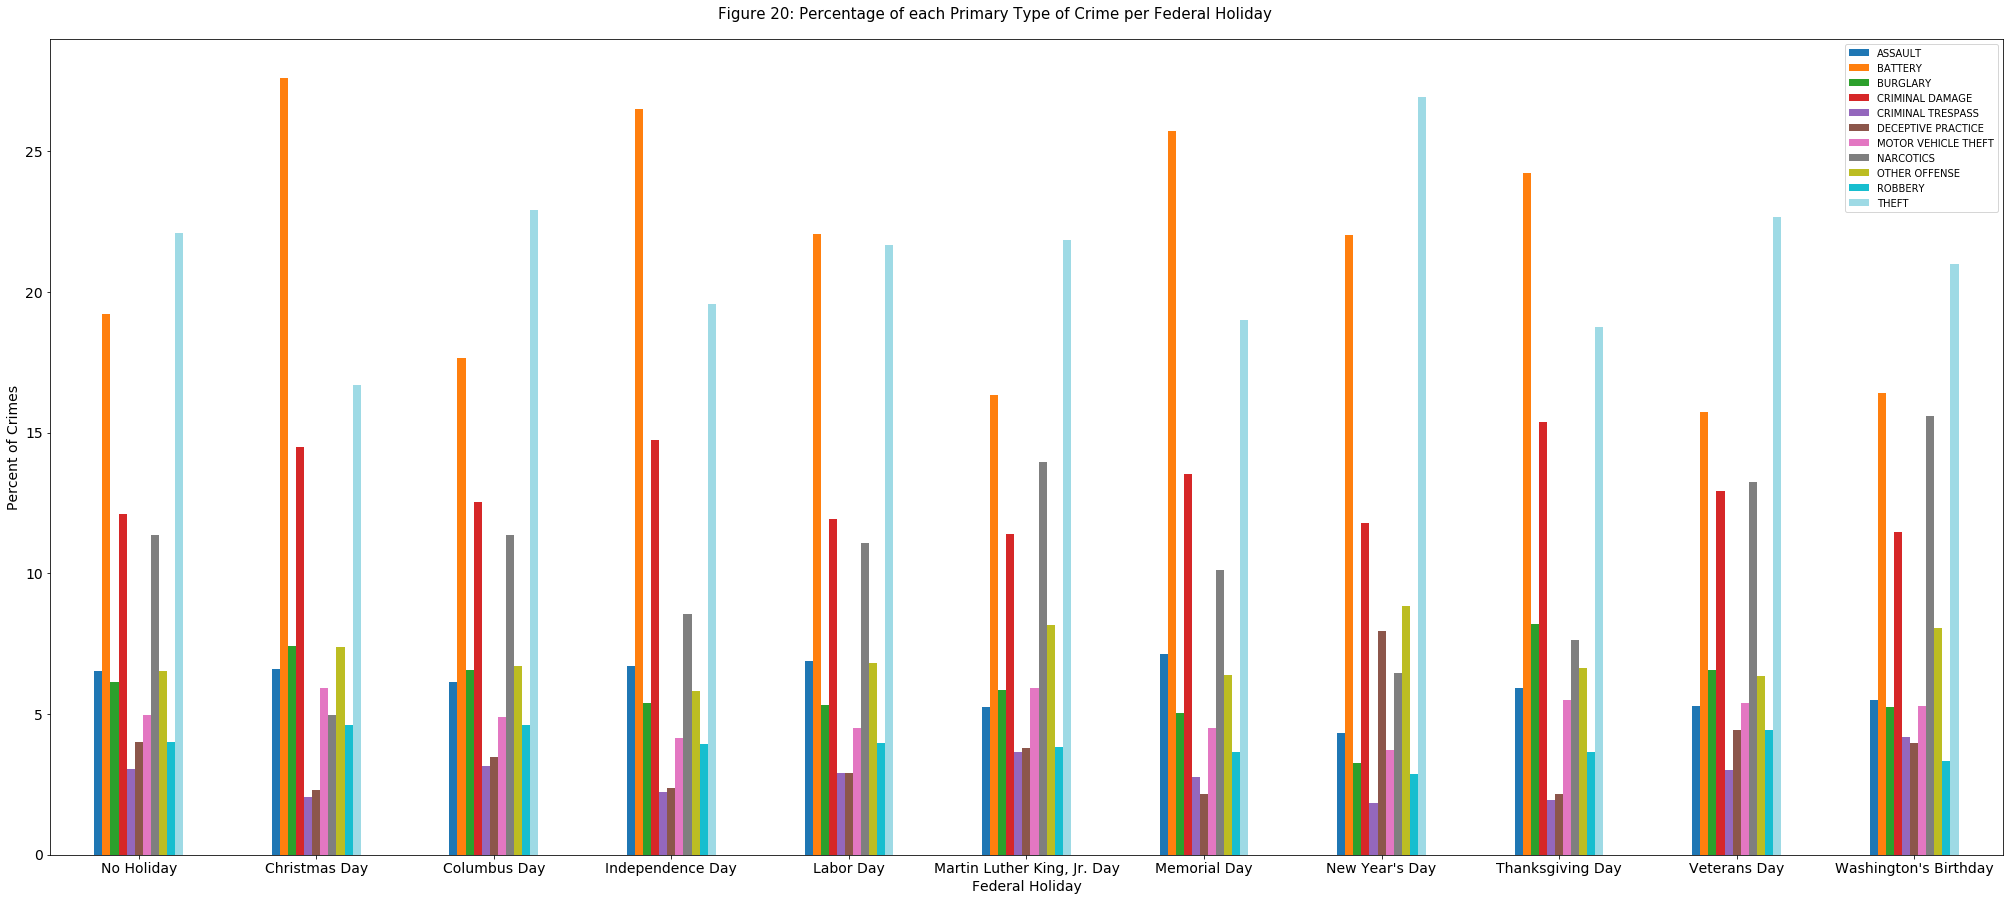

In [54]:
# Getting number of crimes per holiday and converting to a dataframe. Leaving out year 2018 as it is partial.  
crime_df_holiday = crime_df[crime_df['Year'] != 2018].pivot_table(index = 'Holiday', columns = 'Primary Type', values = 'Date', aggfunc = len)
crime_df_holiday = crime_df_holiday.reindex(['No Holiday', 'Christmas Day', 'Columbus Day', 'Independence Day', 'Labor Day',
       'Martin Luther King, Jr. Day', 'Memorial Day', 'New Year\'s Day', 'Thanksgiving Day', 'Veterans Day',
       'Washington\'s Birthday'])

# Calculating the proportion of crimes for each holiday
crime_df_holiday['Totals'] = crime_df_holiday.sum(axis=1)
crime_df_holiday_prop = pd.DataFrame()
for r in crime_df_holiday.index: 
    for c in crime_df_holiday.columns:
        if c != 'Totals':
            crime_df_holiday_prop.loc[r, c] = crime_df_holiday.loc[r, c] * 100 / crime_df_holiday.loc[r, 'Totals']

# Making a bar plot of the proportion of crimes per holiday
ax = crime_df_holiday_prop.plot.bar(figsize = (35,15), subplots = False, legend = True, colormap = 'tab20', stacked=False, rot=0)
plt.suptitle('Figure 20: Percentage of each Primary Type of Crime per Federal Holiday', y = 0.91, size = 15)
plt.ylabel('Percent of Crimes', size=14)
plt.xlabel('Federal Holiday', size=14)
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)

## Day of the Month

Figure 21 shows the proportion of each crime for each third of the month.  There are no significant differences.  Additionally, looking at the proportion of crime for each day of the month individually, the day with the most noticeable difference, is the first day of the month where there is a higher proportion of theft.  The day of the month and quarter of the month would not make good predictors for the type of crime. 

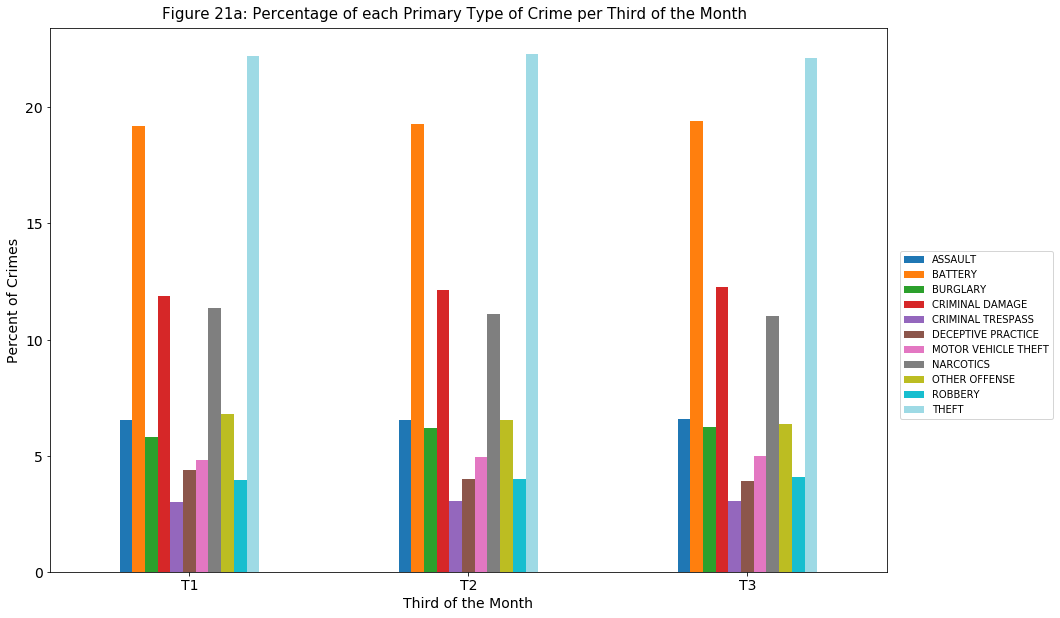

In [56]:
# Getting number of crimes per third of month and converting to a dataframe. 
crime_df_third = crime_df.pivot_table(index = 'Third of Month', columns = 'Primary Type', values = 'Date', aggfunc = len)

# Calculating the proportion of crimes for each third of the month
crime_df_third['Totals'] = crime_df_third.sum(axis=1)
crime_df_third_prop = pd.DataFrame()
for r in crime_df_third.index: 
    for c in crime_df_third.columns:
        if c != 'Totals':
            crime_df_third_prop.loc[r, c] = crime_df_third.loc[r, c] * 100 / crime_df_third.loc[r, 'Totals']
            
# Making a bar plot of the proportion of crimes per each day of the week
ax = crime_df_third_prop.plot.bar(figsize = (15, 10), subplots = False, legend = True, cmap = 'tab20', rot=0, stacked=False)
plt.suptitle('Figure 21a: Percentage of each Primary Type of Crime per Third of the Month', y = 0.91, size = 15)
plt.ylabel('Percent of Crimes', size=14)
plt.xlabel('Third of the Month', size=14)
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)
plt.legend(bbox_to_anchor=(1.01, 0.6))

del crime_df_third['Totals']

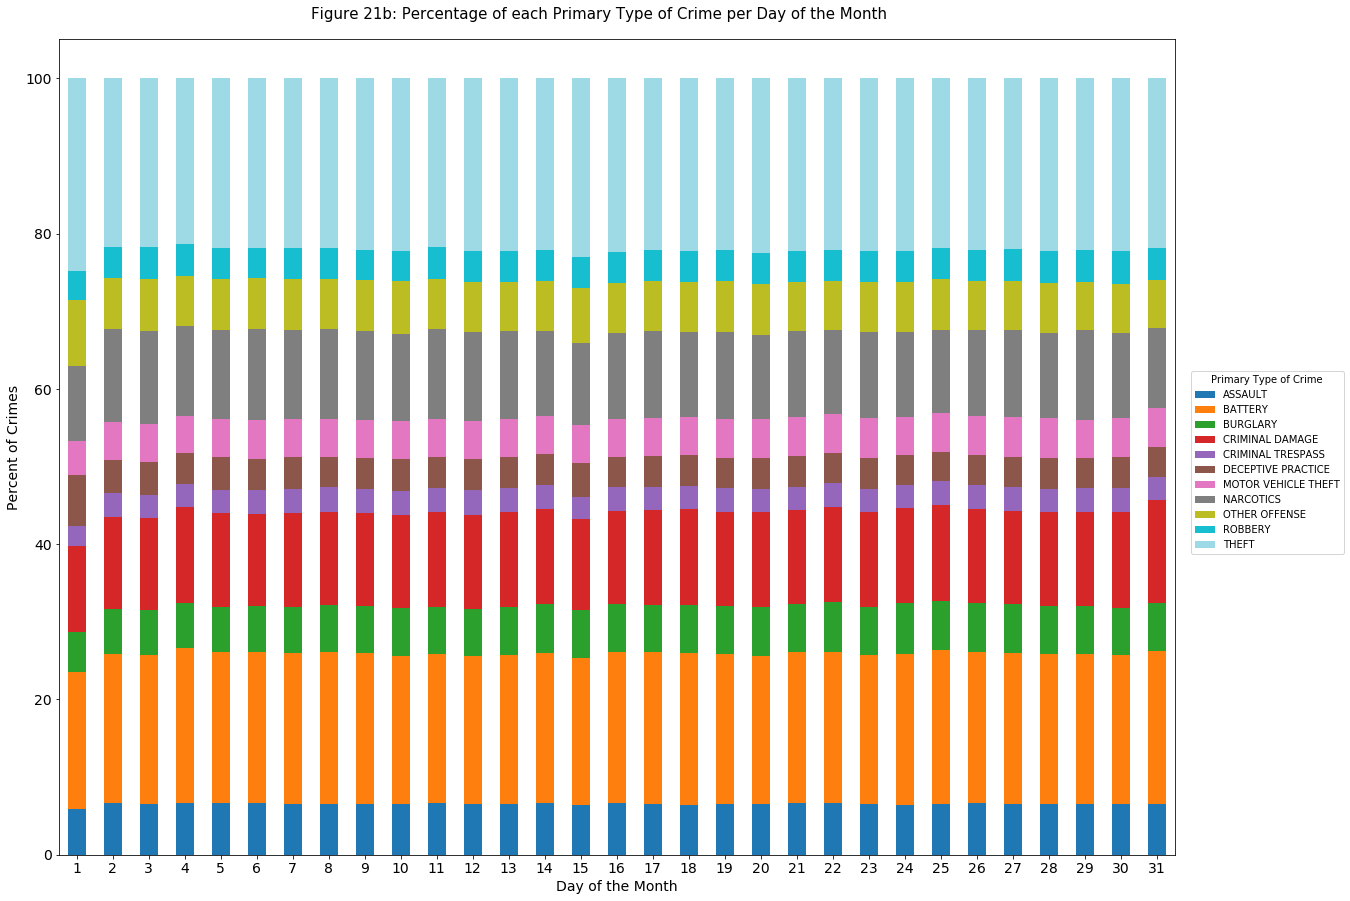

In [57]:
# Getting number of crimes per day of the month and converting to a dataframe. 
crime_df_dom = crime_df.pivot_table(index = 'Day', columns = 'Primary Type', values = 'Date', aggfunc = len)

# Calculating the proportion of crimes for each day
crime_df_dom['Totals'] = crime_df_dom.sum(axis=1)
crime_df_dom_prop = pd.DataFrame()
for r in crime_df_dom.index: 
    for c in crime_df_dom.columns:
        if c != 'Totals':
            crime_df_dom_prop.loc[r, c] = crime_df_dom.loc[r, c] * 100 / crime_df_dom.loc[r, 'Totals']
            
# Making a bar plot of the proportion of crimes per each day of the week
ax = crime_df_dom_prop.plot.bar(figsize = (20, 15), subplots = False, legend = True, cmap = 'tab20', rot=0, stacked=True)
plt.suptitle('Figure 21b: Percentage of each Primary Type of Crime per Day of the Month', y = 0.91, size = 15)
plt.legend(title='Primary Type of Crime', bbox_to_anchor=(1.01, 0.6))
plt.ylabel('Percent of Crimes', size=14)
plt.xlabel('Day of the Month', size=14)
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)

del crime_df_dom['Totals']

## Time of Day

Figure 22a shows the proportion of crimes involving theft is high in the morning and reaches a maximum during the afternoon and then drops off during the evening and overnight.  The proportion of crimes involving battery is the least during the morning and then increases throughout the day, reaching a maximum overnight.  The proportion of crimes involving narcotics is at a minimum overnight and then increases, reaching a maximum during the evening.  The proportion of crimes involving criminal damage is at a minimum during the afternoon and reaches a maximum overnight. 

Per Figure 22b, a few types of crime that have significant variation during the day are battery, narcotics, and theft.  These crimes are studied further for each hour in Figure 22c.  The proportion of crimes involving battery is at a maximum at 2/3am.  The proportion of crimes involving theft are somewhat steady from 7am-6pm and then drop off, reaching a minimum at 1-4am.  The proportion of crimes involving narcotics are the highest at 7-9pm.  

It appears that the time of day/hour may help in the prediction of the type of crime.

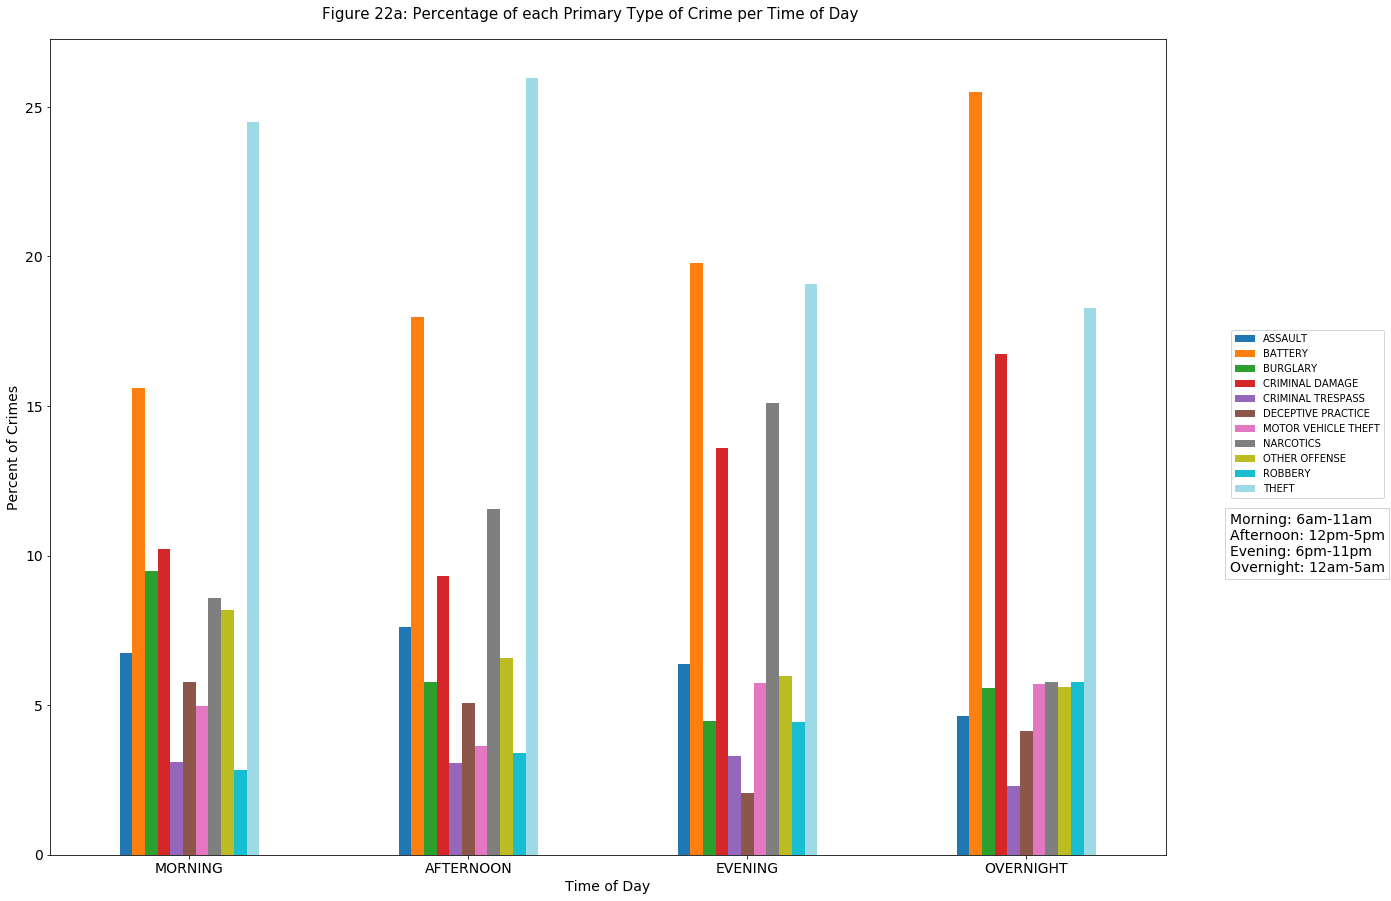

In [58]:
# Getting number of crimes per time of day and converting to a dataframe. 
crime_df_tod = crime_df.pivot_table(index = 'Time of Day', columns = 'Primary Type', values = 'Date', aggfunc = len)
crime_df_tod = crime_df_tod.reindex(['MORNING', 'AFTERNOON', 'EVENING', 'OVERNIGHT'])

# Calculating the proportion of crimes per time of day
crime_df_tod['Totals'] = crime_df_tod.sum(axis=1)
crime_df_tod_prop = pd.DataFrame()
for r in crime_df_tod.index: 
    for c in crime_df_tod.columns:
        if c != 'Totals':
            crime_df_tod_prop.loc[r, c] = crime_df_tod.loc[r, c] * 100 / crime_df_tod.loc[r, 'Totals']
            
# Making a bar plot of the proportion of crimes per hour
ax = crime_df_tod_prop.plot.bar(figsize = (20, 15), subplots = False, legend = True, cmap = 'tab20', rot=0, stacked=False)
plt.suptitle('Figure 22a: Percentage of each Primary Type of Crime per Time of Day', y = 0.91, size = 15)
plt.xlabel('Time of Day', size=14)
plt.ylabel('Percent of Crimes', size=14)
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)

del crime_df_tod['Totals']

# Text Box
text = 'Morning: 6am-11am\nAfternoon: 12pm-5pm\nEvening: 6pm-11pm\nOvernight: 12am-5am'
props = dict(boxstyle='square', facecolor='white', edgecolor='lightgrey')
ax.text(1.057, 0.42, text, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
plt.legend(bbox_to_anchor=(1.2, 0.65))

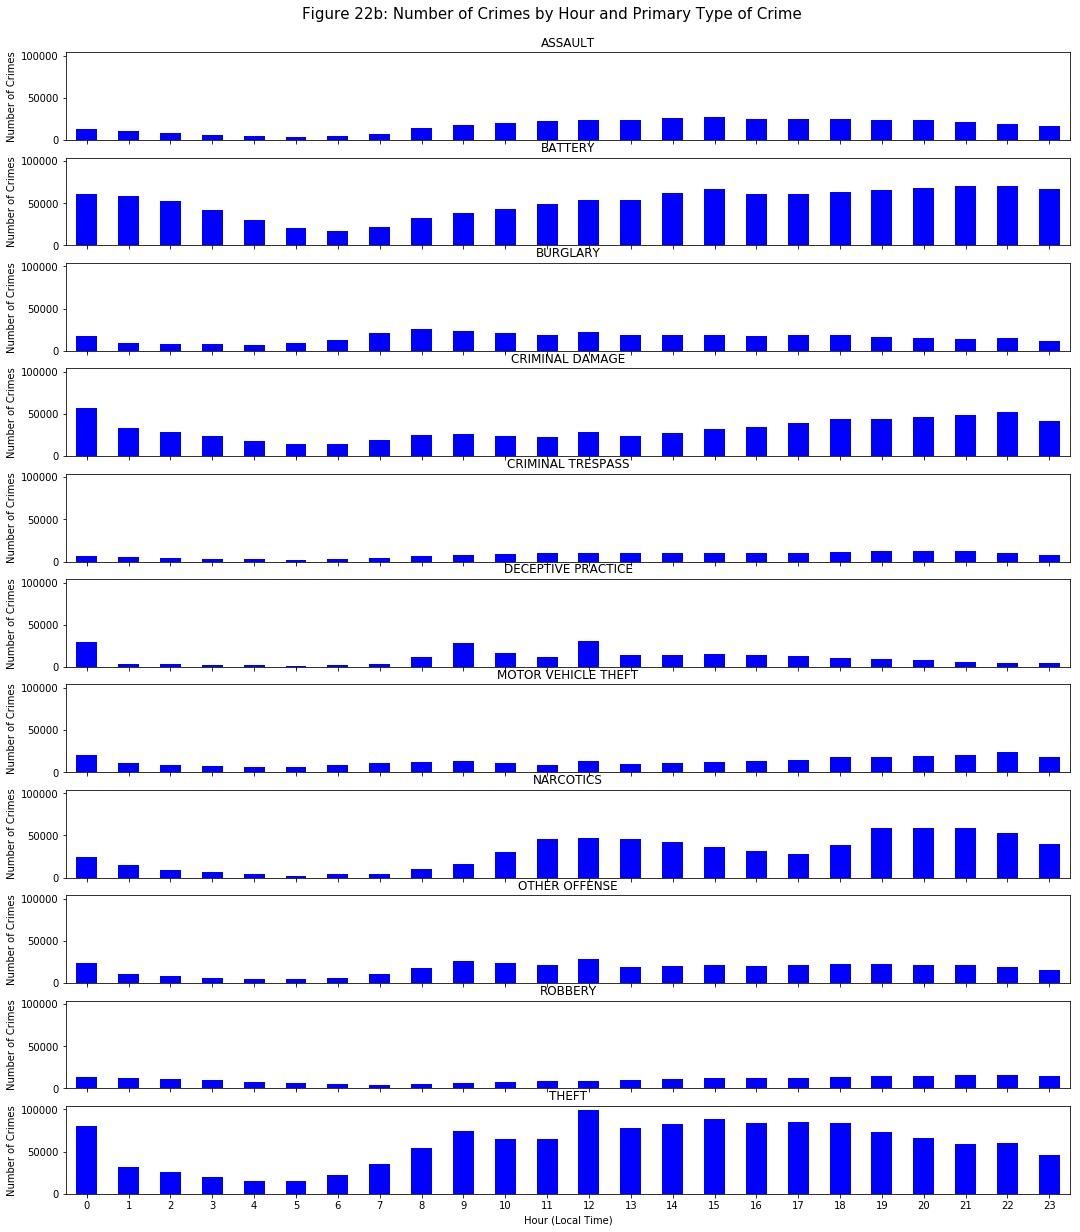

In [59]:
# Getting number of crimes per hour of day and converting to a dataframe. 
crime_df_hour = crime_df.pivot_table(index = 'Hour', columns = 'Primary Type', values = 'Date', aggfunc = len)
            
# Making a bar plot 
ax = crime_df_hour.plot.bar(figsize = (18, 21), subplots = True, legend = False, color='blue', rot=0, stacked=False, sharey=True)
plt.suptitle('Figure 22b: Number of Crimes by Hour and Primary Type of Crime', y = 0.91, size = 15)
plt.xlabel('Hour (Local Time)')
for x in range(11):
    ax[x].set_ylabel('Number of Crimes')

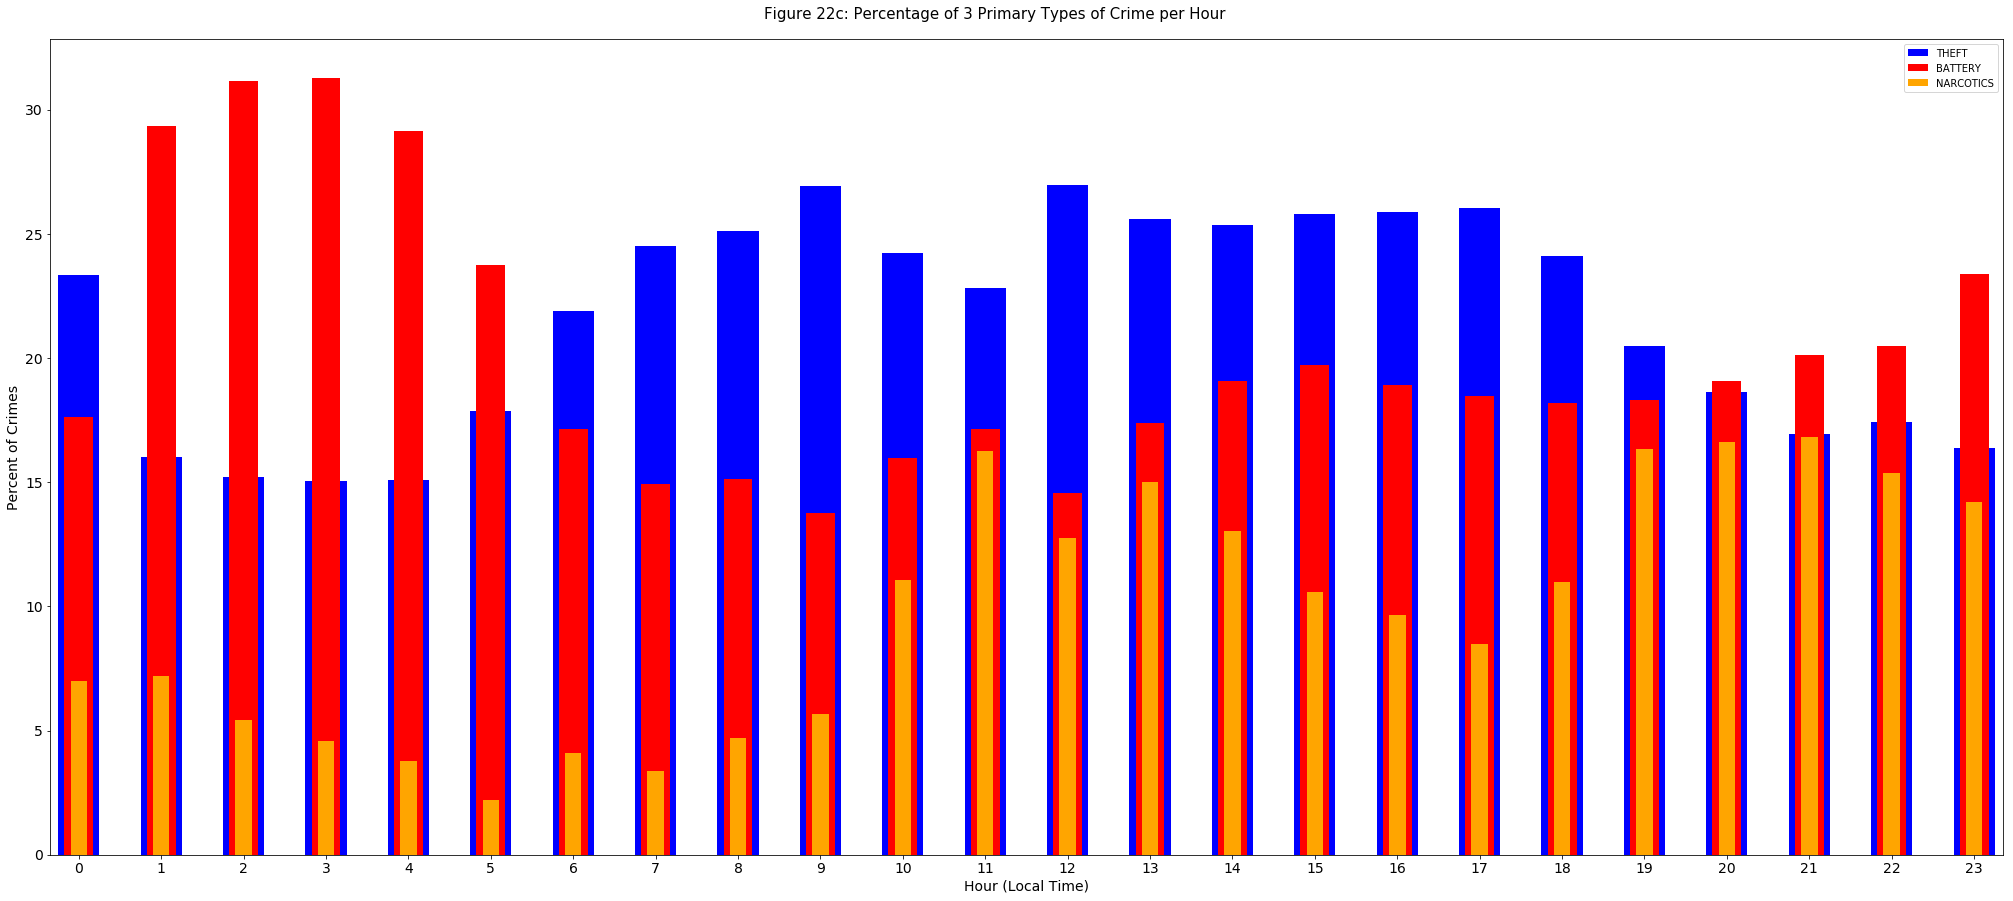

In [60]:
# Calculating the proportion of crimes per hour
crime_df_hour['Totals'] = crime_df_hour.sum(axis=1)
crime_df_hour_prop = pd.DataFrame()
for r in crime_df_hour.index: 
    for c in crime_df_hour.columns:
        if c != 'Totals':
            crime_df_hour_prop.loc[r, c] = crime_df_hour.loc[r, c] * 100 / crime_df_hour.loc[r, 'Totals']
            
# Making a bar plot of the proportion of crimes per hour
#ax = crime_df_hour_prop.plot.bar(figsize = (35, 15), subplots = False, legend = True, cmap = 'tab20', rot=0, stacked=False)
ax = crime_df_hour_prop['THEFT'].plot.bar(figsize = (35,15), subplots = False, legend = True, color = 'blue', width=0.5, rot=0)
ax = crime_df_hour_prop['BATTERY'].plot.bar(figsize = (35,15), subplots = False, legend = True, color = 'red', width=0.35, rot=0)
ax = crime_df_hour_prop['NARCOTICS'].plot.bar(figsize = (35,15), subplots = False, legend = True, color = 'orange', width=0.2, rot=0)
plt.suptitle('Figure 22c: Percentage of 3 Primary Types of Crime per Hour', y = 0.91, size = 15)
plt.xlabel('Hour (Local Time)', size=14)
plt.ylabel('Percent of Crimes', size=14)
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)

del crime_df_hour['Totals']

## Combination Plots

Figures 23a/b show some variation in average latitude/longitude for most crime types across the seasons.  Crimes involving motor vehicle theft shift slightly north from the spring to the fall while crimes involving criminal trespassing shift slightly south from spring to fall.  Crimes involving motor vehicle theft, criminal damage, burglary, theft, and robbery shift slightly east during spring/summer. 

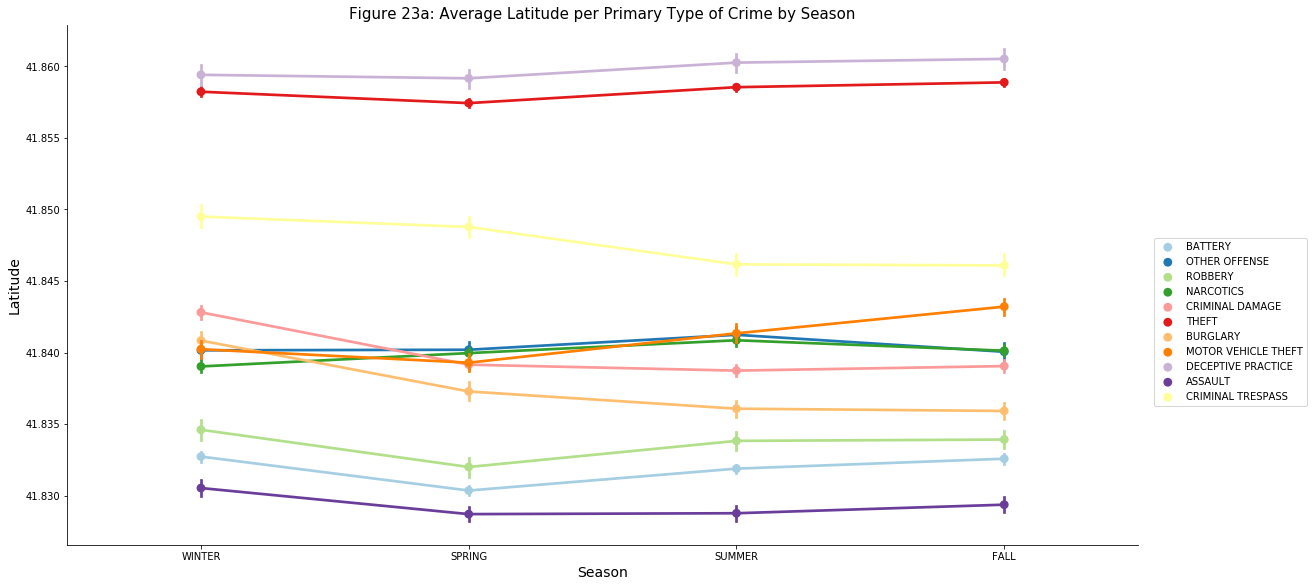

In [61]:
with sns.color_palette("Paired", 11):
    sns.catplot(x='Season', y='Latitude', hue='Primary Type', kind='point', data=crime_df, legend=False, height=8, aspect=2, order=['WINTER', 'SPRING', 'SUMMER', 'FALL'])
    plt.legend(bbox_to_anchor=(1.01, 0.6))
    plt.title('Figure 23a: Average Latitude per Primary Type of Crime by Season', size=15)
    plt.xlabel('Season', size=14)
    plt.ylabel('Latitude', size=14)

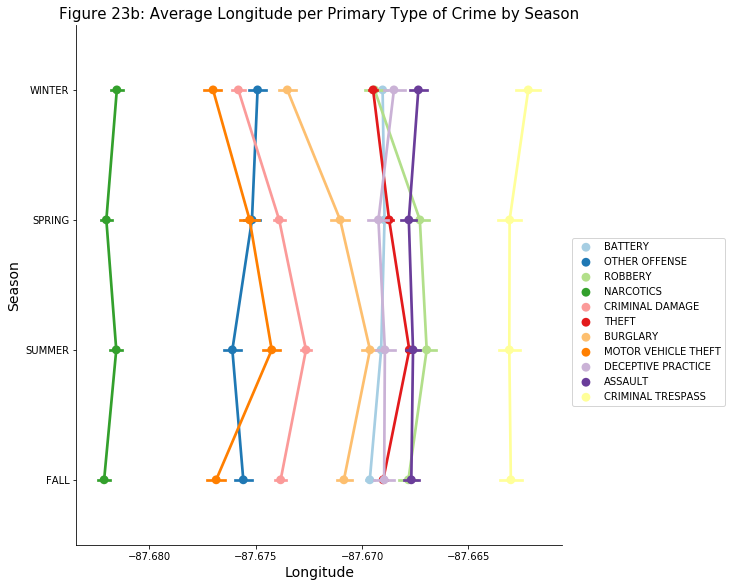

In [67]:
with sns.color_palette("Paired", 11):
    sns.catplot(y='Season', x='Longitude', hue='Primary Type', kind='point', data=crime_df, legend=False, height=8, aspect=1, order=['WINTER', 'SPRING', 'SUMMER', 'FALL'])
    plt.legend(bbox_to_anchor=(1.01, 0.6))
    plt.title('Figure 23b: Average Longitude per Primary Type of Crime by Season', size=15)
    plt.xlabel('Longitude', size=14)
    plt.ylabel('Season', size=14)

In Figure 24a, crimes involving deceptive practice, robbery, and battery shift north on Saturday/Sunday  while crimes involving burglary shift south on Sunday.  In Figure 24b, crimes involving criminal trespassing, assault, and battery shifts west Saturday/Sunday and crimes involving motor vehicle theft and criminal damage shift slightly west Friday/Saturday.

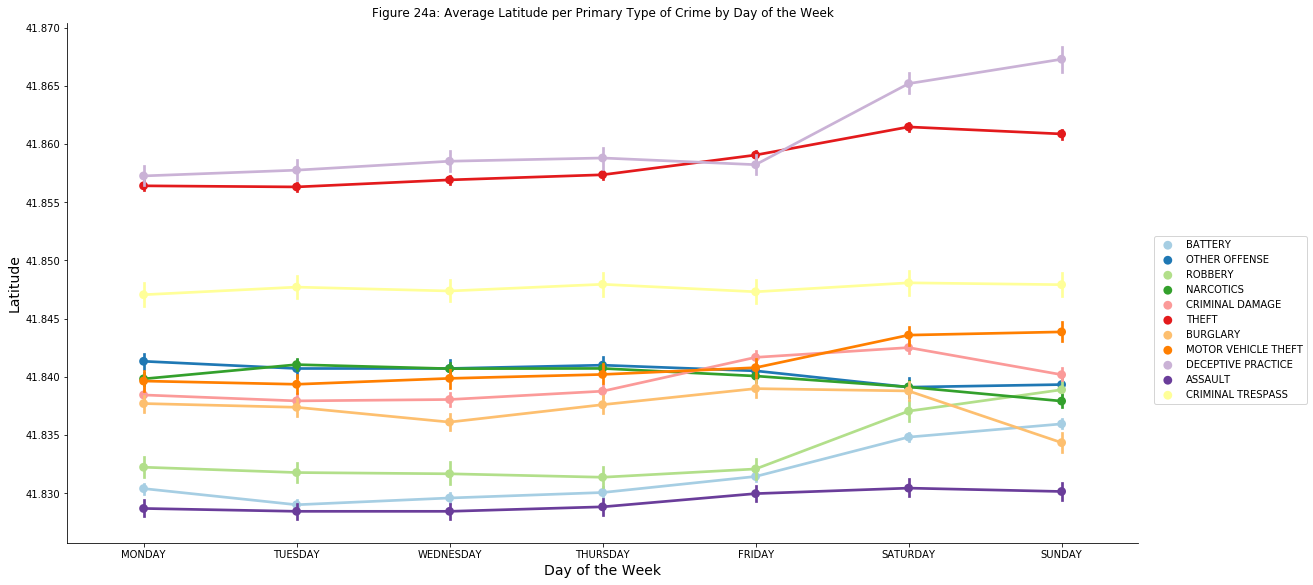

In [68]:
with sns.color_palette("Paired", 11):
    sns.catplot(x='Day of the Week', y='Latitude', hue='Primary Type', kind='point', data=crime_df, legend=False, height=8, aspect=2, order=['MONDAY', 'TUESDAY', 'WEDNESDAY', 'THURSDAY', 'FRIDAY', 'SATURDAY', 'SUNDAY'])
    plt.legend(bbox_to_anchor=(1.01, 0.6))
    plt.title('Figure 24a: Average Latitude per Primary Type of Crime by Day of the Week')
    plt.xlabel('Day of the Week', size=14)
    plt.ylabel('Latitude', size=14)

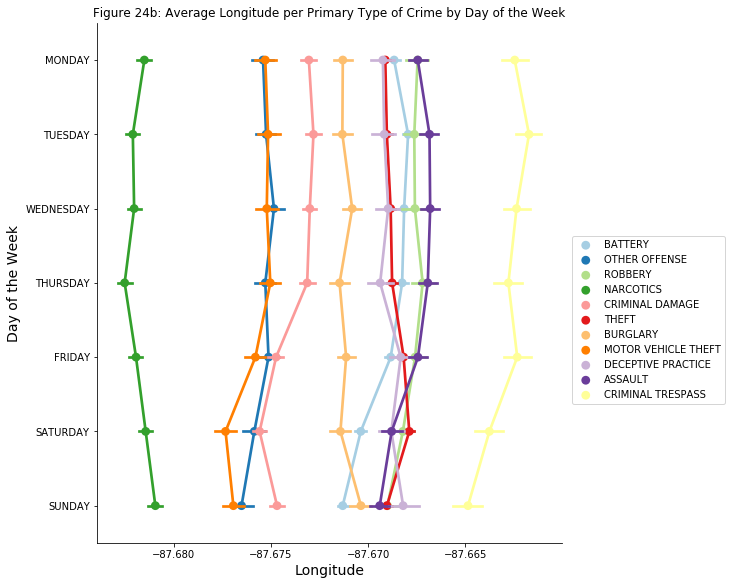

In [69]:
with sns.color_palette("Paired", 11):
    sns.catplot(y='Day of the Week', x='Longitude', hue='Primary Type', kind='point', data=crime_df, legend=False, height=8, aspect=1, order=['MONDAY', 'TUESDAY', 'WEDNESDAY', 'THURSDAY', 'FRIDAY', 'SATURDAY', 'SUNDAY'])
    plt.legend(bbox_to_anchor=(1.01, 0.6))
    plt.title('Figure 24b: Average Longitude per Primary Type of Crime by Day of the Week')
    plt.xlabel('Longitude', size=14)
    plt.ylabel('Day of the Week', size=14)

In Figure 25a, crimes involving deceptive practice, theft, and motor vehicle theft shift north from the morning into the evening.  Crimes involving other offenses and narcotics shift south into the evening before shifting north into the overnight hours.  Crimes involving robbery shift north from the afternoon into the overnight hours.  In Figure 25b, crimes involving criminal trespassing and narcotics shift east from the morning until the evening. Crimes involving motor vehicle theft, criminal damage, burglary, and theft shift west into the evening.  

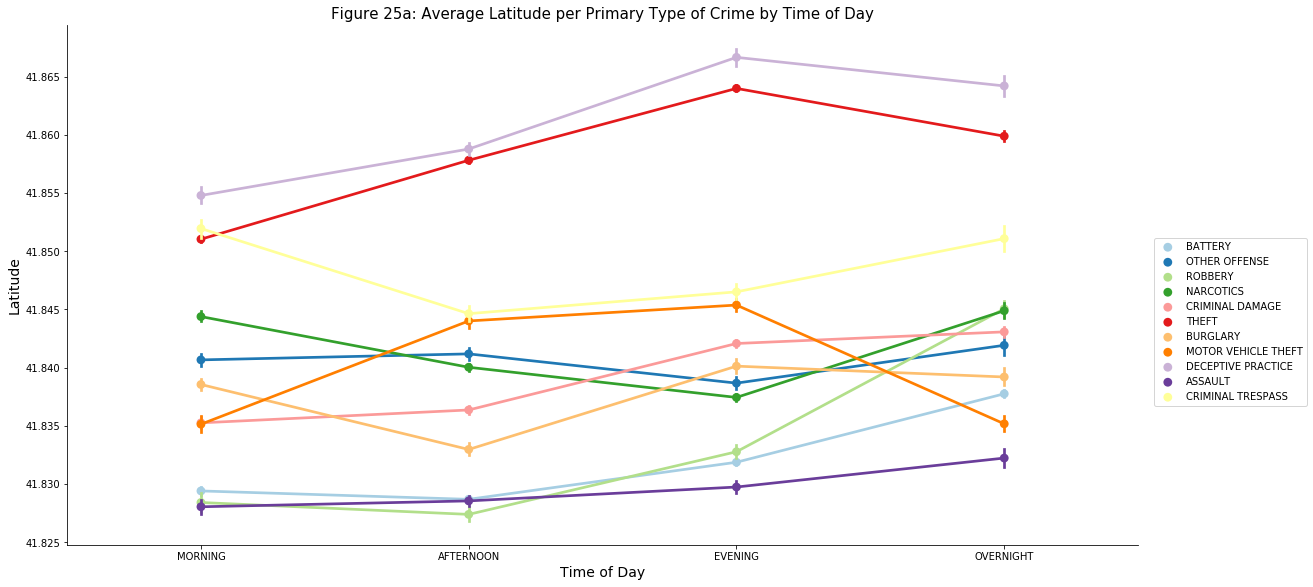

In [65]:
with sns.color_palette("Paired", 11):
    sns.catplot(x='Time of Day', y='Latitude', hue='Primary Type', kind='point', data=crime_df, legend=False, height=8, aspect=2, order=['MORNING', 'AFTERNOON', 'EVENING', 'OVERNIGHT'])
    plt.legend(bbox_to_anchor=(1.01, 0.6))
    plt.title('Figure 25a: Average Latitude per Primary Type of Crime by Time of Day', size=15)
    plt.xlabel('Time of Day', size=14)
    plt.ylabel('Latitude', size=14)

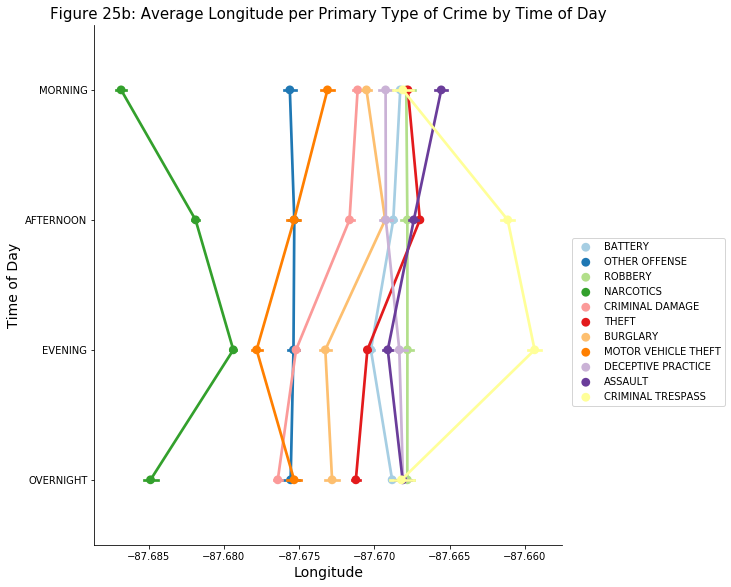

In [70]:
with sns.color_palette("Paired", 11):
    sns.catplot(y='Time of Day', x='Longitude', hue='Primary Type', kind='point', data=crime_df, legend=False, height=8, aspect=1, order=['MORNING', 'AFTERNOON', 'EVENING', 'OVERNIGHT'])
    plt.legend(bbox_to_anchor=(1.01, 0.6))
    plt.title('Figure 25b: Average Longitude per Primary Type of Crime by Time of Day', size=15)
    plt.xlabel('Longitude', size=14)
    plt.ylabel('Time of Day', size=14)

In Figure 26, it is seen that there are no highly correlated numerical features in my dataset.  There is a moderate, positive relationship between the distance from Chicago (city center) and the distance from the closest train stop because there are more train stops closer to the city center.  There is a moderate, positive relationship between the distance from the closest liquor store and the distance from the closest bus stop.  Figure 27 shows that for most of the reports, there isn't much of a relationship between the two features.  But for distances greater than 3km, there is a strong positive linear relationship.  Looking at reports when the distance from the closest bus stop is greater than 3km, I see that many of them occur in community 76, which is the community farthest to the northwest.  So reports in this community would likely be further removed from both bus stops and liquor stores.  

Text(0.5,1,'Figure 26: Correlation Coefficients between Numerical Features')

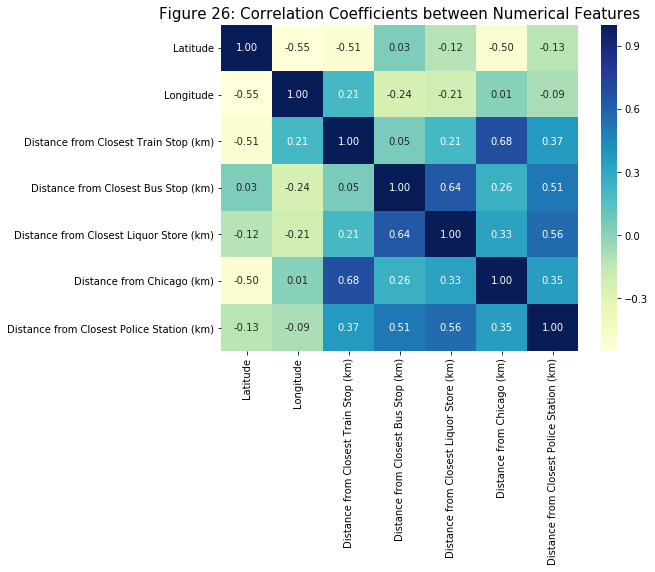

In [88]:
# Grabbing numerical columns and getting the correlation between them
crime_num = crime_df[['Latitude', 'Longitude', 'Distance from Closest Train Stop (km)', 'Distance from Closest Bus Stop (km)', 'Distance from Closest Liquor Store (km)', 'Distance from Chicago (km)', 'Distance from Closest Police Station (km)']]
corr_df = crime_num.corr()
plt.figure(figsize = (8, 6))
sns.heatmap(corr_df, annot=True, fmt='.2f', cmap="YlGnBu")
plt.title('Figure 26: Correlation Coefficients between Numerical Features', size=15)

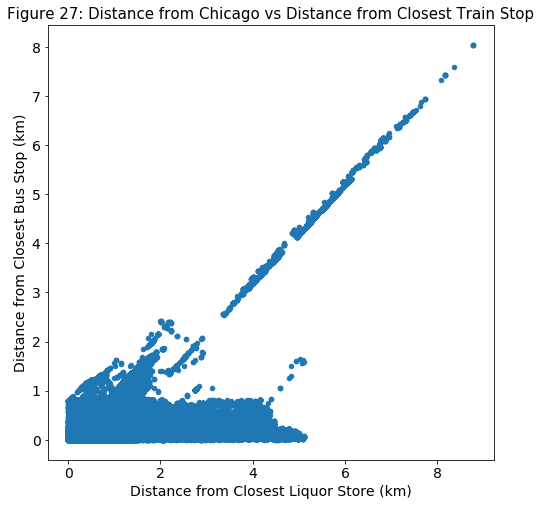

In [98]:
ax = crime_num.plot.scatter(x='Distance from Closest Liquor Store (km)', y='Distance from Closest Bus Stop (km)', figsize = (8,8))
plt.title('Figure 27: Distance from Chicago vs Distance from Closest Train Stop', size=15)
plt.xlabel('Distance from Closest Liquor Store (km)', size=14)
plt.ylabel('Distance from Closest Bus Stop (km)', size=14)
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)

In [97]:
# Checking out reports where distance is more than 3km
crime_df[crime_df['Distance from Closest Bus Stop (km)'] > 3][:20]

ID                 Date  Year                     Block  \
417   10001266  2015-03-19 16:23:00  2015             0000X W K9 ST   
733   10001713  2015-03-19 16:00:00  2015          100XX W OHARE ST   
793   10002026  2015-03-11 13:30:00  2015       0000X W TERMINAL ST   
885   10002419  2015-03-19 14:00:00  2015       0000X W TERMINAL ST   
890   10002427  2015-03-19 17:30:00  2015          100XX W OHARE ST   
1416  10003325  2015-03-15 04:40:00  2015       0000X W TERMINAL ST   
1419  10003329  2015-03-16 15:20:00  2015       0000X W TERMINAL ST   
1421  10003333  2015-03-16 17:00:00  2015  0000X W CHECKPOINT 7A ST   
1431  10003344  2015-03-19 09:00:00  2015          100XX W OHARE ST   
1490  10003434  2015-03-11 21:00:00  2015             0000X W K5 ST   
1500  10003450  2015-02-04 12:00:00  2015          005XX W OHARE ST   
1535  10003500  2015-03-16 22:25:00  2015  0000X W CHECKPOINT 7A ST   
1607  10003611  2015-03-21 00:27:00  2015          100XX W OHARE ST   
2029  10004210  2015-03-18 05:20:00  2015       0000X W TERMINAL ST   
2035  10004218  2015-03-18 07:20:00  2015       0000X W TERMINAL ST   
2037  10004220  2015-02-28 14:20:00  2015          005XX W OHARE ST   
2508  10005016  2015-03-20 16:00:00  2015       0000X W TERMINAL ST   
2618  10005396  2015-01-30 10:15:00  2015          100XX W OHARE ST   
2623  10005406  2015-03-08 19:45:00  2015          100XX W OHARE ST   
2661  10005506  2015-03-17 13:00:00  2015          100XX W OHARE ST   

            Primary Type                           Location Description  \
417              BATTERY       AIRPORT TERMINAL UPPER LEVEL-SECURE AREA   
733                THEFT                                         STREET   
793                THEFT                                       SIDEWALK   
885                THEFT       AIRPORT TERMINAL UPPER LEVEL-SECURE AREA   
890                THEFT       AIRPORT TERMINAL LOWER LEVEL-SECURE AREA   
1416             BATTERY                                       AIRCRAFT   
1419             BATTERY       AIRPORT TERMINAL UPPER LEVEL-SECURE AREA   
1421       OTHER OFFENSE       AIRPORT TERMINAL UPPER LEVEL-SECURE AREA   
1431  DECEPTIVE PRACTICE     AIRPORT TERMINAL MEZZANINE-NON-SECURE AREA   
1490               THEFT                  AIRPORT VENDING ESTABLISHMENT   
1500  DECEPTIVE PRACTICE                  AIRPORT VENDING ESTABLISHMENT   
1535       OTHER OFFENSE       AIRPORT TERMINAL UPPER LEVEL-SECURE AREA   
1607               THEFT   AIRPORT TERMINAL LOWER LEVEL-NON-SECURE AREA   
2029       OTHER OFFENSE       AIRPORT TERMINAL UPPER LEVEL-SECURE AREA   
2035   CRIMINAL TRESPASS   AIRPORT TERMINAL UPPER LEVEL-NON-SECURE AREA   
2037  DECEPTIVE PRACTICE                  AIRPORT VENDING ESTABLISHMENT   
2508               THEFT  AIRPORT BUILDING NON-TERMINAL-NON-SECURE AREA   
2618           NARCOTICS                               AIRPORT/AIRCRAFT   
2623           NARCOTICS                               AIRPORT/AIRCRAFT   
2661           NARCOTICS                               AIRPORT/AIRCRAFT   

      Domestic  Beat  District  Ward  Community  X Coordinate  Y Coordinate  \
417      False  1653      16.0  41.0       76.0     1102552.0     1933768.0   
733      False  1651      16.0  41.0       76.0     1100658.0     1934241.0   
793      False  1652      16.0  41.0       76.0     1100726.0     1934289.0   
885      False  1651      16.0  41.0       76.0     1100317.0     1935229.0   
890      False  1651      16.0  41.0       76.0     1100658.0     1934241.0   
1416     False  1651      16.0  41.0       76.0     1100317.0     1935229.0   
1419     False  1653      16.0  41.0       76.0     1101811.0     1934419.0   
1421     False  1653      16.0  41.0       76.0     1101667.0     1934359.0   
1431     False  1651      16.0  41.0       76.0     1100658.0     1934241.0   
1490     False  1653      16.0  41.0       76.0     1102219.0     1933889.0   
1500     False  1654      16.0  41.0       76.0     1106815.0     1936103.0